In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

### Import Tables

a) Import table "sales.xlsx"

In [267]:
sales = pd.read_excel('sales.xlsx')
#sales.set_index('CustomerID', inplace = True)
sales

CustomerID       Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
0          11054  2021-03-18 00:00:00     85.0        7230.0        1820   
1          17117  2021-03-01 00:00:00     96.0        5850.0         320   
2          31751  2021-11-01 00:00:00      7.0        8380.0           0   
3          12947  2022-05-19 00:00:00     54.0        5090.0         280   
4          11402  2021-01-01 00:00:00     64.0         330.0           0   
...          ...                  ...      ...           ...         ...   
7003       23699  2021-11-27 00:00:00     54.0         290.0          20   
7004       23255  2021-03-25 00:00:00     27.0         230.0          80   
7005        5798  2022-04-12 00:00:00     36.0        3050.0        2460   
7006       16577  2020-09-01 00:00:00     49.0          20.0         200   
7007       25310  2020-12-05 00:00:00     74.0         160.0         100   

      MntVegan&Vegetarian  MntDrinks  MntDesserts  MntAdditionalRequests  \
0                  3435.0     1600.0        440.0                   57.0   
1                  2745.0      500.0        320.0                    8.0   
2                  1560.0        0.0          0.0                   28.0   
3                  2355.0      140.0        560.0                   78.0   
4                   240.0        0.0          0.0                    7.0   
...                   ...        ...          ...                    ...   
7003                180.0        0.0         40.0                    4.0   
7004                525.0       20.0         80.0                   23.0   
7005               3840.0     1800.0        980.0                  107.0   
7006                 90.0      160.0          0.0                   14.0   
7007                180.0      680.0         80.0                   13.0   

      NumOfferPurchases  NumAppPurchases  NumTakeAwayPurchases  \
0                     1               13                     4   
1                     3                9                     7   
2                     3                9                     5   
3                     3                7                     5   
4                     2                4                     1   
...                 ...              ...                   ...   
7003                  2                4                     1   
7004                  3                5                     1   
7005                  1                8                     4   
7006                  1                3                     2   
7007                  3                3                     2   

      NumStorePurchases  NumAppVisitsMonth  Complain  
0                    13                  6         0  
1                     9                  6         0  
2                     3                  9         0  
3                    11                  3         0  
4                     3                  8         0  
...                 ...                ...       ...  
7003                  4                  7         0  
7004                  3                  8         0  
7005                 13                  4         0  
7006                  2                  8         1  
7007                  4                  4         0  

[7008 rows x 15 columns]

b) Import table "crm.xlsx"

In [268]:
crm = pd.read_csv('crm.csv')
crm.set_index('CustomerID', inplace = True)
crm

Name  Birthyear   Education Marital_Status  \
CustomerID                                                               
14594            Miss Leah Lewis       1981  Graduation         Single   
19070           Miss Grace Black       1974  Graduation       Together   
29888         Mr. Gavin Morrison       1960         PhD       Together   
12221            Mr. Ryan Glover       1980  Graduation        Married   
21107          Mr. Paul Anderson       1971  HighSchool         Single   
...                          ...        ...         ...            ...   
30686            Mr. John Hughes       1994         PhD       Divorced   
17210        Mr. Brandon Simpson       1985  Graduation       Divorced   
29186       Mr. Thomas Churchill       1967         PhD       Together   
23312         Miss Angela Murray       1989  Graduation         Single   
15581          Miss Diana Taylor       1960  Graduation         Single   

              Income  Kid_Younger6  Children_6to18  
CustomerID                                          
14594       113947.0             0               0  
19070       114297.0             0               0  
29888       115476.0             0               0  
12221       101172.0             1               1  
21107       123128.0             0               0  
...              ...           ...             ...  
30686        98968.0             0               0  
17210       109977.0             0               0  
29186        56039.0             0               1  
23312        44867.0             1               0  
15581       124379.0             0               0  

[7000 rows x 7 columns]

c) Import table "mkt.xlsx"

In [269]:
mkt = pd.read_csv('mkt.csv')
mkt[mkt.duplicated(subset= 'CustomerID', keep=False)]
mkt

CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  Response_Cmp4  \
0          31958              0              0              0              0   
1           5387              0              0              0              0   
2          32006              0              0              0              0   
3           7511              0              0              0              0   
4          12308              0              0              0              0   
...          ...            ...            ...            ...            ...   
7018       22358              0              0              0              0   
7019       29516              0              0              0              0   
7020       18890              0              0              0              0   
7021       30206              0              0              0              0   
7022       16466              0              0              0              0   

      Response_Cmp5  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
7018              0  
7019              0  
7020              0  
7021              0  
7022              0  

[7023 rows x 6 columns]

# 1. Basic Data Exploration

## 1.1. Table - "Sales"

d) Basic dataframe exploration

In [270]:
#sales.shape

In [271]:
#sales.columns

In [272]:
#sales.head(5)

In [273]:
#sales.tail(5)

In [274]:
#sales.info()

Variables Types:

- 6 float variables
- 8 integer variables
- 1 object variable

e) Dataframe Summary

In [275]:
#sales.describe()

- `count` we can see that the variable 'Recency' and 'MntDrinks' don't have the 7008 rows filled, this means we have a problem with NA's.
- Close relationship between Drinks, desserts and entries (Verysimilar location statistics)

f) Skewness

In [276]:
#sales.skew()

- `Moderate skewness` : NumAppPurchases  and NumStorePurchases
- `High skewness` : MntMeat&Fish, MntEntries, MntVegan&Vegetarian,MntDrinks,MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth and   Complain

g) Kurtosis - (SIGNIFICADO!!!)

In [277]:
#sales.kurt()

`high Kurtosis (>3): `
 - MntEntries                
 - MntVegan&Vegetarian      
 - MntDrinks                 
 - MntDesserts               
 - MntAdditionalRequests    
 - NumOfferPurchases 
 - NumTakeAwayPurchases
 - NumAppVisitsMonth         
 - Complain  

### 1.1.1. Visual Exploration 

h) Histograms

Text(0.5, 1.0, 'NumAppVisitsMonth')

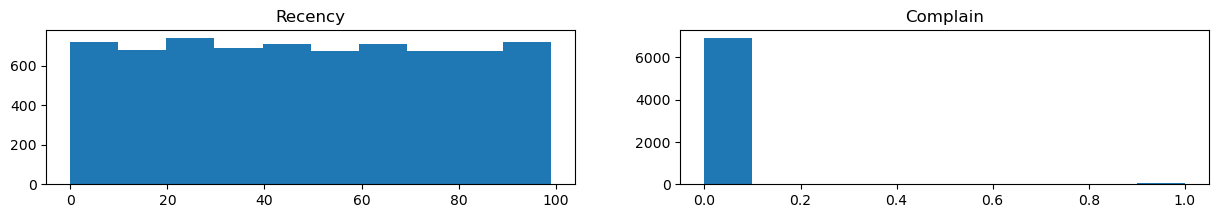

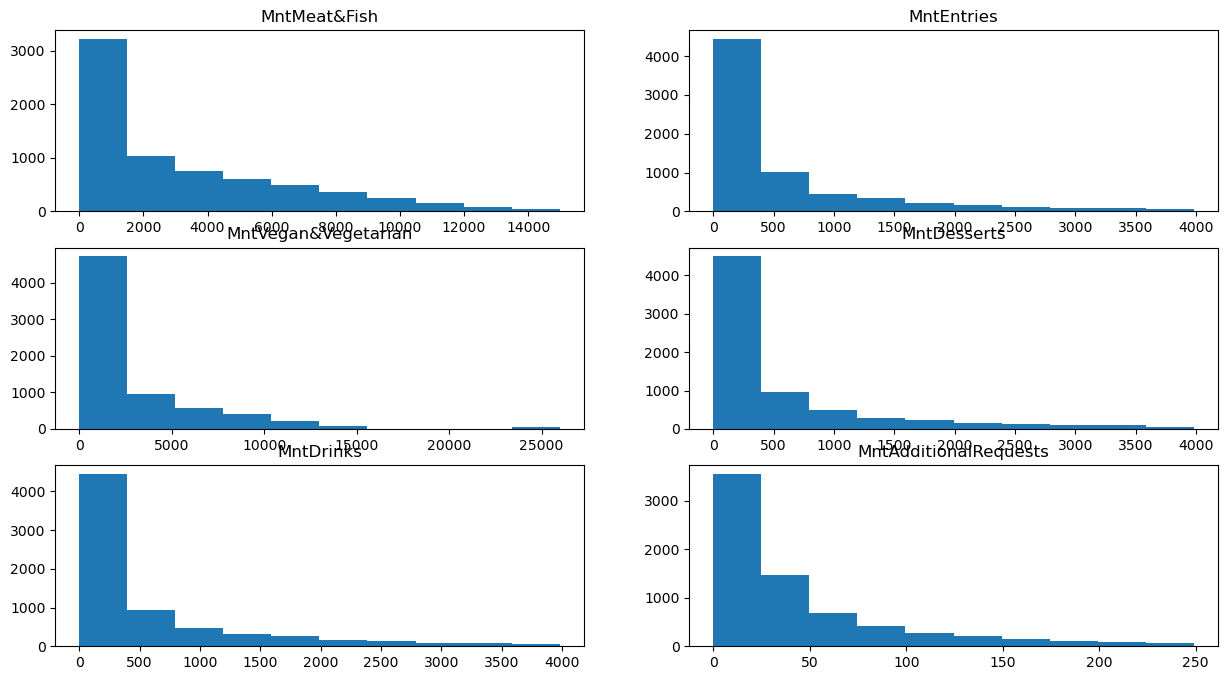

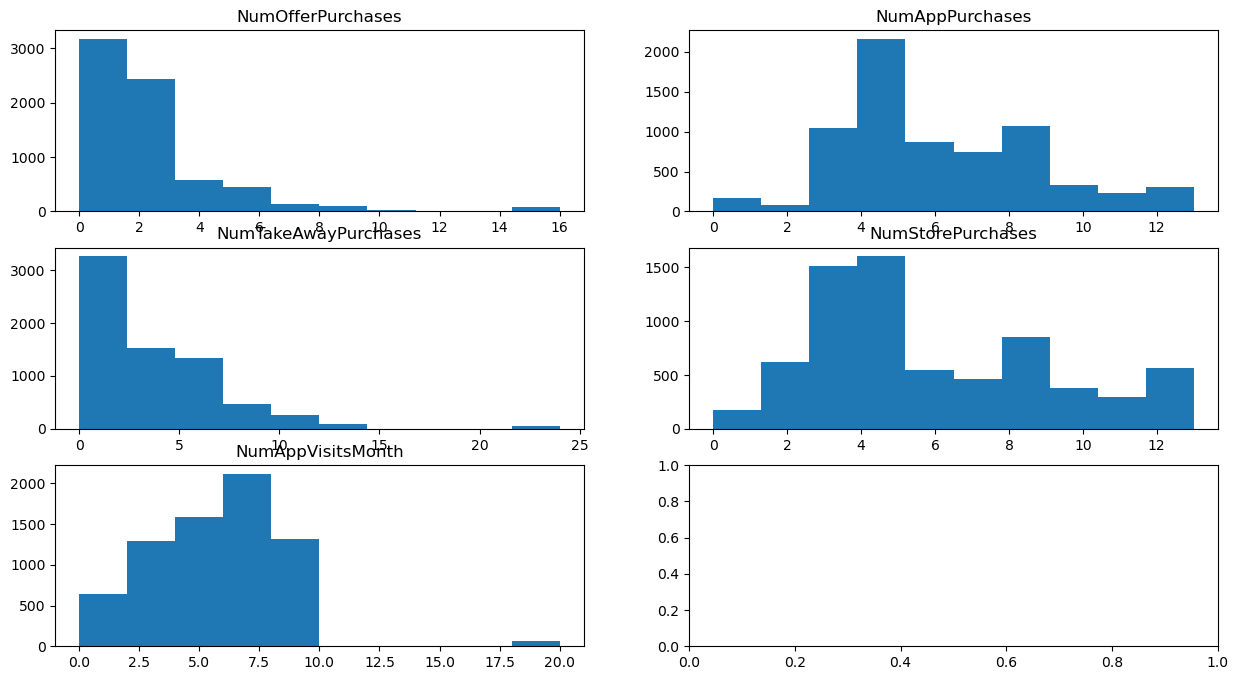

In [278]:
fig, [ax6,ax7] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax6.hist(sales['Recency'])
ax7.hist(sales['Complain'])

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(sales['MntMeat&Fish'])
ax1.hist(sales['MntEntries'])
ax2.hist(sales['MntVegan&Vegetarian'])
ax3.hist(sales['MntDesserts'])
ax4.hist(sales['MntDrinks'])
ax5.hist(sales['MntAdditionalRequests'])

fig, [[ax8,ax9],[ax10,ax11],[ax12,ax13]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8))
ax8.hist(sales['NumOfferPurchases'])            
ax9.hist(sales['NumAppPurchases'])          
ax10.hist(sales['NumTakeAwayPurchases'])   
ax11.hist(sales['NumStorePurchases'])        
ax12.hist(sales['NumAppVisitsMonth'])   

#TITULOS E LABELS
ax6.set_title ('Recency')
ax7.set_title ('Complain')
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')
ax8.set_title('NumOfferPurchases')            
ax9.set_title('NumAppPurchases')          
ax10.set_title('NumTakeAwayPurchases')   
ax11.set_title('NumStorePurchases')        
ax12.set_title('NumAppVisitsMonth')

i) Correlograma

<AxesSubplot:>

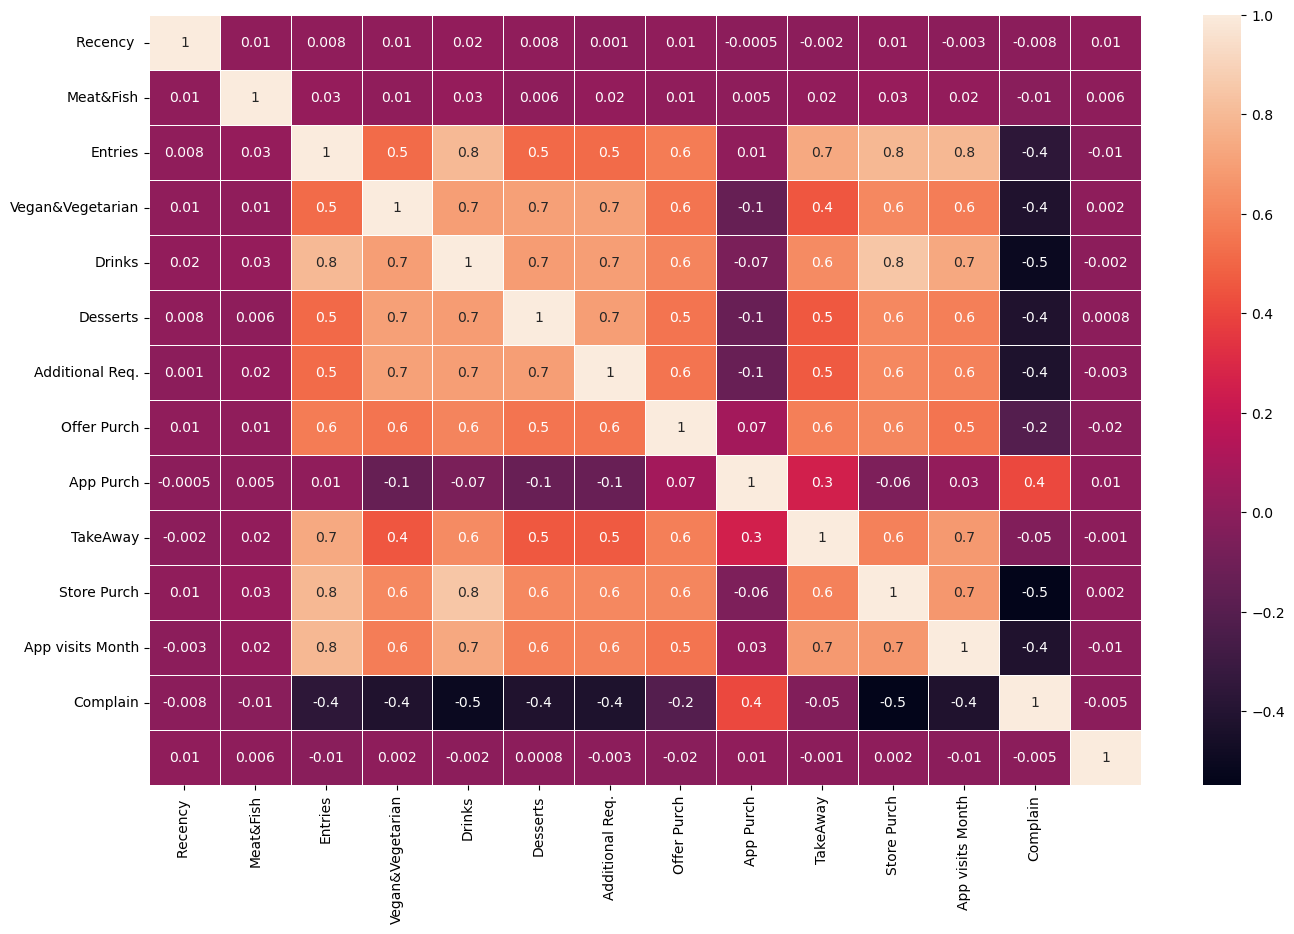

In [279]:
sales_corr = sales.corr(method = 'spearman')
figure = plt.figure(figsize=(16,10))


x_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for x-axis
y_axis_labels = ['Recency ', 'Meat&Fish', 'Entries', 'Vegan&Vegetarian', 'Drinks', 'Desserts', 'Additional Req.',
                'Offer Purch','App Purch',  'TakeAway', 'Store Purch', 'App visits Month', 'Complain'] # labels for y-axis

sns.heatmap(sales_corr, annot=True, fmt = '.1g', 
            xticklabels=x_axis_labels,yticklabels=y_axis_labels,
           linewidth=0.5)

 - Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated.
 - Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated
 - Correlation coefficients whose magnitude are between 0.5 and 0.7 indicate variables which can be considered moderately correlated.
 - Correlation coefficients whose magnitude are between 0.3 and 0.5 indicate variables which have a low correlation.

 - `Recency`: has a low correlation with all of the variables
 - `Offer Purchases`: has a low correlation with all of the variables
 - `Complain`:has a low correlation with all of the variables
 - the rest of the variables atre all moderately correlated between each other.

<h1>1.2 Table- 'Crm' : Initial Data Exploration<h1>

In [376]:
crm.head()

Name   Education Marital_Status    Income  \
CustomerID                                                            
14594          Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
19070         Miss Grace Black  GRADUATION        MARRIED  114297.0   
29888       Mr. Gavin Morrison         PHD        MARRIED  115476.0   
12221          Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
21107        Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   

            Kid_Younger6  Children_6to18  Gender  Age age_group  
CustomerID                                                       
14594                  0               0       1   42     35-45  
19070                  0               0       1   49     45-65  
29888                  0               0       0   63     45-65  
12221                  1               1       0   43     35-45  
21107                  0               0       0   52     45-65

In [377]:
crm.tail()

Name   Education Marital_Status    Income  \
CustomerID                                                              
30686            Mr. John Hughes         PHD       DIVORCED   98968.0   
17210        Mr. Brandon Simpson  GRADUATION       DIVORCED  109977.0   
29186       Mr. Thomas Churchill         PHD        MARRIED   56039.0   
23312         Miss Angela Murray  GRADUATION         SINGLE   44867.0   
15581          Miss Diana Taylor  GRADUATION         SINGLE  124379.0   

            Kid_Younger6  Children_6to18  Gender  Age age_group  
CustomerID                                                       
30686                  0               0       0   29     25-35  
17210                  0               0       0   38     35-45  
29186                  0               1       0   56     45-65  
23312                  1               0       1   34     25-35  
15581                  0               0       1   63     45-65

In [383]:
def get_stats(df):
    # Calculate mean, standard deviation, and median for each column
    means = df.mean()
    stds = df.std()
    medians = df.median()

    # Calculate mode for each column
    modes = df.mode().iloc[0]

    # Calculate min and max for each column
    mins = df.min()
    maxs = df.max()

    # Combine all statistics into a single DataFrame
    stats_df = pd.concat([means, stds, medians, modes, mins, maxs], axis=1)
    stats_df.columns = ['mean', 'std', 'median', 'mode', 'min', 'max']

    return stats_df

get_stats(crm)


C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_9884\3556064237.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()
C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_9884\3556064237.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stds = df.std()
C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_9884\3556064237.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df.median()


mean           std   median                 mode  \
Income          77988.962407  35409.810253  77190.0              11000.0   
Kid_Younger6        0.440571      0.543477      0.0                  0.0   
Children_6to18      0.490571      0.542174      0.0                  0.0   
Gender              0.266714      0.442273      0.0                  0.0   
Age                46.548571     11.996270     46.0                 38.0   
Name                     NaN           NaN      NaN  Mr. Alexander Lyman   
Education                NaN           NaN      NaN           GRADUATION   
Marital_Status           NaN           NaN      NaN              MARRIED   
age_group                NaN           NaN      NaN                45-65   

                               min             max  
Income                      2493.8      237639.725  
Kid_Younger6                     0               2  
Children_6to18                   0               2  
Gender                           0               1  
Age                             18              75  
Name            Miss Abigail Alsop  Mrs. Zoe Smith  
Education                    BASIC             PHD  
Marital_Status            DIVORCED           WIDOW  
age_group                    15-25             65+

In [384]:
crm.describe()

Income  Kid_Younger6  Children_6to18       Gender          Age
count    7000.000000   7000.000000     7000.000000  7000.000000  7000.000000
mean    77988.962407      0.440571        0.490571     0.266714    46.548571
std     35409.810253      0.543477        0.542174     0.442273    11.996270
min      2493.800000      0.000000        0.000000     0.000000    18.000000
25%     51586.250000      0.000000        0.000000     0.000000    38.000000
50%     77190.000000      0.000000        0.000000     0.000000    46.000000
75%    102016.250000      1.000000        1.000000     1.000000    56.000000
max    237639.725000      2.000000        2.000000     1.000000    75.000000

In [386]:
crm.shape

(7000, 9)

In [387]:
crm.isna().sum()

Name              0
Education         0
Marital_Status    0
Income            0
Kid_Younger6      0
Children_6to18    0
Gender            0
Age               0
age_group         0
dtype: int64

In [389]:
#multiple approaches:
#drop values
#ignore
#investigate

#let's investigate

check_missing=crm.isnull()
check_missing

Name  Education  Marital_Status  Income  Kid_Younger6  \
CustomerID                                                           
14594       False      False           False   False         False   
19070       False      False           False   False         False   
29888       False      False           False   False         False   
12221       False      False           False   False         False   
21107       False      False           False   False         False   
...           ...        ...             ...     ...           ...   
30686       False      False           False   False         False   
17210       False      False           False   False         False   
29186       False      False           False   False         False   
23312       False      False           False   False         False   
15581       False      False           False   False         False   

            Children_6to18  Gender    Age  age_group  
CustomerID                                            
14594                False   False  False      False  
19070                False   False  False      False  
29888                False   False  False      False  
12221                False   False  False      False  
21107                False   False  False      False  
...                    ...     ...    ...        ...  
30686                False   False  False      False  
17210                False   False  False      False  
29186                False   False  False      False  
23312                False   False  False      False  
15581                False   False  False      False  

[7000 rows x 9 columns]

In [392]:
def get_missing_values_in_column(df, column):
    """
    Returns a list of the row indices that contain missing values in a certain column of a pandas DataFrame.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame to check for missing values.
    column : str
        The name of the column to check for missing values.

    Returns:
    --------
    list
        A list of the row indices that contain missing values in the specified column.
    """

    # Identify missing values in the specified column
    missing = df[column].isnull()

    # Get rows with missing values in the specified column
    missing_rows = df[missing].index.tolist()

    return missing_rows


missing_values_rows=get_missing_values_in_column(crm, 'Education')

In [394]:
missing_values_rows

[]

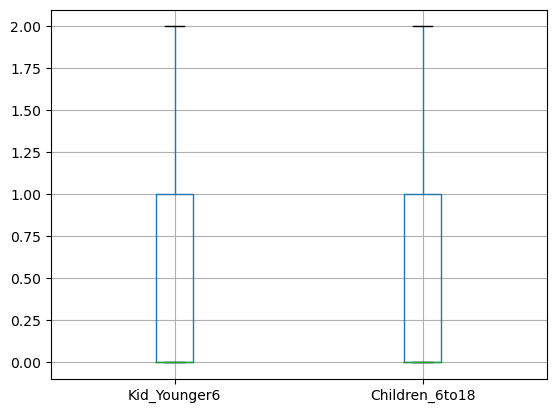

In [396]:
#OUTLIERS (PRELIMINARY)- CHECKING FOR INCONSISTENT VALUES

import matplotlib.pyplot as plt


kids=crm.boxplot(column=['Kid_Younger6', 'Children_6to18'])
kids.plot()
plt.show()
#everything seems normal 

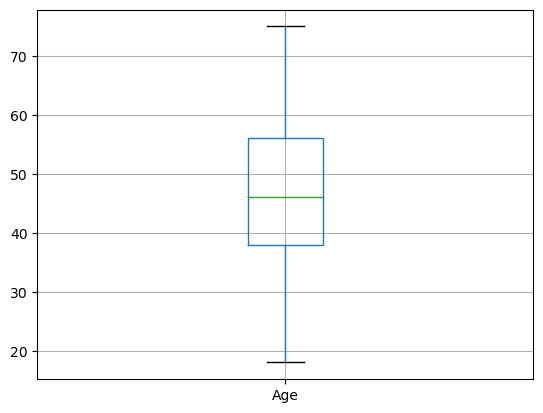

In [434]:
birthyear=crm.boxplot(column='Age')
birthyear.plot()
plt.show()
plt.show()
#everything seems normal 

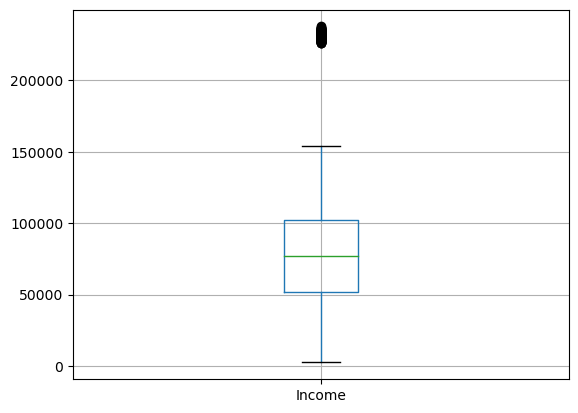

In [399]:
income=crm.boxplot(column='Income')
income.plot()
plt.show()
plt.show()
#investigate higher values

In [401]:
crm['Income'].nlargest(100)

CustomerID
19586    237639.725
15638    237322.825
26432    236745.625
31208    236316.125
33947    236287.625
            ...    
10574    147813.000
10271    146428.000
6983     145675.000
23627    144949.000
10184    144873.000
Name: Income, Length: 100, dtype: float64

In [403]:
[crm['Income'].mean(),crm['Income'].std()]

[77988.96240714283, 35409.81025319228]

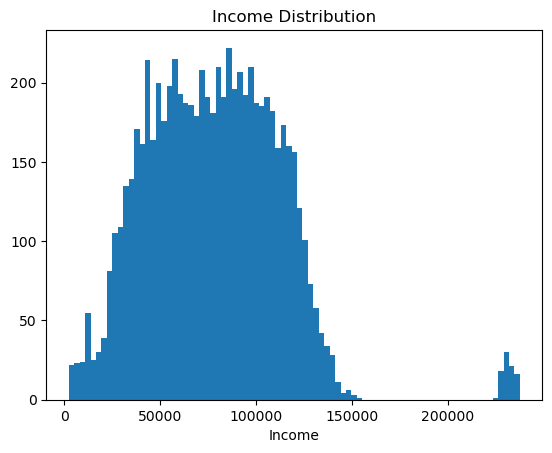

In [405]:
plt.hist(crm['Income'], bins=83)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('')
plt.show()

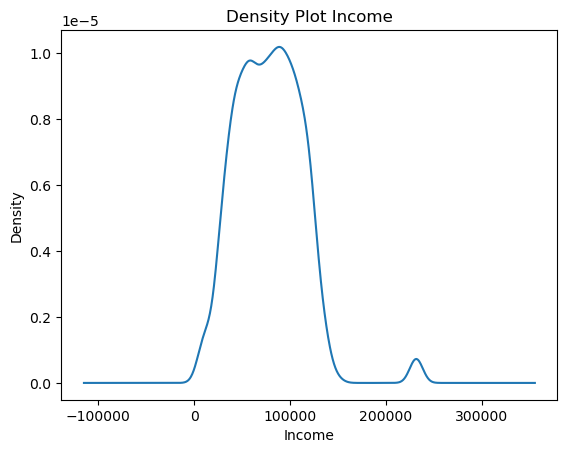

In [406]:
crm['Income'].plot.kde()

plt.title('Density Plot Income')
plt.xlabel('Income')
plt.ylabel('Density')

plt.show()

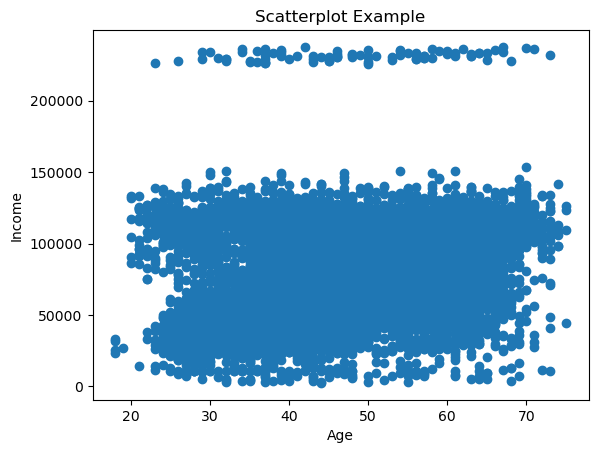

In [436]:
#What to do with income outliers? TBD

#RELATIONSHIPS

#BIRTHYEAR AND INCOME

plt.scatter(crm['Age'], crm['Income'])

plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatterplot Example')

plt.show()

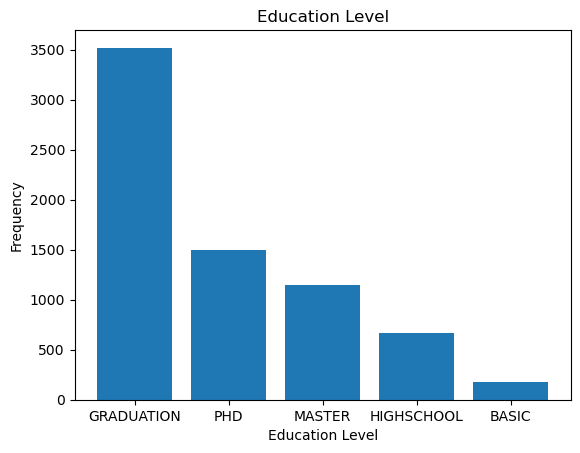

In [409]:
import pandas as pd
import matplotlib.pyplot as plt

freq_dist = crm['Education'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.title('Education Level')

plt.show()


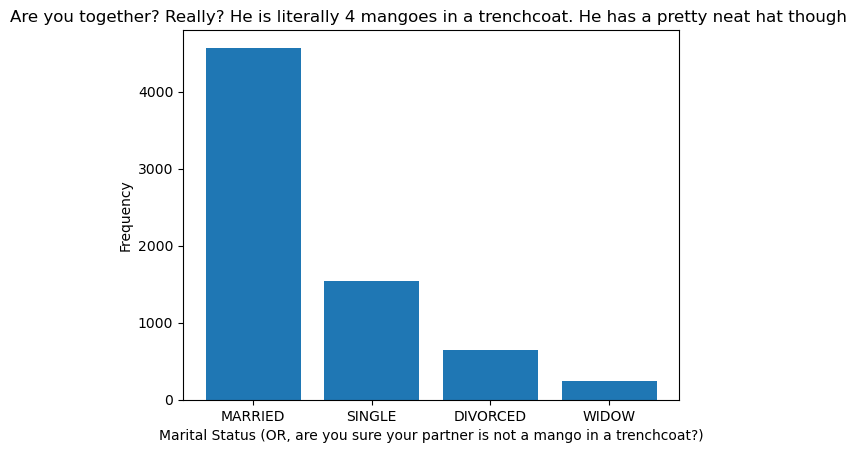

In [410]:
freq_dist = crm['Marital_Status'].value_counts()

plt.bar(freq_dist.index, freq_dist.values)

plt.xlabel('Marital Status (OR, are you sure your partner is not a mango in a trenchcoat?)')
plt.ylabel('Frequency')
plt.title('Are you together? Really? He is literally 4 mangoes in a trenchcoat. He has a pretty neat hat though ')
plt.show()

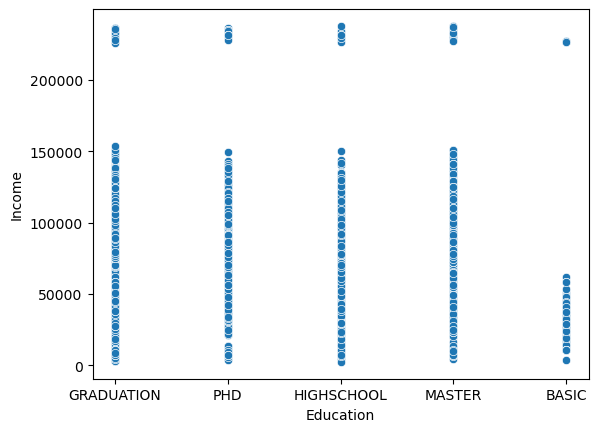

In [411]:
import seaborn as sns

# Create a scatterplot with categorical variable on x-axis and quantitative variable on y-axis
sns.scatterplot(x=crm['Education'], y=crm['Income'], data=crm)

# Show the plot
plt.show()

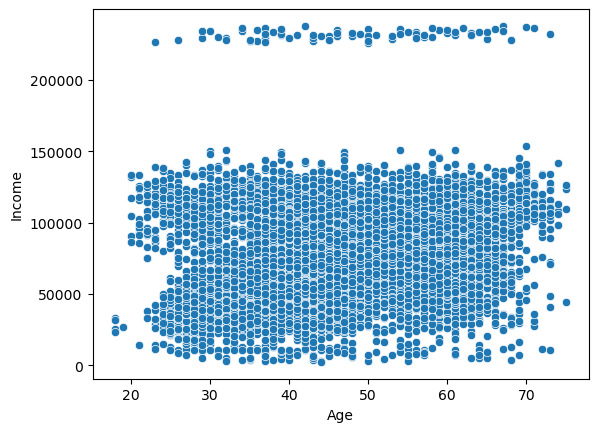

In [413]:
import seaborn as sns

# Create a scatterplot with categorical variable on x-axis and quantitative variable on y-axis
sns.scatterplot(x=crm['Age'], y=crm['Income'], data=crm)

# Show the plot
plt.show()

In [417]:
def check(column):
    #checks if there are any values on a numeric column that are non numeric, and tells you which values
    result=[]
    for i in crm[column].unique():
        if not pd.api.types.is_numeric_dtype(i):
            result.append(i)
    return result
check('Income')

[]

In [421]:
crm

Name   Education Marital_Status    Income  \
CustomerID                                                              
14594            Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
19070           Miss Grace Black  GRADUATION        MARRIED  114297.0   
29888         Mr. Gavin Morrison         PHD        MARRIED  115476.0   
12221            Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
21107          Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
...                          ...         ...            ...       ...   
30686            Mr. John Hughes         PHD       DIVORCED   98968.0   
17210        Mr. Brandon Simpson  GRADUATION       DIVORCED  109977.0   
29186       Mr. Thomas Churchill         PHD        MARRIED   56039.0   
23312         Miss Angela Murray  GRADUATION         SINGLE   44867.0   
15581          Miss Diana Taylor  GRADUATION         SINGLE  124379.0   

            Kid_Younger6  Children_6to18  Gender  Age age_group  
CustomerID                                                       
14594                  0               0       1   42     35-45  
19070                  0               0       1   49     45-65  
29888                  0               0       0   63     45-65  
12221                  1               1       0   43     35-45  
21107                  0               0       0   52     45-65  
...                  ...             ...     ...  ...       ...  
30686                  0               0       0   29     25-35  
17210                  0               0       0   38     35-45  
29186                  0               1       0   56     45-65  
23312                  1               0       1   34     25-35  
15581                  0               0       1   63     45-65  

[7000 rows x 9 columns]

In [422]:
pd.crosstab(crm['Education'], crm['Gender'])

Gender         0    1
Education            
BASIC        125   54
GRADUATION  2570  948
HIGHSCHOOL   484  181
MASTER       856  286
PHD         1098  398

In [419]:
pd.crosstab(crm['Education'], crm['Marital_Status'])

Marital_Status  DIVORCED  MARRIED  SINGLE  WIDOW
Education                                       
BASIC                 12      113      51      3
GRADUATION           311     2283     815    109
HIGHSCHOOL            57      425     170     13
MASTER               114      768     212     48
PHD                  151      983     290     72

In [423]:
pd.crosstab(crm['Education'], crm['age_group'])

age_group   15-25  25-35  35-45  45-65  65+
Education                                  
BASIC          25     77     50     26    1
GRADUATION     92    619   1137   1534  136
HIGHSCHOOL     43    168    203    236   15
MASTER         13    143    339    543  104
PHD             8    176    395    754  163

In [424]:
pd.crosstab(crm['Kid_Younger6'], crm['Education'])

Education     BASIC  GRADUATION  HIGHSCHOOL  MASTER  PHD
Kid_Younger6                                            
0                50        2069         348     671  949
1               121        1367         299     436  519
2                 8          82          18      35   28

In [426]:
pd.crosstab(crm['Children_6to18'], crm['Education'])

Education       BASIC  GRADUATION  HIGHSCHOOL  MASTER  PHD
Children_6to18                                            
0                 167        1849         395     586  723
1                  12        1591         260     527  736
2                   0          78          10      29   37

In [427]:
pd.crosstab(crm['Gender'], crm['age_group'])

age_group  15-25  25-35  35-45  45-65  65+
Gender                                    
0            108    834   1608   2274  309
1             73    349    516    819  110

In [429]:
income_ktsis=crm['Income'].kurtosis()
income_ktsis

2.649035217952049

<h2>Aggregates<h2>

In [430]:
crm.groupby('Marital_Status').agg({'Income': ['mean', 'std','max','min']})

Income                                  
                        mean           std         max     min
Marital_Status                                                
DIVORCED        81221.038992  37463.428582  235129.425  2493.8
MARRIED         77772.016147  35148.730621  237639.725  3005.4
SINGLE          75706.768238  34940.770042  233887.325  3550.0
WIDOW           87855.099286  35611.402827  236745.625  7174.7

In [431]:
crm.groupby(['Kid_Younger6']).agg({'Income': ['mean', 'std','max','min']})

Income                                  
                      mean           std         max     min
Kid_Younger6                                                
0             92348.276872  31863.532884  237639.725  3005.4
1             57699.110941  29662.500323  235245.525  2493.8
2             60142.497515  33394.790824  228750.025  4609.6

In [432]:
crm.groupby(['Children_6to18']).agg({'Income': ['mean', 'std','max','min']})

Income                                  
                        mean           std         max     min
Children_6to18                                                
0               77269.154859  40511.089285  237639.725  2493.8
1               78927.742498  28670.515331  235245.525  3909.6
2               76320.504708  25365.538093  232427.925  4901.4

In [433]:
crm['Kid_Younger6'].value_counts()[0]

4087

# 2. Data Cleaning & Pre-Processing & Initial Data Transformation

## 2.1. Table - "Sales"

j) Check for duplicates (and drop)

In [280]:
#sales [sales.duplicated()]
sales.drop_duplicates(inplace= True)

k) Check for NAs & Fill NAs

In [281]:
#sales.isna().sum()

## Input "Recency" with the mean
sales.fillna({'Recency': sales['Recency'].mean()}, inplace = True)
#Turn "Recency" into integer
sales['Recency']= np.round(sales['Recency']).astype(int)

## Inpute "MntDrinks" using KNNInputer
#we are using this variables to inpute values because they have a correlation > 0.7
sales_products = sales[['MntDrinks','MntDesserts','MntEntries','MntVegan&Vegetarian']]

imputer = KNNImputer(n_neighbors=1)
array_impute = imputer.fit_transform(sales_products) # this is an array
sales_products = pd.DataFrame(array_impute, columns = sales_products.columns)

sales['MntDrinks'] = sales_products['MntDrinks'].values

l) check if there is negative values in the variables 

In [282]:
(sales [['Recency','Complain','MntMeat&Fish','MntEntries','MntVegan&Vegetarian',
      'MntDesserts','MntDrinks', 'MntAdditionalRequests','NumOfferPurchases','NumAppPurchases','NumTakeAwayPurchases',
      'NumStorePurchases', 'NumAppVisitsMonth']] < 0).sum()

Recency                  0
Complain                 0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDesserts              0
MntDrinks                0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
dtype: int64

m) check if `Recency = 99.0` is code for something

In [283]:
(sales [['Recency']] == 99).sum()

Recency    59
dtype: int64

In [284]:
sales_R99 =sales[sales["Recency"] == 99 ]
sales_R99

#Recency=99 doesn't seem a code 

CustomerID       Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
111        30641  2022-06-27 00:00:00       99        4530.0         760   
350         5156  2021-02-17 00:00:00       99         450.0           0   
388        20438  2021-11-11 00:00:00       99        8300.0         240   
408        14783  2022-05-26 00:00:00       99        7070.0        1140   
534        12848  2022-06-14 00:00:00       99          10.0         180   
691        28967  2022-01-03 00:00:00       99         260.0           0   
757        34463  2021-07-10 00:00:00       99        1638.0        1920   
765        10796  2022-02-12 00:00:00       99         550.0           0   
984        17906  2022-03-31 00:00:00       99       13850.0         780   
1174       32612  2021-03-10 00:00:00       99        4710.0        1880   
1508       26216  2022-05-27 00:00:00       99         480.0          60   
1588       32387  2022-02-03 00:00:00       99        8340.0        1080   
1672       31913  2022-05-31 00:00:00       99        7300.0           0   
1780       19301  2021-09-16 00:00:00       99         100.0           0   
1905       22619  2021-02-26 00:00:00       99          20.0         100   
1908       24035  2021-10-22 00:00:00       99         690.0         160   
2224       11324  2021-06-18 00:00:00       99        8720.0         436   
2252       12713  2021-10-02 00:00:00       99        4210.0         100   
2344        8372  2021-07-18 00:00:00       99          50.0         340   
2353       22532  2021-11-28 00:00:00       99         110.0         220   
2478        8798  2021-12-04 00:00:00       99        4700.0         180   
2522       10043  2022-05-30 00:00:00       99          60.0         260   
2783       20954  2020-12-04 00:00:00       99        1850.0          40   
2951        5249  2021-08-27 00:00:00       99         140.0         160   
3073       19010  2020-09-02 00:00:00       99        1685.0         480   
3109       13853  2022-03-08 00:00:00       99        1790.0         760   
3250       15353  2021-03-08 00:00:00       99        3720.0         360   
3351       27968  2020-09-05 00:00:00       99        4300.0           0   
3426       19910  2020-12-08 00:00:00       99         260.0          20   
3570       32288  2021-03-03 00:00:00       99        5850.0        1420   
3831       29969  2022-03-17 00:00:00       99           0.0         120   
3959       34214  2021-04-23 00:00:00       99         210.0          20   
4315       20105  2021-01-12 00:00:00       99        7350.0         448   
4360       22853  2022-04-03 00:00:00       99         840.0           0   
4373       30842  2021-03-03 00:00:00       99       11660.0        1220   
4389       14969  2020-11-28 00:00:00       99        3270.0         560   
4454        6593  2022-03-16 00:00:00       99        3800.0         160   
4648       12101  2022-06-16 00:00:00       99        4510.0         100   
4740       13748  2021-03-27 00:00:00       99        1152.0           0   
4903       34700  2020-09-11 00:00:00       99        7500.0        3500   
4906        5594  2022-06-24 00:00:00       99          30.0          80   
4920       30299  2020-11-29 00:00:00       99        4900.0           0   
5059       20360  2020-12-18 00:00:00       99        6450.0         140   
5209        8624  2022-03-04 00:00:00       99       10540.0         340   
5241        7277  2020-10-11 00:00:00       99        4200.0        1060   
5485       26963  2021-05-21 00:00:00       99        1170.0         420   
5745       34115  2020-11-03 00:00:00       99          20.0         540   
5858       17981  2020-11-30 00:00:00       99        2670.0         760   
5916        7832  2021-06-27 00:00:00       99        5010.0         360   
5930       22148  2020-11-02 00:00:00       99        1523.0        1180   
6061       13388  2021-01-23 00:00:00       99           5.0          20   
6195       26660  2021-01-04 00:00:00       99        

## 2.2. Demographic Table - "CRM"

### 2.2.1. Clean Data 

f) Check for duplicates (and drop)

In [285]:
#crm[crm.duplicated()]

g) Check for NAs & Fill NAs

In [286]:
#crm.isnull().sum()

## Substitute missing values with the mode
crm['Education'] = crm['Education'].fillna(crm['Education'].mode()[0])

h) Consistency accross the variables/categories

In [287]:
## Putting everything in upper case to remove similar categories (e.g. single, Single, married, Married, SINGLE, MARRIED)
crm['Education'] = crm['Education'].str.upper()
crm['Marital_Status']=crm['Marital_Status'].str.upper()

## Change together to married
crm['Marital_Status'] = crm['Marital_Status'].replace('TOGETHER','MARRIED')
#crm['Marital_Status'].value_counts()

### 2.2.2. Add useful variables (data transformation)

i) Add column with gender - dummy variable - easier to read

In [288]:
## to check for all unique prefixes, we extract the first 4 letters of each name

crm['First 4 Letters'] = crm['Name'].str.slice(stop=4)

# get the unique combinations of the first 5 letters of each name
unique_combinations = crm['First 4 Letters'].unique()

# print the unique combinations
print(unique_combinations)

crm['Name'].isnull().any()

#Now, we do the encoding. If the first 4 characters contain any variation of mrs or miss, we substitute the name by 1
#if it's any variation of 'mr.' we substitute by 0 i.e. 1 corresponds to female and 0 corresponds to male

# create a copy of the 'Name' column
crm['Gender'] = crm['Name']

# replace 'Miss' or 'Mrs.' with 1 and 'Mr.' with 0 in the 'Gender' column
crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0

# convert the 'Gender' column to integer type
crm['Gender'] = crm['Gender'].astype(float).fillna(0).astype(int)

#check new column
crm['Gender']

crm = crm.drop(columns=['First 4 Letters'])

['Miss' 'Mr. ' 'Mrs.']


C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_9884\3258945362.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^((M|m)iss|(M|m)rs\.)', na=False), 'Gender'] = 1
C:\Users\J Loureiro\AppData\Local\Temp\ipykernel_9884\3258945362.py:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  crm.loc[crm['Gender'].str.contains(r'^(Mr\.|(M|m)r)', na=False), 'Gender'] = 0


j) Transform "Birthyear" into "Age"

In [289]:
## Convert the "Birthyear" to an 'Age' column
import datetime

#calculate the current year
current_year = datetime.datetime.now().year

#create a new column 'Age' by subtracting birth_year from current year
crm['Age'] = current_year - crm['Birthyear']

# drop
crm = crm.drop('Birthyear', axis=1)
crm

Name   Education Marital_Status    Income  \
CustomerID                                                              
14594            Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
19070           Miss Grace Black  GRADUATION        MARRIED  114297.0   
29888         Mr. Gavin Morrison         PHD        MARRIED  115476.0   
12221            Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
21107          Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
...                          ...         ...            ...       ...   
30686            Mr. John Hughes         PHD       DIVORCED   98968.0   
17210        Mr. Brandon Simpson  GRADUATION       DIVORCED  109977.0   
29186       Mr. Thomas Churchill         PHD        MARRIED   56039.0   
23312         Miss Angela Murray  GRADUATION         SINGLE   44867.0   
15581          Miss Diana Taylor  GRADUATION         SINGLE  124379.0   

            Kid_Younger6  Children_6to18  Gender  Age  
CustomerID                                             
14594                  0               0       1   42  
19070                  0               0       1   49  
29888                  0               0       0   63  
12221                  1               1       0   43  
21107                  0               0       0   52  
...                  ...             ...     ...  ...  
30686                  0               0       0   29  
17210                  0               0       0   38  
29186                  0               1       0   56  
23312                  1               0       1   34  
15581                  0               0       1   63  

[7000 rows x 8 columns]

In [290]:
# defining Age groups
bins = [0, 15, 25, 35, 45, 65,100] # define age groups
labels = ['<15', '15-25','25-35', '35-45', '45-65', '65+'] # define the labels for each age group, as INE does 
crm['age_group'] = pd.cut(crm['Age'], bins=bins, labels=labels) # add a new column with the age groups
crm

Name   Education Marital_Status    Income  \
CustomerID                                                              
14594            Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
19070           Miss Grace Black  GRADUATION        MARRIED  114297.0   
29888         Mr. Gavin Morrison         PHD        MARRIED  115476.0   
12221            Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
21107          Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
...                          ...         ...            ...       ...   
30686            Mr. John Hughes         PHD       DIVORCED   98968.0   
17210        Mr. Brandon Simpson  GRADUATION       DIVORCED  109977.0   
29186       Mr. Thomas Churchill         PHD        MARRIED   56039.0   
23312         Miss Angela Murray  GRADUATION         SINGLE   44867.0   
15581          Miss Diana Taylor  GRADUATION         SINGLE  124379.0   

            Kid_Younger6  Children_6to18  Gender  Age age_group  
CustomerID                                                       
14594                  0               0       1   42     35-45  
19070                  0               0       1   49     45-65  
29888                  0               0       0   63     45-65  
12221                  1               1       0   43     35-45  
21107                  0               0       0   52     45-65  
...                  ...             ...     ...  ...       ...  
30686                  0               0       0   29     25-35  
17210                  0               0       0   38     35-45  
29186                  0               1       0   56     45-65  
23312                  1               0       1   34     25-35  
15581                  0               0       1   63     45-65  

[7000 rows x 9 columns]

## 2.3. Marketing Table - "mkt.xlsx"

### 2.3.1. Data Cleaning

k) Check for duplicates (and drop)

In [291]:
#mkt[mkt.duplicated()]

l) Check for NAs & Fill NAs

In [292]:
#mkt.isna().sum()

## 2.4. Merge all tables

In [293]:
df = pd.merge(sales, crm, on='CustomerID')

In [294]:
df= pd.merge(df, mkt, on='CustomerID')

In [295]:
df.set_index('CustomerID', inplace = True)

In [296]:
df[df.duplicated()]

Date_Adherence  Recency  MntMeat&Fish  MntEntries  \
CustomerID                                                           
6470        2021-06-17 00:00:00       75        5760.0        2220   
25685       2020-11-19 00:00:00       15        5020.0           0   
28739       2021-07-21 00:00:00       78        2140.0        1700   
30464       2021-05-02 00:00:00        9        2120.0         980   
24260       2021-05-18 00:00:00       64        3330.0           0   
25052       2021-07-23 00:00:00       12         700.0          60   
5540        2021-03-08 00:00:00       51        1540.0         400   
19295       2022-05-13 00:00:00       15        9370.0        1060   
12320       2021-04-06 00:00:00       64         120.0           0   
32777       2021-12-30 00:00:00       26        7350.0        2780   
26285       2021-03-21 00:00:00       54          50.0         180   
10265       2021-10-08 00:00:00        7         170.0          60   
21269       2022-03-28 00:00:00       18        1780.0         220   
12035       2021-09-30 00:00:00       73        6300.0        3200   
8447        2022-04-24 00:00:00       33        2450.0         320   
32924       2020-10-03 00:00:00       61          70.0          20   
8276        2020-10-13 00:00:00       42        5940.0        1002   
14942       2021-05-02 00:00:00       71        9790.0         880   
7586        2021-04-25 00:00:00       39        3780.0         200   
29357       2022-04-19 00:00:00       92        1240.0          60   
32495       2022-03-21 00:00:00       30         479.0          10   
32966       2022-02-17 00:00:00       56        2610.0         840   
21767       2020-10-27 00:00:00       94         280.0          40   

            MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                
6470                    13950.0     2960.0       1860.0   
25685                     645.0        0.0          0.0   
28739                    2085.0     1160.0        740.0   
30464                    2700.0     1200.0        980.0   
24260                   12225.0     1980.0        832.0   
25052                    1275.0      240.0        180.0   
5540                      990.0        0.0        240.0   
19295                    3000.0      800.0       2140.0   
12320                     195.0       20.0          0.0   
32777                    4170.0      500.0       1760.0   
26285                     285.0      240.0        280.0   
10265                     105.0      280.0         20.0   
21269                    2370.0      540.0        380.0   
12035                    3945.0      220.0       1600.0   
8447                     3345.0      320.0        860.0   
32924                     165.0       40.0          0.0   
8276                     9465.0     1100.0       1100.0   
14942                   14025.0      440.0        488.0   
7586                     2205.0      100.0        100.0   
29357                     315.0       20.0         20.0   
32495                     123.0       10.0         34.0   
32966                    2160.0      840.0        960.0   
21767                     135.0       20.0         20.0   

            MntAdditionalRequests  NumOfferPurchases  NumAppPurchases  ...  \
CustomerID                                                             ...   
6470                         74.0                  1                5  ...   
25685                        27.0                  9               10  ...   
28739                        16.0                  4                7  ...   
30464                        32.0                  2                5  ...   
24260                        29.0                  1                6  ...   
25052                        95.0                  3                6  ...   
5540                         27.0                  7                8  ...   
19295                       200.0                  0                6  ...   
12320     

In [297]:
df.drop_duplicates(inplace= True)

## 2.5. Outliers

It's an important topic:
- 1st se Kustosis....
- 2st see if exists through histograms
- If less than 3% cut

- merge tables!!!! Name : df

Prespective 1 

Text(0.5, 1.0, 'MntAdditionalRequests')

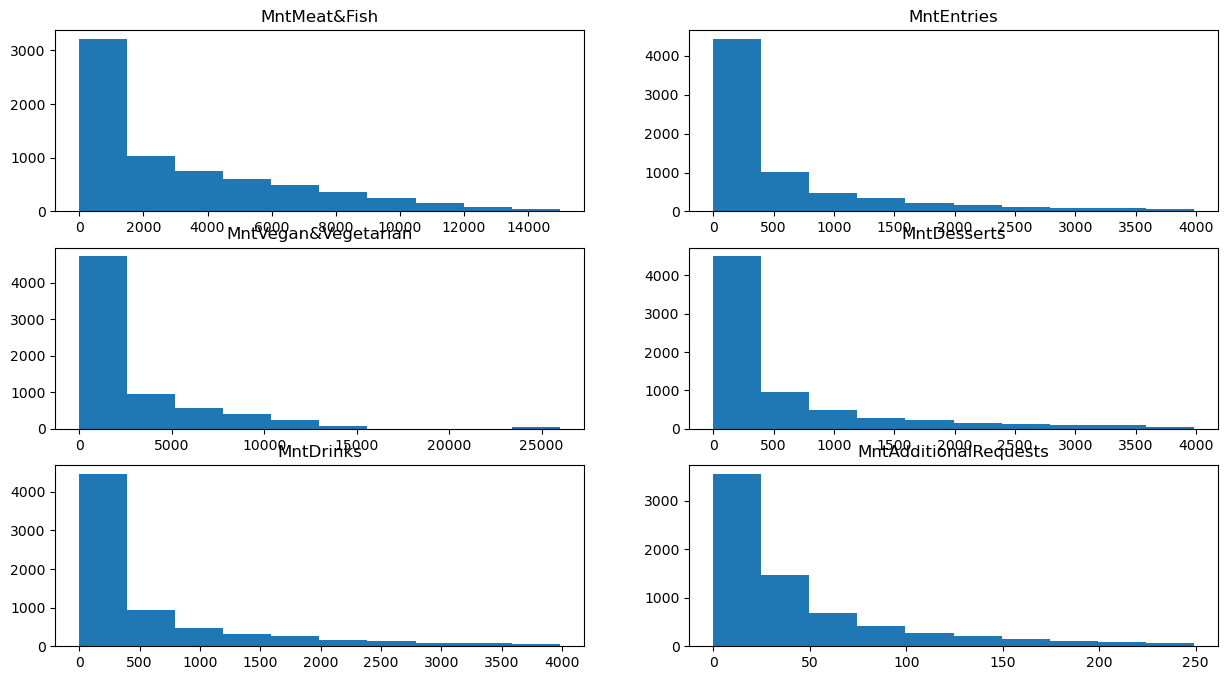

In [298]:

fig, [[ax0,ax1],[ax2,ax3],[ax4,ax5]] = plt.subplots(nrows=3, ncols = 2, figsize=(15,8)) 
ax0.hist(df['MntMeat&Fish'])
ax1.hist(df['MntEntries'])
ax2.hist(df['MntVegan&Vegetarian'])
ax3.hist(df['MntDesserts'])
ax4.hist(df['MntDrinks'])
ax5.hist(df['MntAdditionalRequests'])

#Titles
ax0.set_title('MntMeat&Fish')
ax1.set_title('MntEntries')
ax2.set_title('MntVegan&Vegetarian')
ax3.set_title('MntDesserts')
ax4.set_title('MntDrinks')
ax5.set_title('MntAdditionalRequests')

Prespective 2 

Text(0.5, 1.0, 'NumStorePurchases')

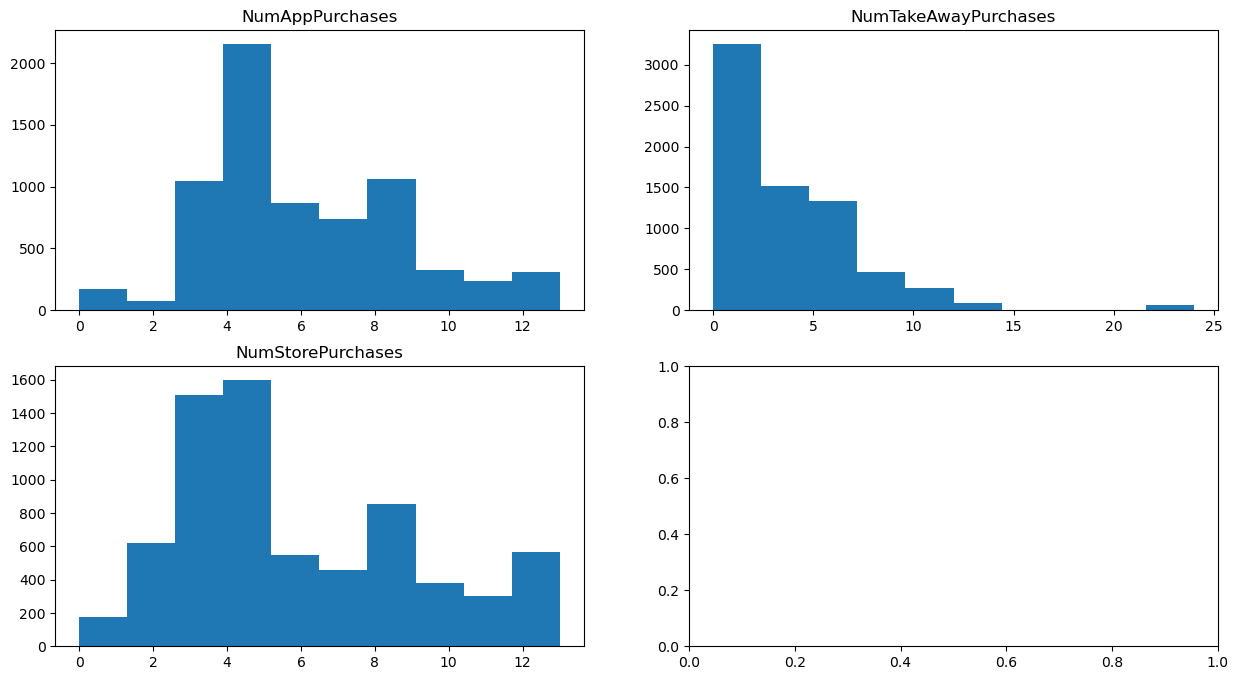

In [299]:
fig, [[ax1,ax2],[ax3,ax4]] = plt.subplots(nrows=2, ncols = 2, figsize=(15,8))           
ax1.hist(df['NumAppPurchases'])          
ax2.hist(df['NumTakeAwayPurchases'])   
ax3.hist(df['NumStorePurchases'])        
   
#Set the labels            
ax1.set_title('NumAppPurchases')          
ax2.set_title('NumTakeAwayPurchases')   
ax3.set_title('NumStorePurchases')        

Prespective 3

(array([ 331., 1275., 1615., 1657., 1467.,  552.,   17.,    0.,    0.,
          86.]),
 array([  2493.8   ,  26008.3925,  49522.985 ,  73037.5775,  96552.17  ,
        120066.7625, 143581.355 , 167095.9475, 190610.54  , 214125.1325,
        237639.725 ]),
 <BarContainer object of 10 artists>)

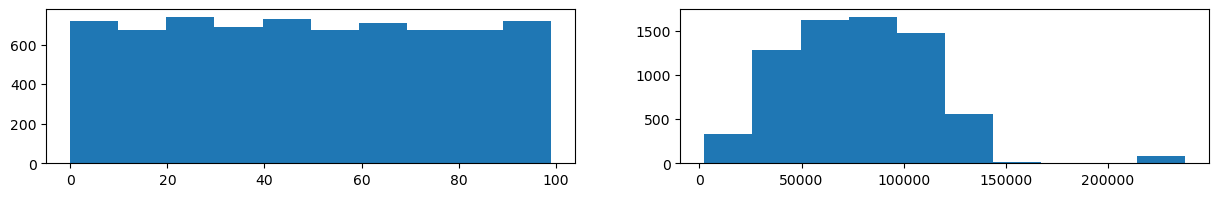

In [300]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols = 2, figsize=(15,2)) 
ax1.hist(df['Recency'])
ax2.hist(df['Income'])

#In this prespective we sumed the amount spent and number of purchases by client.
#the other variables were already treat, we removed the outliers for the other prespectives.

       
#ax1.hist(df['NumAppPurchases'])          
#ax2.hist(df['NumTakeAwayPurchases'])   
#ax3.hist(df['NumStorePurchases']) 
#ax0.hist(df['MntMeat&Fish'])
#ax1.hist(df['MntEntries'])
#ax2.hist(df['MntVegan&Vegetarian'])
#ax3.hist(df['MntDesserts'])
#ax4.hist(df['MntDrinks'])
#ax5.hist(df['MntAdditionalRequests'])

after doing the histograms we are going to take out the outliers from the variables we are using in the clustering analisys: 
- Income 
- NumTakeAwayPurchases

In [301]:
# percentage of outliers in Income 
(sum(df['Income'] > 200000)/7000)*100

1.2285714285714284

In [302]:
# percentage of outliers in umTakeAwayPurchases 
(sum(df['NumTakeAwayPurchases'] > 20)/7000)*100

0.8714285714285714

- since the percentage of outliers in these variables is <3%, we are going to drop these observartions 

In [303]:
df = df.drop(df[df['Income'] > 200000].index)

In [304]:
df = df.drop(df[df['NumTakeAwayPurchases'] > 20].index)

# 3. 1st Perspective - Consumption patterns/types

EXPLICAÇÃO DA PERSPECTIVA:
- Objetivos;
- Interesse;
- variáveis foco;

## 3.1.1 Dataframe Preparation

- 1- Isolar variáveis de interesse
- 2- Standardização (MinMax)
- 3- PCA???!!!

In [305]:
df_mnt_pre_normalize=(df[['MntMeat&Fish','MntEntries','MntDrinks','MntAdditionalRequests','MntDesserts','MntVegan&Vegetarian']]).copy()

In [306]:
df_mnt_pre_normalize.head(4)

MntMeat&Fish  MntEntries  MntDrinks  MntAdditionalRequests  \
CustomerID                                                               
11054             7230.0        1820     1600.0                   57.0   
17117             5850.0         320      500.0                    8.0   
31751             8380.0           0        0.0                   28.0   
12947             5090.0         280      140.0                   78.0   

            MntDesserts  MntVegan&Vegetarian  
CustomerID                                    
11054             440.0               3435.0  
17117             320.0               2745.0  
31751               0.0               1560.0  
12947             560.0               2355.0

In [307]:
# MINMAX NORMALIZATION
#import pandas as pd
#from sklearn.preprocessing import MinMaxScaler

# Initialize scaler object
#scaler = MinMaxScaler()

# Apply scaler to the data in the data frame
#df_mnt = pd.DataFrame(scaler.fit_transform(df_mnt_pre_normalize), columns=df_mnt_pre_normalize.columns)

# View the normalized data frame
#df_mnt.head()

In [308]:
# create a new DataFrame with the columns you want to standardize
cols_to_standardize = ['MntMeat&Fish','MntEntries','MntDrinks','MntAdditionalRequests','MntDesserts','MntVegan&Vegetarian']
data_to_standardize = df_mnt_pre_normalize[cols_to_standardize]

# standardize the data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# create a new DataFrame with standardized data and column names
standardized_df = pd.DataFrame(data=standardized_data, columns=cols_to_standardize, index=df_mnt_pre_normalize.index)

# merge back into the original DataFrame
df_mnt = pd.merge(df_mnt_pre_normalize.drop(cols_to_standardize, axis=1), standardized_df, left_index=True, right_index=True)
df_mnt

MntMeat&Fish  MntEntries  MntDrinks  MntAdditionalRequests  \
CustomerID                                                               
11054           0.482644    0.457286   0.402010               0.228916   
17117           0.390521    0.080402   0.125628               0.032129   
31751           0.559413    0.000000   0.000000               0.112450   
12947           0.339786    0.070352   0.035176               0.313253   
11402           0.022029    0.000000   0.000000               0.028112   
...                  ...         ...        ...                    ...   
23699           0.019359    0.005025   0.000000               0.016064   
23255           0.015354    0.020101   0.005025               0.092369   
5798            0.203605    0.618090   0.452261               0.429719   
16577           0.001335    0.050251   0.040201               0.056225   
25310           0.010681    0.025126   0.170854               0.052209   

            MntDesserts  MntVegan&Vegetarian  
CustomerID                                    
11054          0.110553             0.229229  
17117          0.080402             0.183183  
31751          0.000000             0.104104  
12947          0.140704             0.157157  
11402          0.000000             0.016016  
...                 ...                  ...  
23699          0.010050             0.012012  
23255          0.020101             0.035035  
5798           0.246231             0.256256  
16577          0.000000             0.006006  
25310          0.020101             0.012012  

[6890 rows x 6 columns]

<h2>3.1.2. Optimal number of Clusters</h2>

In [309]:
#optimal k for clustering

from sklearn.cluster import KMeans

ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\si

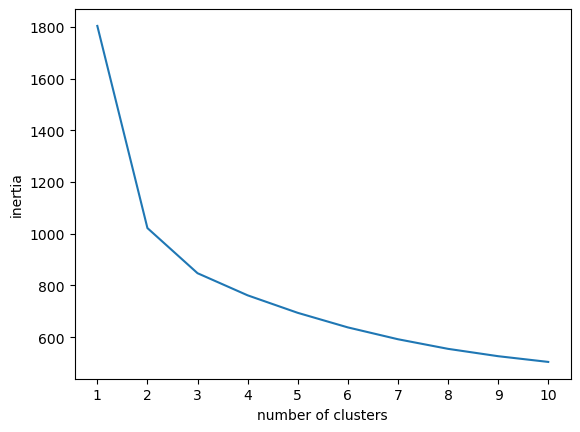

In [310]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

<h2>K-means K=2 <h2>

In [311]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)
df_mnt_k2['k2'] = model_k2.labels_
df_mnt_k2.groupby(['k2']).mean().transpose()

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k2                            0         1
MntMeat&Fish           0.104783  0.416062
MntEntries             0.043498  0.321868
MntDrinks              0.043897  0.330175
MntAdditionalRequests  0.102940  0.314160
MntDesserts            0.043426  0.326578
MntVegan&Vegetarian    0.053535  0.413532

In [312]:
df_mnt_k2.groupby(['k2']).describe().transpose()

k2                                     0            1
MntMeat&Fish          count  4593.000000  2297.000000
                      mean      0.104783     0.416062
                      std       0.143517     0.216280
                      min       0.000000     0.006676
                      25%       0.008678     0.253004
                      50%       0.034045     0.391188
                      75%       0.148198     0.565421
                      max       0.912550     1.000000
MntEntries            count  4593.000000  2297.000000
                      mean      0.043498     0.321868
                      std       0.066057     0.241459
                      min       0.000000     0.000000
                      25%       0.005025     0.130653
                      50%       0.020101     0.256281
                      75%       0.055276     0.467337
                      max       0.597990     1.000000
MntDrinks             count  4593.000000  2297.000000
                      mean      0.043897     0.330175
                      std       0.066762     0.246470
                      min       0.000000     0.000000
                      25%       0.005025     0.130653
                      50%       0.020101     0.266332
                      75%       0.050251     0.477387
                      max       0.592965     1.000000
MntAdditionalRequests count  4593.000000  2297.000000
                      mean      0.102940     0.314160
                      std       0.127307     0.240557
                      min       0.000000     0.000000
                      25%       0.024096     0.124498
                      50%       0.056225     0.236948
                      75%       0.132530     0.461847
                      max       0.987952     1.000000
MntDesserts           count  4593.000000  2297.000000
                      mean      0.043426     0.326578
                      std       0.065376     0.247112
                      min       0.000000     0.000000
                      25%       0.005025     0.125628
                      50%       0.020101     0.266332
                      75%       0.055276     0.487437
                      max       0.613065     1.000000
MntVegan&Vegetarian   count  4593.000000  2297.000000
                      mean      0.053535     0.413532
                      std       0.064050     0.228723
                      min       0.000000     0.035035
                      25%       0.011011     0.224224
                      50%       0.026026     0.376376
                      75%       0.075075     0.575576
                      max       0.514515     1.000000

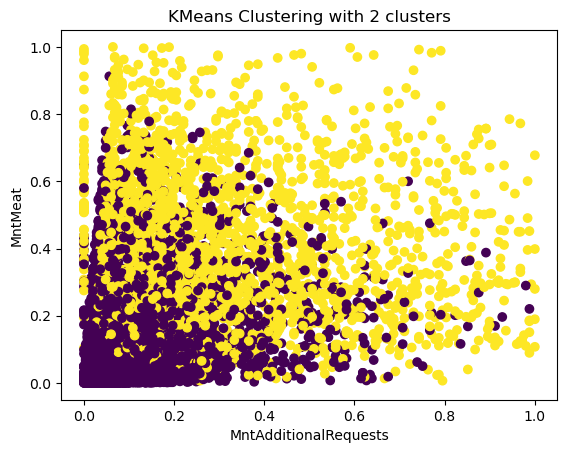

In [313]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntAdditionalRequests'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('MntAdditionalRequests')
plt.ylabel('MntMeat')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

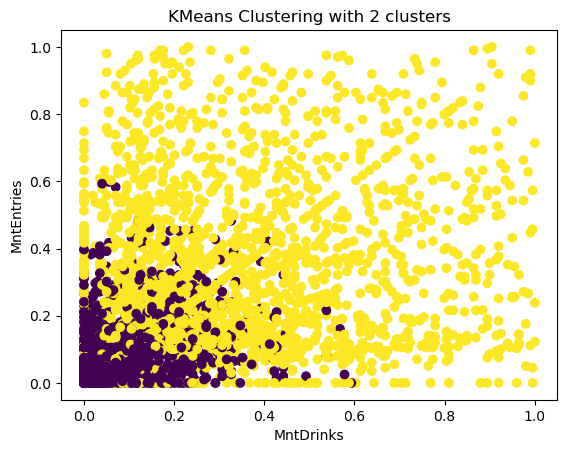

In [314]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'], c=df_mnt_k2['k2'])
plt.xlabel('MntDrinks')
plt.ylabel('MntEntries')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

<h2>K=3<h2>

In [315]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)
df_mnt_k3['k3 cluster'] = model_k3.labels_
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k3 cluster                    0         1         2
MntMeat&Fish           0.055489  0.391862  0.391375
MntEntries             0.031620  0.418311  0.150676
MntDrinks              0.031514  0.436078  0.149715
MntAdditionalRequests  0.069824  0.322274  0.279399
MntDesserts            0.032202  0.432839  0.144932
MntVegan&Vegetarian    0.033844  0.498264  0.229222

In [316]:
df_mnt_k3.groupby(['k3 cluster']).describe().transpose()

k3 cluster                             0            1            2
MntMeat&Fish          count  3752.000000  1299.000000  1839.000000
                      mean      0.055489     0.391862     0.391375
                      std       0.074615     0.203754     0.211937
                      min       0.000000     0.013351     0.006676
                      25%       0.006676     0.239653     0.224299
                      50%       0.020694     0.365154     0.369159
                      75%       0.076268     0.519693     0.528371
                      max       0.426569     0.996662     1.000000
MntEntries            count  3752.000000  1299.000000  1839.000000
                      mean      0.031620     0.418311     0.150676
                      std       0.048710     0.256636     0.134726
                      min       0.000000     0.000000     0.000000
                      25%       0.005025     0.195980     0.050251
                      50%       0.015075     0.381910     0.117085
                      75%       0.040201     0.603015     0.211055
                      max       0.582915     1.000000     0.864322
MntDrinks             count  3752.000000  1299.000000  1839.000000
                      mean      0.031514     0.436078     0.149715
                      std       0.047673     0.254628     0.137107
                      min       0.000000     0.000000     0.000000
                      25%       0.005025     0.221106     0.045226
                      50%       0.015075     0.407035     0.115578
                      75%       0.040201     0.628141     0.216080
                      max       0.577889     1.000000     0.879397
MntAdditionalRequests count  3752.000000  1299.000000  1839.000000
                      mean      0.069824     0.322274     0.279399
                      std       0.074751     0.238297     0.222790
                      min       0.000000     0.000000     0.000000
                      25%       0.019578     0.136546     0.108434
                      50%       0.044177     0.244980     0.212851
                      75%       0.096386     0.479920     0.397590
                      max       0.502008     1.000000     1.000000
MntDesserts           count  3752.000000  1299.000000  1839.000000
                      mean      0.032202     0.432839     0.144932
                      std       0.049672     0.257557     0.132422
                      min       0.000000     0.000000     0.000000
                      25%       0.005025     0.201005     0.045226
                      50%       0.015075     0.417085     0.110553
                      75%       0.040201     0.633166     0.211055
                      max       0.557789     1.000000     0.743719
MntVegan&Vegetarian   count  3752.000000  1299.000000  1839.000000
                      mean      0.033844     0.498264     0.229222
                      std       0.038661     0.234601     0.155519
                      min       0.000000     0.058058     0.008008
                      25%       0.009009     0.309309     0.115516
                      50%       0.019019     0.496496     0.186186
                      75%       0.045045     0.674174     0.303303
                      max       0.326326     1.000000     0.883884

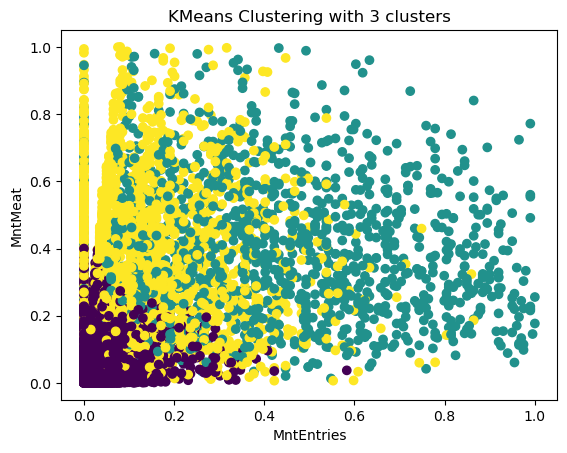

In [317]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k3['MntEntries'], df_mnt_k3['MntMeat&Fish'], c=df_mnt_k3['k3 cluster'])
plt.xlabel('MntEntries')
plt.ylabel('MntMeat')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

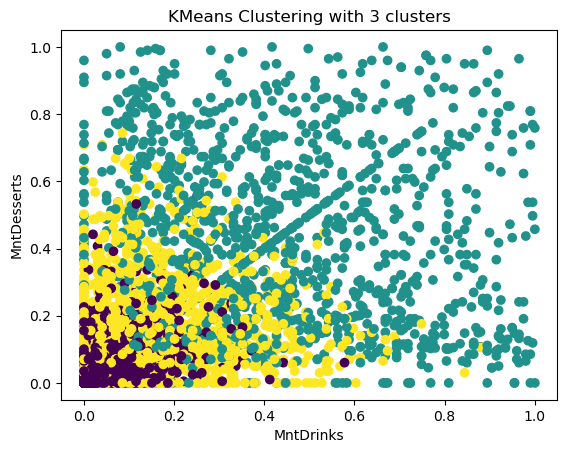

In [318]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k3['MntDrinks'], df_mnt_k3['MntDesserts'], c=df_mnt_k3['k3 cluster'])
plt.xlabel('MntDrinks')
plt.ylabel('MntDesserts')
plt.title('KMeans Clustering with 3 clusters')
plt.show()

<h2>K=4<h2>

In [319]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)
df_mnt_k4['k4'] = model_k4.labels_
df_mnt_k4.groupby(['k4']).mean().transpose()

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


k4                            0         1         2         3
MntMeat&Fish           0.384003  0.059528  0.485028  0.260614
MntEntries             0.440067  0.033755  0.159187  0.164880
MntDrinks              0.451788  0.033868  0.155692  0.180704
MntAdditionalRequests  0.304668  0.070338  0.155041  0.543999
MntDesserts            0.456579  0.034266  0.144162  0.175930
MntVegan&Vegetarian    0.499633  0.036179  0.293778  0.188840

In [320]:
df_mnt_k4.groupby(['k4']).describe().transpose()

k4                                     0            1            2           3
MntMeat&Fish          count  1133.000000  3827.000000  1208.000000  722.000000
                      mean      0.384003     0.059528     0.485028    0.260614
                      std       0.199108     0.079083     0.196238    0.170256
                      min       0.020694     0.000000     0.080107    0.003338
                      25%       0.235648     0.006676     0.340454    0.128505
                      50%       0.355140     0.022029     0.471295    0.234312
                      75%       0.511348     0.088117     0.613818    0.352136
                      max       0.988652     0.411883     1.000000    0.991989
MntEntries            count  1133.000000  3827.000000  1208.000000  722.000000
                      mean      0.440067     0.033755     0.159187    0.164880
                      std       0.259633     0.054294     0.136931    0.150473
                      min       0.000000     0.000000     0.000000    0.000000
                      25%       0.211055     0.005025     0.060302    0.051508
                      50%       0.417085     0.015075     0.125628    0.127889
                      75%       0.628141     0.040201     0.226131    0.231156
                      max       1.000000     0.592965     0.859296    0.864322
MntDrinks             count  1133.000000  3827.000000  1208.000000  722.000000
                      mean      0.451788     0.033868     0.155692    0.180704
                      std       0.256166     0.054046     0.139099    0.174216
                      min       0.000000     0.000000     0.000000    0.000000
                      25%       0.236181     0.005025     0.050251    0.050251
                      50%       0.427136     0.015075     0.120603    0.130653
                      75%       0.643216     0.040201     0.226131    0.251256
                      max       1.000000     0.577889     0.773869    0.944724
MntAdditionalRequests count  1133.000000  3827.000000  1208.000000  722.000000
                      mean      0.304668     0.070338     0.155041    0.543999
                      std       0.219656     0.071620     0.106583    0.196733
                      min       0.000000     0.000000     0.000000    0.156627
                      25%       0.136546     0.020080     0.076305    0.389558
                      50%       0.236948     0.044177     0.132530    0.510040
                      75%       0.433735     0.096386     0.212851    0.686747
                      max       1.000000     0.401606     0.642570    1.000000
MntDesserts           count  1133.000000  3827.000000  1208.000000  722.000000
                      mean      0.456579     0.034266     0.144162    0.175930
                      std       0.258016     0.054857     0.126931    0.162413
                      min       0.000000     0.000000     0.000000    0.000000
                      25%       0.229146     0.005025     0.050251    0.050251
                      50%       0.457286     0.015075     0.110553    0.128141
                      75%       0.663317     0.040201     0.216080    0.250000
                      max       1.000000     0.613065     0.708543    0.944724
MntVegan&Vegetarian   count  1133.000000  3827.000000  1208.000000  722.000000
                      mean      0.499633     0.036179     0.293778    0.188840
                      std       0.236463     0.042712     0.190536    0.134177
                      min       0.058058     0.000000     0.008008    0.012012
                      25%       0.308308     0.009009     0.147147    0.095095
                      50%       0.498498     0.019019     0.240240    0.143143
                      75%       0.673674     0.048048     0.397648    0.241241
                      max       1.000000     0.390390     0.979980    0.865866

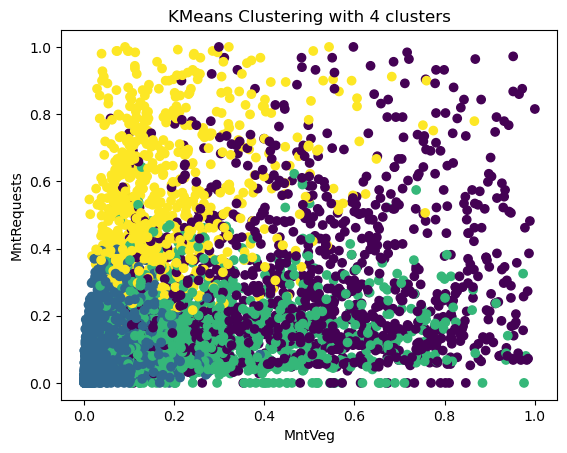

In [321]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k4['MntVegan&Vegetarian'], df_mnt_k4['MntAdditionalRequests'], c=df_mnt_k4['k4'])
plt.xlabel('MntVeg')
plt.ylabel('MntRequests')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

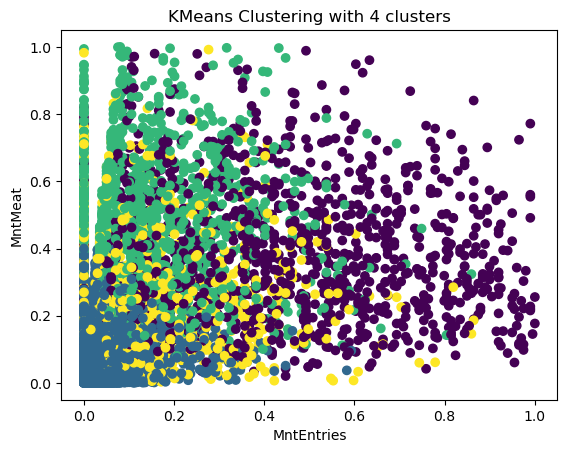

In [322]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k4['MntEntries'], df_mnt_k4['MntMeat&Fish'], c=df_mnt_k4['k4'])
plt.xlabel('MntEntries')
plt.ylabel('MntMeat')
plt.title('KMeans Clustering with 4 clusters')
plt.show()

In [323]:
#K means doesn't seem to be the most appropriate clustering algorithm for this data frame
#Let's see if a density based clustering algorithm would work better

<h2>3.1.3. Density Based Clustering- OPTICS Algorithm<h2>

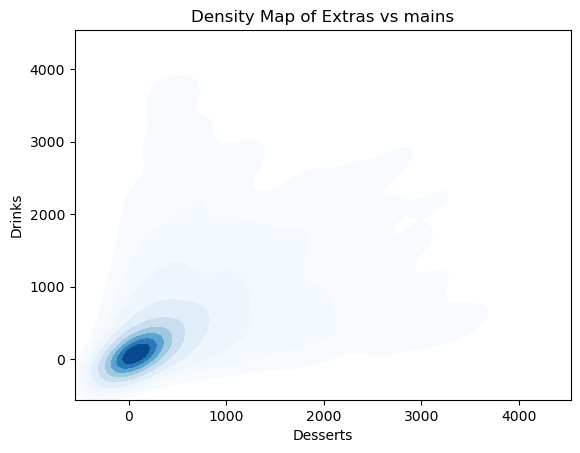

In [324]:
#check densities on various variables to choose what type of density based algorithm to use

import seaborn as sns

# Extract the columns of interest
drinks = df['MntDesserts']
meat_fish = df['MntDrinks']

# Create the density map
sns.kdeplot(x=drinks, y=meat_fish, cmap='Blues', shade=True)

# Set the axis labels and title
plt.xlabel('Desserts')
plt.ylabel('Drinks')
plt.title('Density Map of Extras vs mains')

# Show the plot
plt.show()

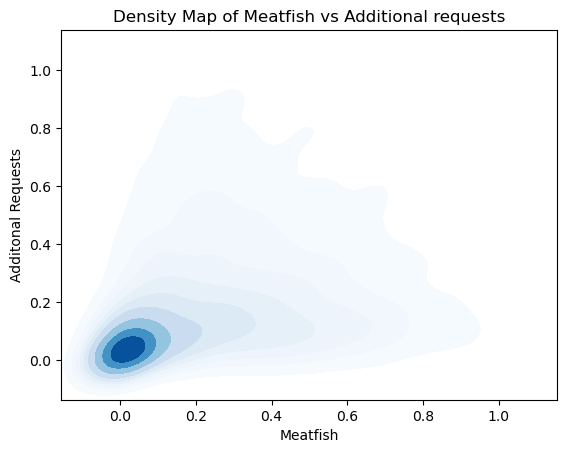

In [325]:
#check densities on various variables to choose what type of density based algorithm to use

import seaborn as sns

# Extract the columns of interest
meatfish = df_mnt['MntMeat&Fish']
add_requests = df_mnt['MntAdditionalRequests']

# Create the density map
sns.kdeplot(x=meatfish, y=add_requests, cmap='Blues', shade=True)

# Set the axis labels and title
plt.xlabel('Meatfish')
plt.ylabel('Additonal Requests')
plt.title('Density Map of Meatfish vs Additional requests')

# Show the plot
plt.show()

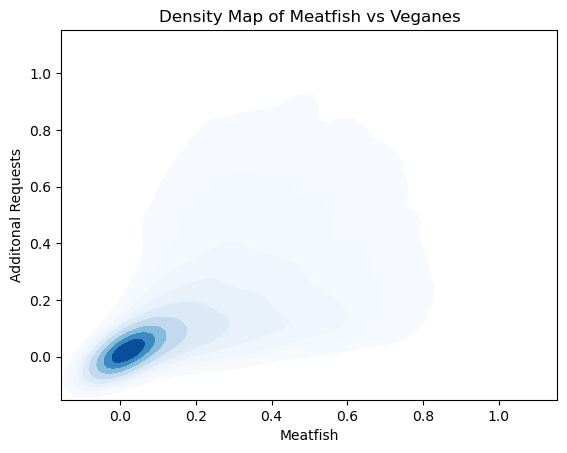

In [326]:
#check densities on various variables to choose what type of density based algorithm to use

import seaborn as sns

# Extract the columns of interest
meatfish = df_mnt['MntMeat&Fish']
veganes = df_mnt['MntVegan&Vegetarian']

# Create the density map
sns.kdeplot(x=meatfish, y=veganes, cmap='Blues', shade=True)

# Set the axis labels and title
plt.xlabel('Meatfish')
plt.ylabel('Additonal Requests')
plt.title('Density Map of Meatfish vs Veganes')

# Show the plot
plt.show()

In [327]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Extract the columns of interest
X = df_mnt

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Instantiate and fit the DBSCAN model
dbscan = DBSCAN(eps=0.7, min_samples=26, metric='euclidean')
dbscan.fit(X)

# Add the cluster labels to the dataframe
df_mnt['cluster_'] = dbscan.labels_

# Print the number of clusters and cluster labels
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
print('Cluster labels:', dbscan.labels_)

Cluster labels: [-1  0  0 ... -1  0  0]


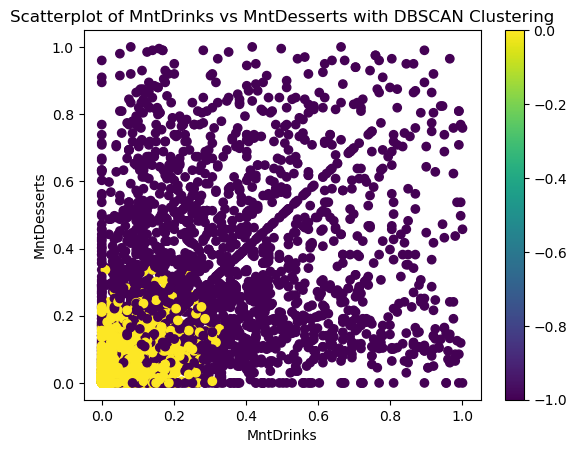

In [328]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntDrinks'
y_var = 'MntDesserts'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

In [329]:
df_mnt.groupby('cluster_').agg(['mean', 'median', 'std', 'count'])

MntMeat&Fish                           MntEntries            \
                 mean    median       std count       mean    median   
cluster_                                                               
-1           0.389184  0.357143  0.223593  2471   0.313789  0.251256   
 0           0.107556  0.030708  0.151323  4419   0.037054  0.019598   

                         MntDrinks            ... MntAdditionalRequests        \
               std count      mean    median  ...                   std count   
cluster_                                      ...                               
-1        0.238014  2471  0.321191  0.266332  ...              0.241880  2471   
 0        0.050479  4419  0.037649  0.015075  ...              0.113174  4419   

         MntDesserts                           MntVegan&Vegetarian            \
                mean    median       std count                mean    median   
cluster_                                                                       
-1          0.317589  0.256281  0.243959  2471            0.392875  0.352352   
 0          0.037304  0.015075  0.050101  4419            0.050910  0.024024   

                          
               std count  
cluster_                  
-1        0.234284  2471  
 0        0.061096  4419  

[2 rows x 24 columns]

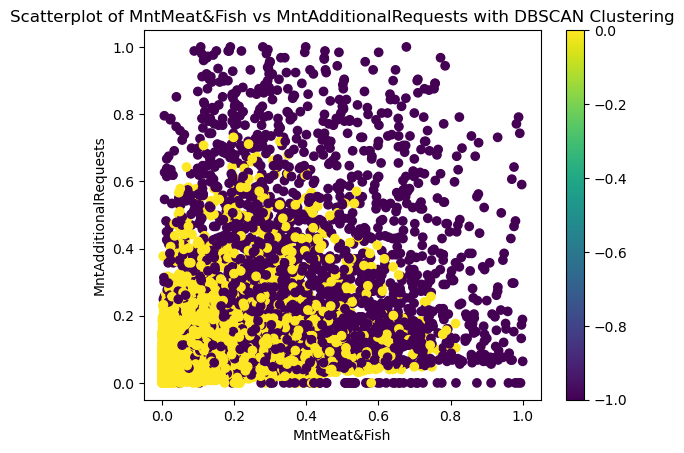

In [330]:
import matplotlib.pyplot as plt

# Set the x and y variables
x_var = 'MntMeat&Fish'
y_var = 'MntAdditionalRequests'

# Create the scatterplot
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=df_mnt['cluster_'], cmap='viridis')
plt.colorbar()

# Set the axis labels and title
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('Scatterplot of {} vs {} with DBSCAN Clustering'.format(x_var, y_var))

# Show the plot
plt.show()

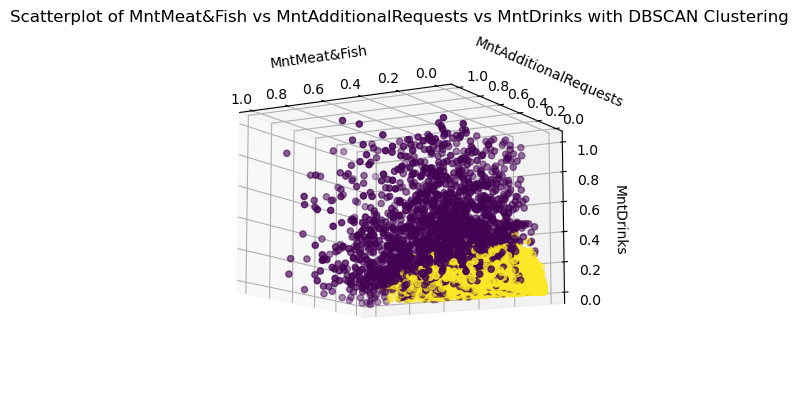

In [331]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Set the x, y, and z variables
x_var = 'MntMeat&Fish'
y_var = 'MntAdditionalRequests'
z_var = 'MntDrinks'
c_var = 'cluster_'

# Create the figure and 3D axis object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the scatterplot
ax.scatter(df_mnt[x_var], df_mnt[y_var], df_mnt[z_var], c=df_mnt[c_var], cmap='viridis')

# Set the axis labels and title
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title('Scatterplot of {} vs {} vs {} with DBSCAN Clustering'.format(x_var, y_var, z_var))
ax.view_init(elev=-10, azim=120)

# Show the plot
plt.show()


<h2>3.1.4. Cluster analysis <h2>

<h3>Cluster A (cluster 0): roughly 45% bigger than Cluster B (cluster -1)<h3><h3>Cluster A: eventhough consumers don't spend as much on each type of item, they're more spread out on the type of dishes they consume relative to Cluster B where consumers spend more but more consistently.<h3>

<h2>3.1.4.1 Cluster analysis with unused demographic variables <h2>

In [332]:
conclusions_P1 = pd.concat([df_mnt['cluster_'].reset_index(drop=True), crm.reset_index(drop=True)], axis=1, join='inner')

In [333]:
df_mnt.groupby('cluster_').agg(['mean', 'std', 'count'])

MntMeat&Fish                 MntEntries                 MntDrinks  \
                 mean       std count       mean       std count      mean   
cluster_                                                                     
-1           0.389184  0.223593  2471   0.313789  0.238014  2471  0.321191   
 0           0.107556  0.151323  4419   0.037054  0.050479  4419  0.037649   

                         MntAdditionalRequests                 MntDesserts  \
               std count                  mean       std count        mean   
cluster_                                                                     
-1        0.243383  2471              0.312419  0.241880  2471    0.317589   
 0        0.051485  4419              0.095596  0.113174  4419    0.037304   

                         MntVegan&Vegetarian                  
               std count                mean       std count  
cluster_                                                      
-1        0.243959  2471            0.392875  0.234284  2471  
 0        0.050101  4419            0.050910  0.061096  4419

In [334]:
conclusions_P1

cluster_                  Name   Education Marital_Status    Income  \
0           -1       Miss Leah Lewis  GRADUATION         SINGLE  113947.0   
1            0      Miss Grace Black  GRADUATION        MARRIED  114297.0   
2            0    Mr. Gavin Morrison         PHD        MARRIED  115476.0   
3            0       Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
4            0     Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
...        ...                   ...         ...            ...       ...   
6885         0    Mr. Adam Robertson  GRADUATION        MARRIED  110346.0   
6886         0     Mr. Gordon Oliver  HIGHSCHOOL        MARRIED   30009.0   
6887        -1      Miss Emily Jones  GRADUATION         SINGLE   77623.0   
6888         0      Mr. Carl Roberts  GRADUATION         SINGLE  108963.0   
6889         0  Mr. Brandon Clarkson  GRADUATION         SINGLE   78653.0   

      Kid_Younger6  Children_6to18  Gender  Age age_group  
0                0               0       1   42     35-45  
1                0               0       1   49     45-65  
2                0               0       0   63     45-65  
3                1               1       0   43     35-45  
4                0               0       0   52     45-65  
...            ...             ...     ...  ...       ...  
6885             0               1       0   62     45-65  
6886             0               0       0   66       65+  
6887             0               1       1   50     45-65  
6888             0               0       0   62     45-65  
6889             0               1       0   61     45-65  

[6890 rows x 10 columns]

In [335]:
clusterA = conclusions_P1[conclusions_P1['cluster_']==0]
clusterB = conclusions_P1[conclusions_P1['cluster_']==-1]

In [336]:
clusterA

cluster_                  Name   Education Marital_Status    Income  \
1            0      Miss Grace Black  GRADUATION        MARRIED  114297.0   
2            0    Mr. Gavin Morrison         PHD        MARRIED  115476.0   
3            0       Mr. Ryan Glover  GRADUATION        MARRIED  101172.0   
4            0     Mr. Paul Anderson  HIGHSCHOOL         SINGLE  123128.0   
7            0    Mr. Nathan Wallace         PHD       DIVORCED   71692.0   
...        ...                   ...         ...            ...       ...   
6882         0       Mr. Matt Duncan  GRADUATION        MARRIED   50420.0   
6885         0    Mr. Adam Robertson  GRADUATION        MARRIED  110346.0   
6886         0     Mr. Gordon Oliver  HIGHSCHOOL        MARRIED   30009.0   
6888         0      Mr. Carl Roberts  GRADUATION         SINGLE  108963.0   
6889         0  Mr. Brandon Clarkson  GRADUATION         SINGLE   78653.0   

      Kid_Younger6  Children_6to18  Gender  Age age_group  
1                0               0       1   49     45-65  
2                0               0       0   63     45-65  
3                1               1       0   43     35-45  
4                0               0       0   52     45-65  
7                0               1       0   42     35-45  
...            ...             ...     ...  ...       ...  
6882             0               1       0   60     45-65  
6885             0               1       0   62     45-65  
6886             0               0       0   66       65+  
6888             0               0       0   62     45-65  
6889             0               1       0   61     45-65  

[4419 rows x 10 columns]

<h2> Cluster A<h2>

In [337]:
clusterA.describe()

cluster_         Income  Kid_Younger6  Children_6to18       Gender  \
count    4419.0    4419.000000   4419.000000     4419.000000  4419.000000   
mean        0.0   78062.887016      0.438108        0.494003     0.268839   
std         0.0   35381.349959      0.548223        0.540063     0.443406   
min         0.0    2493.800000      0.000000        0.000000     0.000000   
25%         0.0   51992.500000      0.000000        0.000000     0.000000   
50%         0.0   77467.000000      0.000000        0.000000     0.000000   
75%         0.0  102299.000000      1.000000        1.000000     1.000000   
max         0.0  237322.825000      2.000000        2.000000     1.000000   

               Age  
count  4419.000000  
mean     46.464132  
std      11.940977  
min      18.000000  
25%      38.000000  
50%      45.000000  
75%      56.000000  
max      75.000000

In [338]:
clusterA.groupby('Education')['Education'].agg(['count'])

count
Education        
BASIC         105
GRADUATION   2220
HIGHSCHOOL    424
MASTER        724
PHD           946

In [339]:
clusterA.groupby('Marital_Status')['Marital_Status'].agg(['count'])

count
Marital_Status       
DIVORCED          412
MARRIED          2862
SINGLE            977
WIDOW             168

In [340]:
clusterA.groupby('Gender')['Gender'].agg(['count'])

count
Gender       
0        3231
1        1188

In [341]:
clusterA.groupby('age_group')['age_group'].agg(['count'])

count
age_group       
<15            0
15-25        112
25-35        739
35-45       1379
45-65       1932
65+          257

In [342]:
round(clusterA['Children_6to18'].value_counts()/(len(clusterA))*100,2)

0    52.68
1    45.24
2     2.08
Name: Children_6to18, dtype: float64

In [343]:
round(clusterA['Kid_Younger6'].value_counts()/(len(cluster0))*100,2)

0    88.99
1    57.98
2     4.10
Name: Kid_Younger6, dtype: float64

<h2>Cluster B<h2>

In [344]:
clusterB.describe()

cluster_         Income  Kid_Younger6  Children_6to18       Gender  \
count    2471.0    2471.000000   2471.000000     2471.000000  2471.000000   
mean       -1.0   77593.418970      0.448401        0.486038     0.259814   
std         0.0   35376.228516      0.535830        0.547082     0.438621   
min        -1.0    3005.400000      0.000000        0.000000     0.000000   
25%        -1.0   50699.000000      0.000000        0.000000     0.000000   
50%        -1.0   76109.000000      0.000000        0.000000     0.000000   
75%        -1.0  101236.000000      1.000000        1.000000     1.000000   
max        -1.0  237639.725000      2.000000        2.000000     1.000000   

               Age  
count  2471.000000  
mean     46.666936  
std      12.109937  
min      18.000000  
25%      37.500000  
50%      46.000000  
75%      57.000000  
max      74.000000

In [345]:
clusterB.groupby('Education')['Education'].agg(['count'])

count
Education        
BASIC          72
GRADUATION   1236
HIGHSCHOOL    231
MASTER        406
PHD           526

In [346]:
clusterB.groupby('Marital_Status')['Marital_Status'].agg(['count'])

count
Marital_Status       
DIVORCED          222
MARRIED          1644
SINGLE            532
WIDOW              73

In [347]:
clusterB.groupby('Gender')['Gender'].agg(['count'])

count
Gender       
0        1829
1         642

In [348]:
clusterB.groupby('age_group')['age_group'].agg(['count'])

count
age_group       
<15            0
15-25         66
25-35        430
35-45        716
45-65       1104
65+          155

In [349]:
round(clusterB['Children_6to18'].value_counts()/(len(cluster0))*100,2)

0    45.50
1    36.89
2     2.09
Name: Children_6to18, dtype: float64

In [350]:
round(clusterB['Kid_Younger6'].value_counts()/(len(cluster0))*100,2)

0    48.27
1    34.53
2     1.68
Name: Kid_Younger6, dtype: float64

<h2>3.1.4.2 Cluster analysis with unused marketing table<h2>

In [351]:
conclusions_mkt = pd.concat([df_mnt['cluster_'].reset_index(drop=True), mkt.reset_index(drop=True)], axis=1, join='inner')

In [352]:
conclusions_mkt

cluster_  CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
0           -1       31958              0              0              0   
1            0        5387              0              0              0   
2            0       32006              0              0              0   
3            0        7511              0              0              0   
4            0       12308              0              0              0   
...        ...         ...            ...            ...            ...   
6885         0       28346              0              0              0   
6886         0       27581              0              0              0   
6887        -1       22382              0              0              0   
6888         0       22976              0              0              0   
6889         0       11300              0              0              0   

      Response_Cmp4  Response_Cmp5  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  
...             ...            ...  
6885              0              0  
6886              0              0  
6887              0              0  
6888              0              0  
6889              0              0  

[6890 rows x 7 columns]

In [353]:
clusterA = conclusions_mkt[conclusions_mkt['cluster_']==0]
clusterB = conclusions_mkt[conclusions_mkt['cluster_']==-1]

In [354]:
clusterA.describe()

cluster_    CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count    4419.0   4419.000000    4419.000000    4419.000000    4419.000000   
mean        0.0  20139.023082       0.076940       0.077846       0.084861   
std         0.0   8696.281128       0.266527       0.267959       0.278706   
min         0.0   5081.000000       0.000000       0.000000       0.000000   
25%         0.0  12638.000000       0.000000       0.000000       0.000000   
50%         0.0  20378.000000       0.000000       0.000000       0.000000   
75%         0.0  27669.500000       0.000000       0.000000       0.000000   
max         0.0  35072.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count    4419.000000    4419.000000  
mean        0.064494       0.015162  
std         0.245659       0.122210  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [355]:
clusterB.describe()

cluster_    CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count    2471.0   2471.000000    2471.000000    2471.000000    2471.000000   
mean       -1.0  19927.566572       0.084986       0.066775       0.077701   
std         0.0   8676.736560       0.278917       0.249682       0.267755   
min        -1.0   5078.000000       0.000000       0.000000       0.000000   
25%        -1.0  12221.000000       0.000000       0.000000       0.000000   
50%        -1.0  19622.000000       0.000000       0.000000       0.000000   
75%        -1.0  27420.500000       0.000000       0.000000       0.000000   
max        -1.0  35066.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count    2471.000000    2471.000000  
mean        0.067179       0.012141  
std         0.250383       0.109537  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

<h3> -Cluster A: campaigns 1 and 2 were the most successful. They were similarly successful<h3>
<h3> -Cluster B: campaign 1 was the most successful by a larger margin than the same campaign on Cluster B<h3>
<h3> -Campaign 4 was more successful on B than A; Campaign 2 was more succesful on A than B
<h3> -Campaign 5 performed much worse compared to all other campaigns on both groups<h3>
<h3> -Overall, costumers did not use campaigns a lot<h3>

## 3.2. PCA

In [356]:
df_pca= df_mnt.copy()

In [357]:
from sklearn.decomposition import PCA

### 3.2.1 Choosing the number of Components

In [358]:
pca = PCA(n_components=6)
pca.fit_transform(df_pca)

array([[ 0.74066187,  0.008671  , -0.0325628 , -0.10829381,  0.15306458,
         0.18532924],
       [-0.29241707,  0.21389097, -0.17752852,  0.14348562,  0.04294909,
        -0.00809742],
       [-0.32903794,  0.42887933, -0.07711792,  0.06412572,  0.00400628,
        -0.00097304],
       ...,
       [ 0.80177468, -0.28112751,  0.14654277,  0.0603361 ,  0.08287411,
         0.24087024],
       [-0.4889801 , -0.0921164 , -0.00150141, -0.02826185,  0.02071926,
         0.02728582],
       [-0.45406316, -0.11906093, -0.02178986,  0.02179056,  0.11123198,
        -0.03918256]])

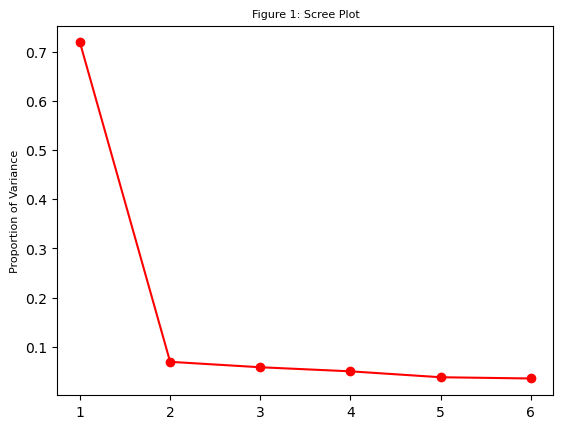

In [359]:
prop_var = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var, 
         'ro-')
plt.title('Figure 1: Scree Plot', fontsize=8)
plt.ylabel('Proportion of Variance', fontsize=8)
plt.show()

- Considering the elbow rule, the 2 first components should be retain 

### 3.2.2. PCA for 2 components 

In [360]:
pca = PCA(n_components=2)
PC = pca.fit_transform(df_pca)

In [361]:
pca2_res = pd.DataFrame(data = PC, 
                            columns = ['PC1', 'PC2'])
 
pca2_res.head(6)

PC1       PC2
0  0.740662  0.008671
1 -0.292417  0.213891
2 -0.329038  0.428879
3 -0.269490  0.221904
4 -0.508345 -0.051767
5  0.504444 -0.260452

#### 3.2.2.1. Biplot

In [362]:
def biplot(score,coef,labels=None):
 
    xs = score[:,0]
    ys = score[:,1]
    n = coef.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,
                s=5, 
                color='orange')
 
    for i in range(n): 
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'purple',
                  alpha = 0.5)
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'darkblue', 
                 ha = 'center', 
                 va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 

    plt.figure()

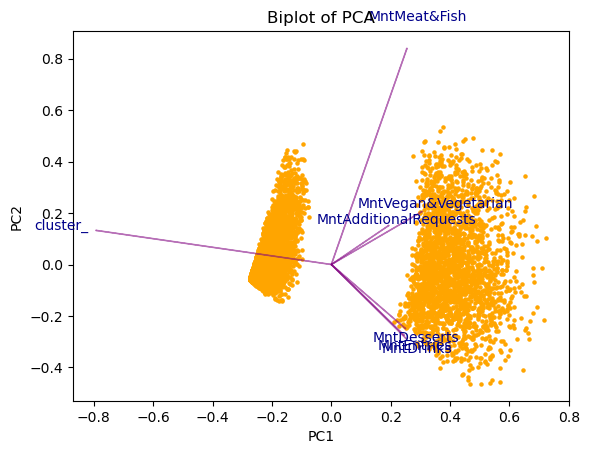

<Figure size 640x480 with 0 Axes>

In [363]:
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       list(df_pca.columns))

## 3.3. K-means

In [364]:
from sklearn.cluster import KMeans

In [365]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt)
    inertias.append(model.inertia_)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\J Loureiro\anaconda3\lib\si

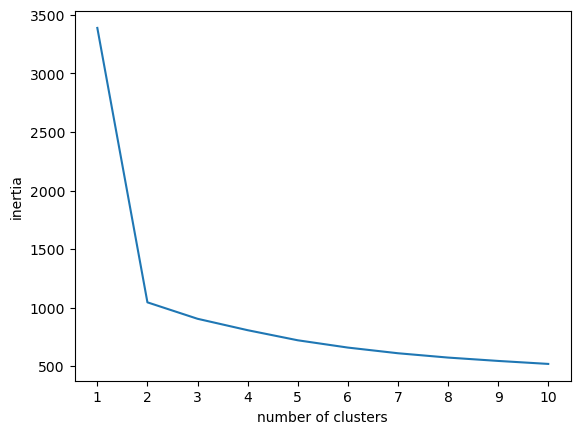

In [366]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [367]:
df_mnt.corr()

MntMeat&Fish  MntEntries  MntDrinks  \
MntMeat&Fish               1.000000    0.386306   0.384301   
MntEntries                 0.386306    1.000000   0.556068   
MntDrinks                  0.384301    0.556068   1.000000   
MntAdditionalRequests      0.376987    0.366331   0.375893   
MntDesserts                0.400275    0.563511   0.547912   
MntVegan&Vegetarian        0.614529    0.582153   0.582981   
cluster_                  -0.598982   -0.667309  -0.668117   

                       MntAdditionalRequests  MntDesserts  \
MntMeat&Fish                        0.376987     0.400275   
MntEntries                          0.366331     0.563511   
MntDrinks                           0.375893     0.547912   
MntAdditionalRequests               1.000000     0.370214   
MntDesserts                         0.370214     1.000000   
MntVegan&Vegetarian                 0.388872     0.579535   
cluster_                           -0.519940    -0.663750   

                       MntVegan&Vegetarian  cluster_  
MntMeat&Fish                      0.614529 -0.598982  
MntEntries                        0.582153 -0.667309  
MntDrinks                         0.582981 -0.668117  
MntAdditionalRequests             0.388872 -0.519940  
MntDesserts                       0.579535 -0.663750  
MntVegan&Vegetarian               1.000000 -0.741142  
cluster_                         -0.741142  1.000000

In [368]:
df_mnt_k3 = df_mnt.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(df_mnt)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [369]:
model_k3

KMeans(n_clusters=3, random_state=100)

In [370]:
df_mnt_k3['k3 cluster'] = model_k3.labels_

In [371]:
df_mnt_k3.groupby(['k3 cluster']).mean().transpose()

k3 cluster                    0         1         2
MntMeat&Fish           0.384544  0.107556  0.396651
MntEntries             0.216576  0.037054  0.470233
MntDrinks              0.228307  0.037649  0.470668
MntAdditionalRequests  0.302230  0.095596  0.328817
MntDesserts            0.212361  0.037304  0.486930
MntVegan&Vegetarian    0.315242  0.050910  0.517810
cluster_              -1.000000  0.000000 -1.000000

In [372]:
descr3 = df_mnt_k3.groupby(['k3 cluster']).describe().transpose()
descr3

k3 cluster                             0            1           2
MntMeat&Fish          count  1524.000000  4419.000000  947.000000
                      mean      0.384544     0.107556    0.396651
                      std       0.235744     0.151323    0.202412
                      min       0.004005     0.000000    0.020694
                      25%       0.192757     0.008011    0.245661
                      50%       0.347130     0.030708    0.370494
                      75%       0.554406     0.149533    0.519025
                      max       1.000000     0.814419    0.996662
MntEntries            count  1524.000000  4419.000000  947.000000
                      mean      0.216576     0.037054    0.470233
                      std       0.158386     0.050479    0.260389
                      min       0.000000     0.000000    0.000000
                      25%       0.105528     0.005025    0.251256
                      50%       0.180905     0.019598    0.457286
                      75%       0.306533     0.050251    0.668342
                      max       0.974874     0.361809    1.000000
MntDrinks             count  1524.000000  4419.000000  947.000000
                      mean      0.228307     0.037649    0.470668
                      std       0.176270     0.051485    0.261487
                      min       0.000000     0.000000    0.000000
                      25%       0.100503     0.005025    0.251256
                      50%       0.190955     0.015075    0.457286
                      75%       0.326633     0.050251    0.668342
                      max       0.979899     0.326633    1.000000
MntAdditionalRequests count  1524.000000  4419.000000  947.000000
                      mean      0.302230     0.095596    0.328817
                      std       0.242271     0.113174    0.240470
                      min       0.000000     0.000000    0.000000
                      25%       0.112450     0.020080    0.140562
                      50%       0.224900     0.052209    0.257028
                      75%       0.433735     0.124498    0.485944
                      max       1.000000     0.730924    1.000000
MntDesserts           count  1524.000000  4419.000000  947.000000
                      mean      0.212361     0.037304    0.486930
                      std       0.160665     0.050101    0.259408
                      min       0.000000     0.000000    0.000000
                      25%       0.090452     0.005025    0.263819
                      50%       0.180905     0.015075    0.492462
                      75%       0.301508     0.050251    0.693467
                      max       0.909548     0.336683    1.000000
MntVegan&Vegetarian   count  1524.000000  4419.000000  947.000000
                      mean      0.315242     0.050910    0.517810
                      std       0.195968     0.061096    0.236966
                      min       0.012012     0.000000    0.058058
                      25%       0.156907     0.010010    0.330831
                      50%       0.269269     0.024024    0.511512
                      75%       0.441692     0.070070    0.703203
                      max       0.979980     0.421421    1.000000
cluster_              count  1524.000000  4419.000000  947.000000
                      mean     -1.000000     0.000000   -1.000000
                      std       0.000000     0.000000    0.000000
                      min      -1.000000     0.000000   -1.000000
                      25%      -1.000000     0.000000   -1.000000
                      50%      -1.000000     0.000000   -1.000000
                      75%      -1.000000     0.000000   -1.000000
                      max      -1.000000     0.000000   -1.000000

In [373]:
df_mnt_k2 = df_mnt.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(df_mnt)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [374]:
f_mnt_k2['k2'] = model_k2.labels_

NameError: name 'f_mnt_k2' is not defined

In [ ]:
df_mnt_k2.groupby(['k2']).mean().transpose()

In [ ]:
descr2 = df_mnt_k2.groupby(['k2']).describe().transpose()
descr2

Visualization 

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntEntries'], df_mnt_k2['MntMeat&Fish'], c=df_mnt_k2['k2'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt['MntEntries'], df_mnt['MntMeat&Fish'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df_mnt_k2['MntDrinks'], df_mnt_k2['MntEntries'])
plt.xlabel('')
plt.ylabel('')
plt.title('KMeans Clustering with 2 clusters')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a list to store silhouette scores for different values of k
silhouette_scores = []

# Fit k-means clustering for different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_mnt)
    score = silhouette_score(df_mnt, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for different values of k
import matplotlib.pyplot as plt
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
df_mnt_k4 = df_mnt.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
df_mnt_k4['k4'] = model_k4.labels_

In [ ]:
df_mnt_k4.groupby(['k4']).mean().transpose()

In [ ]:
descr4 = df_mnt_k4.groupby(['k4']).describe().transpose()
descr4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_mnt[x_var], df_mnt[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()


In [ ]:
df_mnt.corr()

#Let's try interpret MntEntries, MntDrinks and MntDesserts as supplements

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply MinMaxScaler to your dataframe
df_mnt_scaled = scaler.fit_transform(df_mnt)

# The df_mnt_scaled is now a numpy array with the same shape as your original dataframe

import pandas as pd

# Transform numpy array into dataframe
df_mnt_scaled = pd.DataFrame(df_mnt_scaled, columns=df_mnt.columns)

In [ ]:
df_mnt_scaled

In [ ]:
# DO IT
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_mnt_scaled)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
df_k4 = df_mnt_scaled.copy()
k4 = KMeans(n_clusters=4, random_state = 100).fit(df_mnt)

In [ ]:
df_k4['k4_c'] = k4.labels_

In [ ]:
d4 = df_k4.groupby(['k4_c']).describe().transpose()
d4

In [ ]:
import matplotlib.pyplot as plt

# Select two variables to plot
x_var = 'MntMeat&Fish'
y_var = 'MntEntries'

# Create scatter plot with color-coded clusters
plt.scatter(df_k4[x_var], df_k4[y_var], c=kmeans.labels_)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title('K-Means Clustering with k=4')
plt.show()

## 3.3. DBSCAN

## 3.4. Cluster analysis & caracterization

## 3.5. Business & Marketing insights

# 4. 2nd Perspective - Preference in the means of purchase

EXPLICAÇÃO DA PERSPECTIVA:

 - Objetivos;
 - Interesse;
 - variáveis foco;

## 4.1. Dataframe Preparation

In [ ]:
#Criar subset com as variáveis que vão contribuir para os clusters
sales_vc = df[[ 'NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases',]].copy()
sales_vc

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Create an instance of the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(sales_vc)

In [ ]:
# create new dataframe with scaled data
sales_vc_minmax = pd.DataFrame(scaled_data, columns=['NumAppPurchases','NumTakeAwayPurchases', 'NumStorePurchases'])

## 4.2 K means Clustering Attempts

## 2 Clusters (K=2)

In [ ]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(sales_vc_minmax)
    inertias.append(model.inertia_)

In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(sales_vc_minmax)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(sales_vc_minmax, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

The optimal K with the Silhouette method is 2! 

The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation). 
https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

Testar K= 2; 3; 4 

In [ ]:
from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
sales_vc_sample = sales_vc_minmax.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(sales_vc_sample , method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

In [ ]:
sales_vc_k2 = sales_vc_minmax.copy()
model_k2 = KMeans(n_clusters=2, random_state = 100).fit(sales_vc_k2)

In [132]:
sales_vc_k2['k_label'] = model_k2.labels_

In [133]:
sales_vc_k2.groupby(['k_label']).mean().transpose()

k_label                      0         1
NumAppPurchases       0.609533  0.335865
NumTakeAwayPurchases  0.480807  0.141915
NumStorePurchases     0.649994  0.263066

In [134]:
sales_vc_k2.groupby(['k_label']).describe().transpose()

k_label                               0            1
NumAppPurchases      count  3365.000000  3525.000000
                     mean      0.609533     0.335865
                     std       0.180637     0.122864
                     min       0.230769     0.000000
                     25%       0.461538     0.230769
                     50%       0.615385     0.307692
                     75%       0.769231     0.384615
                     max       1.000000     0.846154
NumTakeAwayPurchases count  3365.000000  3525.000000
                     mean      0.480807     0.141915
                     std       0.215520     0.076400
                     min       0.166667     0.000000
                     25%       0.333333     0.083333
                     50%       0.416667     0.166667
                     75%       0.583333     0.166667
                     max       1.000000     0.583333
NumStorePurchases    count  3365.000000  3525.000000
                     mean      0.649994     0.263066
                     std       0.204153     0.096140
                     min       0.230769     0.000000
                     25%       0.461538     0.230769
                     50%       0.615385     0.230769
                     75%       0.846154     0.307692
                     max       1.000000     0.615385

## 3 Clusters (K=3) 

In [135]:
sales_vc_k3 = sales_vc_minmax.copy()
model_k3 = KMeans(n_clusters=3, random_state = 100).fit(sales_vc_k3)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:
sales_vc_k3['k_label'] = model_k3.labels_

In [137]:
sales_vc_k3.groupby(['k_label']).mean().transpose()

k_label                      0         1         2
NumAppPurchases       0.317420  0.536981  0.653296
NumTakeAwayPurchases  0.136737  0.680355  0.314277
NumStorePurchases     0.250412  0.670156  0.609320

Ordem de grandeza do clusters (n.º de individuos) : 2 < 0 < 1 

- C0 compra mais na app e na loja (grupo de clientes regulares)
- C1 é o que tem mais gentes mas o que consome menos (clientes não regulares)
- C2 compra mais no TK Away, mas o cluster que consome mais no geral (grupo de clientes regulares que previligiam o TK Away)


In [138]:
sales_vc_k3.groupby(['k_label']).describe().transpose()

k_label                               0            1            2
NumAppPurchases      count  3266.000000  1455.000000  2169.000000
                     mean      0.317420     0.536981     0.653296
                     std       0.103534     0.154631     0.175400
                     min       0.000000     0.230769     0.230769
                     25%       0.230769     0.461538     0.538462
                     50%       0.307692     0.538462     0.615385
                     75%       0.384615     0.615385     0.769231
                     max       0.692308     1.000000     1.000000
NumTakeAwayPurchases count  3266.000000  1455.000000  2169.000000
                     mean      0.136737     0.680355     0.314277
                     std       0.076280     0.155238     0.102759
                     min       0.000000     0.416667     0.083333
                     25%       0.083333     0.583333     0.250000
                     50%       0.083333     0.666667     0.333333
                     75%       0.166667     0.750000     0.416667
                     max       0.583333     1.000000     0.666667
NumStorePurchases    count  3266.000000  1455.000000  2169.000000
                     mean      0.250412     0.670156     0.609320
                     std       0.084082     0.220676     0.193267
                     min       0.000000     0.230769     0.153846
                     25%       0.230769     0.461538     0.461538
                     50%       0.230769     0.692308     0.615385
                     75%       0.307692     0.846154     0.769231
                     max       0.615385     1.000000     1.000000

## 4 Clusters (K=4) --> SOLUÇÃO

In [139]:
sales_vc_k4 = sales_vc_minmax.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(sales_vc_k4)

C:\Users\J Loureiro\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [140]:
sales_vc_k4['k_label'] = model_k4.labels_

In [141]:
sales_vc_k4.groupby(['k_label']).mean().transpose()

k_label                      0         1         2         3
NumAppPurchases       0.297988  0.622070  0.540062  0.598246
NumTakeAwayPurchases  0.124473  0.281351  0.723025  0.471194
NumStorePurchases     0.236713  0.481374  0.496932  0.851506

Ordem de grandeza do clusters (n.º de individuos) : 3 < 2 < 1 < 0

- C0 (geral_avg~8)  APP e Loja está mais equilibrado e que menos consome TK Away; é o grupo que tem mais individuos (Menos regulares)
- C1 (geral_avg~19) Consome mais na APP
- C2 (geral_avg~24) consome mais na loja, é o que consome mais na loja, são clientes regulares
- C3 (geral_avg=24) consome maioritariamente TK Away (praticamente só Tk Away e nada na app e loja) grupo de clientes regulares que previligiam o TK Away, "habituais"); A mediana é =0 para a compra na APP e na Loja

In [142]:
sales_vc_k4.groupby(['k_label']).describe().transpose()

k_label                               0            1           2            3
NumAppPurchases      count  2925.000000  1749.000000  865.000000  1351.000000
                     mean      0.297988     0.622070    0.540062     0.598246
                     std       0.086582     0.169155    0.155256     0.183949
                     min       0.000000     0.230769    0.230769     0.230769
                     25%       0.230769     0.461538    0.461538     0.461538
                     50%       0.307692     0.615385    0.538462     0.538462
                     75%       0.384615     0.769231    0.615385     0.692308
                     max       0.538462     1.000000    1.000000     1.000000
NumTakeAwayPurchases count  2925.000000  1749.000000  865.000000  1351.000000
                     mean      0.124473     0.281351    0.723025     0.471194
                     std       0.061163     0.100344    0.154540     0.173495
                     min       0.000000     0.083333    0.500000     0.250000
                     25%       0.083333     0.166667    0.583333     0.333333
                     50%       0.083333     0.250000    0.666667     0.416667
                     75%       0.166667     0.333333    0.833333     0.583333
                     max       0.500000     0.583333    1.000000     1.000000
NumStorePurchases    count  2925.000000  1749.000000  865.000000  1351.000000
                     mean      0.236713     0.481374    0.496932     0.851506
                     std       0.072180     0.121608    0.154974     0.102681
                     min       0.000000     0.153846    0.230769     0.615385
                     25%       0.230769     0.384615    0.384615     0.769231
                     50%       0.230769     0.461538    0.461538     0.846154
                     75%       0.307692     0.615385    0.615385     0.923077
                     max       0.615385     0.692308    0.923077     1.000000

## Visualização

In [143]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

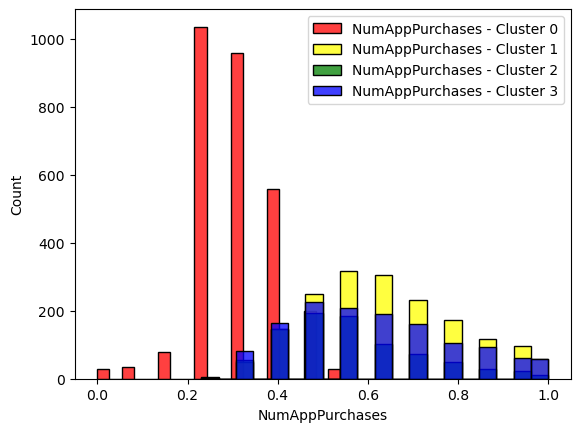

In [144]:
sns.histplot(cluster0['NumAppPurchases'],color='red',label='NumAppPurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumAppPurchases'],color='yellow',label='NumAppPurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumAppPurchases'],color='green',label='NumAppPurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumAppPurchases'],color='blue',label='NumAppPurchases - Cluster 3', bins = 20)
plt.legend()

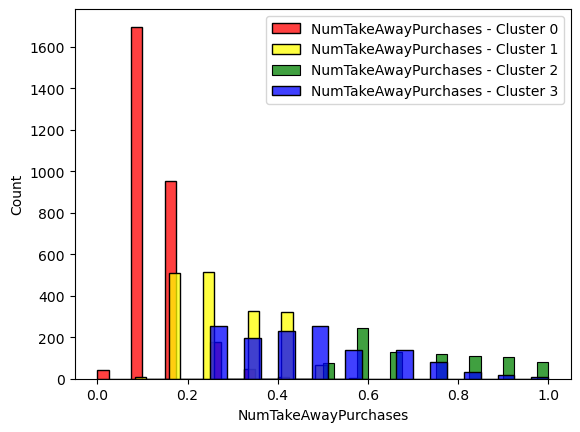

In [145]:
sns.histplot(cluster0['NumTakeAwayPurchases'],color='red',label='NumTakeAwayPurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumTakeAwayPurchases'],color='yellow',label='NumTakeAwayPurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumTakeAwayPurchases'],color='green',label='NumTakeAwayPurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumTakeAwayPurchases'],color='blue',label='NumTakeAwayPurchases - Cluster 3', bins = 20)
plt.legend()

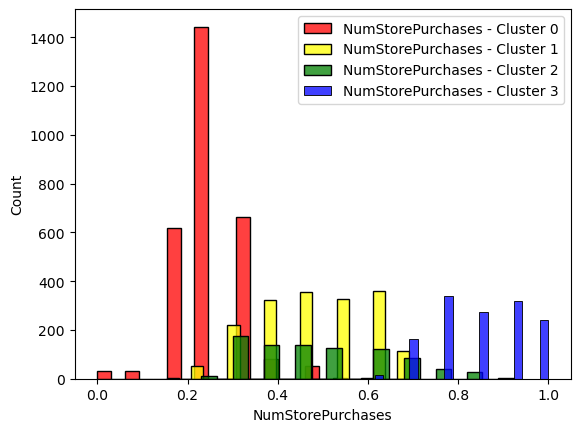

In [146]:
sns.histplot(cluster0['NumStorePurchases'],color='red',label='NumStorePurchases - Cluster 0', bins = 20)
sns.histplot(cluster1['NumStorePurchases'],color='yellow',label='NumStorePurchases - Cluster 1', bins = 20)
sns.histplot(cluster2['NumStorePurchases'],color='green',label='NumStorePurchases - Cluster 2', bins = 20)
sns.histplot(cluster3['NumStorePurchases'],color='blue',label='NumStorePurchases - Cluster 3', bins = 20)
plt.legend()

In [147]:
centroids = model_k4.cluster_centers_
centroids

array([[0.29798817, 0.12447293, 0.23671269],
       [0.62206975, 0.28135125, 0.48137397],
       [0.54006225, 0.72302505, 0.49693197],
       [0.59824631, 0.47119418, 0.85150601]])

In [148]:
sales_vc_minmax.columns

Index(['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases'], dtype='object')

In [149]:
centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_2_APP = centroids[2,0]
centroid_3_APP = centroids[3,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_2_STORE = centroids[2,1]
centroid_3_STORE = centroids[3,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]
centroid_2_TKAWAY = centroids[2,2]
centroid_3_TKAWAY = centroids[3,2]

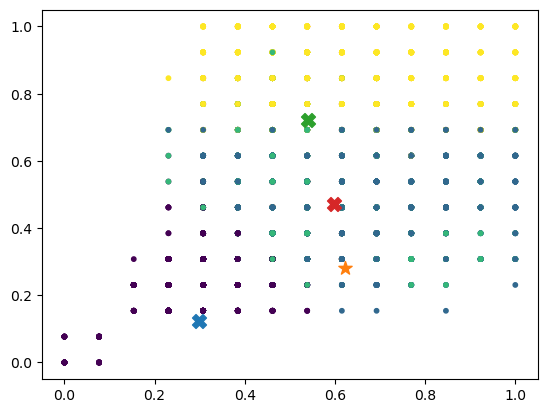

In [150]:
plt.scatter(sales_vc_k4.NumAppPurchases, sales_vc_k4.NumStorePurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_STORE, marker='X', s=100)#AZUL
plt.scatter(centroid_1_APP, centroid_1_STORE, marker='*', s=100)#LARANJA
plt.scatter(centroid_2_APP, centroid_2_STORE, marker='X', s=100)#VERDE
plt.scatter(centroid_3_APP, centroid_3_STORE, marker='X', s=100)#VERMELHO

plt.show()

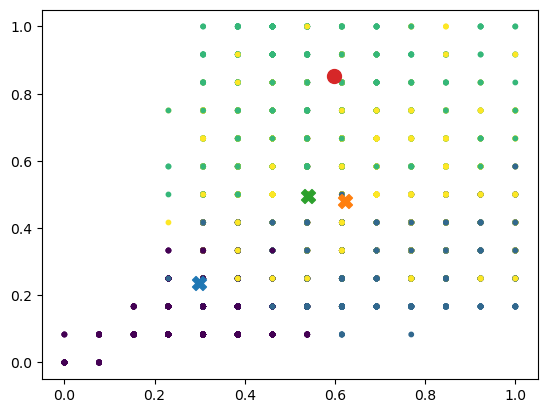

In [151]:
plt.scatter(sales_vc_k4.NumAppPurchases, sales_vc_k4.NumTakeAwayPurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)
plt.scatter(centroid_2_APP, centroid_2_TKAWAY, marker='X', s=100)
plt.scatter(centroid_3_APP, centroid_3_TKAWAY, marker='o', s=100)

plt.show()

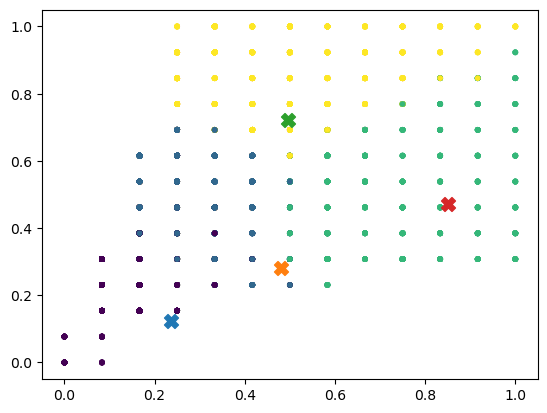

In [152]:
plt.scatter(sales_vc_k4.NumTakeAwayPurchases, sales_vc_k4.NumStorePurchases,
            c=sales_vc_k4.k_label, s=10)

plt.scatter(centroid_0_TKAWAY, centroid_0_STORE, marker='X', s=100)
plt.scatter(centroid_1_TKAWAY, centroid_1_STORE, marker='X', s=100)
plt.scatter(centroid_2_TKAWAY, centroid_2_STORE, marker='X', s=100)
plt.scatter(centroid_3_TKAWAY, centroid_3_STORE, marker='X', s=100)

plt.show()

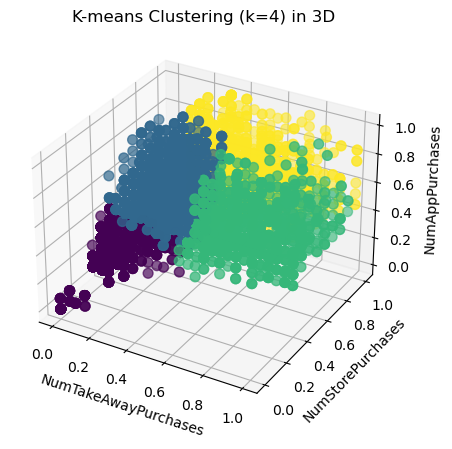

In [153]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5, 9))
ax = fig.add_subplot(111, projection='3d')

x = sales_vc_k4.NumTakeAwayPurchases
y = sales_vc_k4.NumStorePurchases
z = sales_vc_k4.NumAppPurchases
c = sales_vc_k4.k_label

ax.scatter(x, y, z, c=c, s=50)

ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.set_zlabel('NumAppPurchases')

plt.title("K-means Clustering (k=4) in 3D")
plt.show()


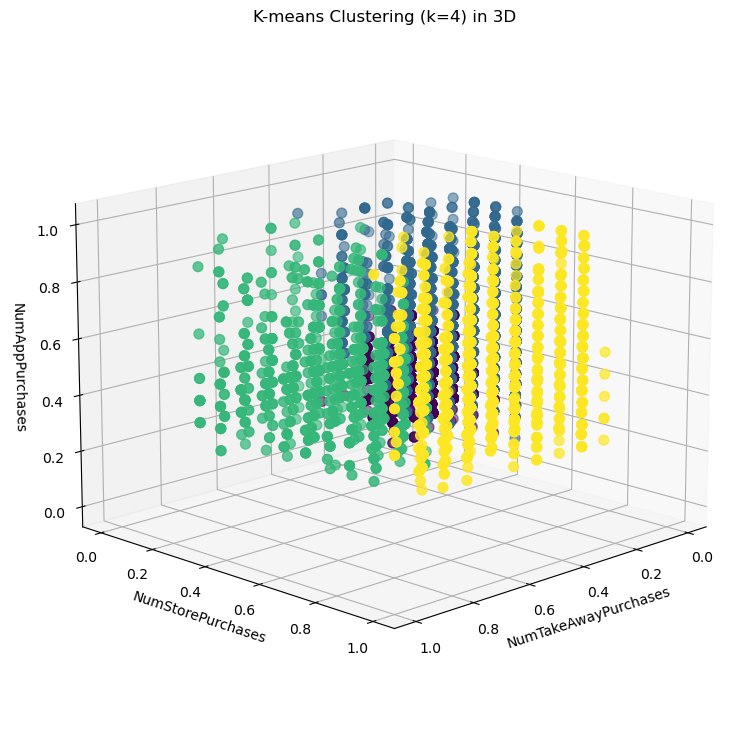

In [154]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = sales_vc_k4.NumTakeAwayPurchases
y = sales_vc_k4.NumStorePurchases
z = sales_vc_k4.NumAppPurchases
c = sales_vc_k4.k_label

ax.scatter(x, y, z, c=c, s=50)

ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.set_zlabel('NumAppPurchases')

# Change the angle
ax.view_init(elev=15, azim=45)

plt.title("K-means Clustering (k=4) in 3D")
plt.show()


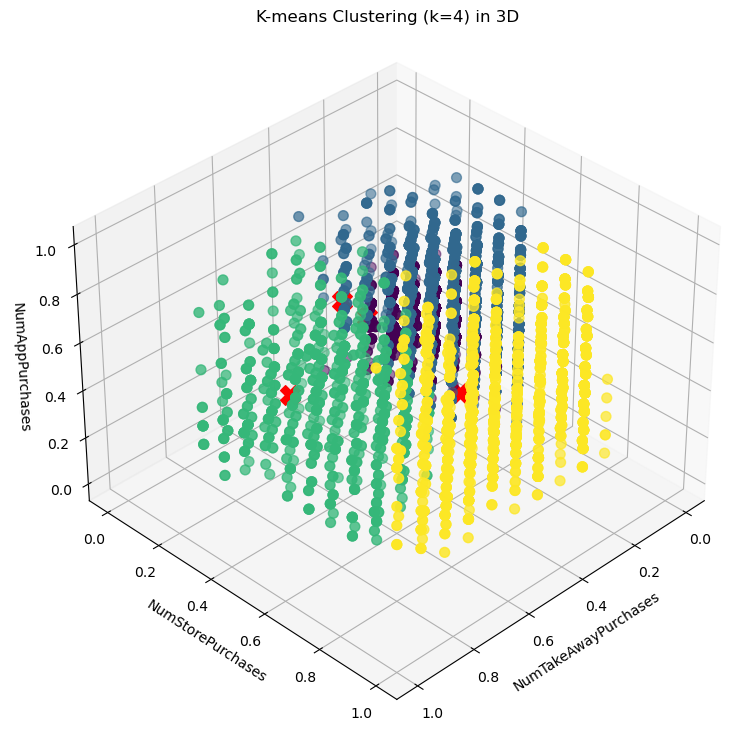

In [155]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = sales_vc_k4.NumTakeAwayPurchases
y = sales_vc_k4.NumStorePurchases
z = sales_vc_k4.NumAppPurchases
c = sales_vc_k4.k_label

ax.scatter(x, y, z, c=c, s=50)

# Add centroids
ax.scatter(centroid_0_TKAWAY, centroid_0_STORE, centroid_0_APP, marker='X', s=200, c='red')
ax.scatter(centroid_1_TKAWAY, centroid_1_STORE, centroid_1_APP, marker='X', s=200, c='red')
ax.scatter(centroid_2_TKAWAY, centroid_2_STORE, centroid_2_APP, marker='X', s=200, c='red')
ax.scatter(centroid_3_TKAWAY, centroid_3_STORE, centroid_3_APP, marker='X', s=200, c='red')

ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.set_zlabel('NumAppPurchases')

# Change the angle
ax.view_init(elev=35, azim=45) #change elevation to check the centroids a bit better

plt.title("K-means Clustering (k=4) in 3D")
plt.show()

In [156]:
#other solutions

<function matplotlib.pyplot.show(close=None, block=None)>

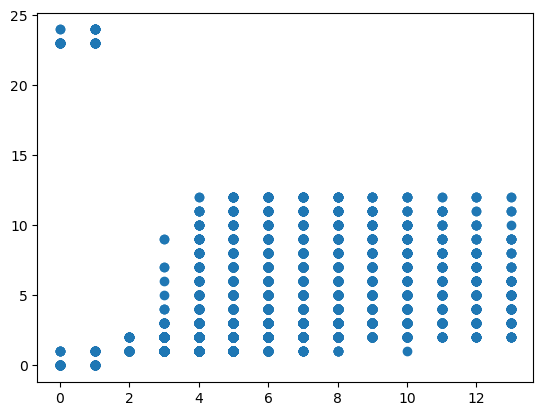

In [157]:
plt.scatter(sales["NumAppPurchases"], sales["NumTakeAwayPurchases"])
plt.show

In [158]:
centroids = model_k2.cluster_centers_
centroids

array([[0.60953252, 0.48080733, 0.64999429],
       [0.3358647 , 0.14191489, 0.26306601]])

In [159]:
centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]

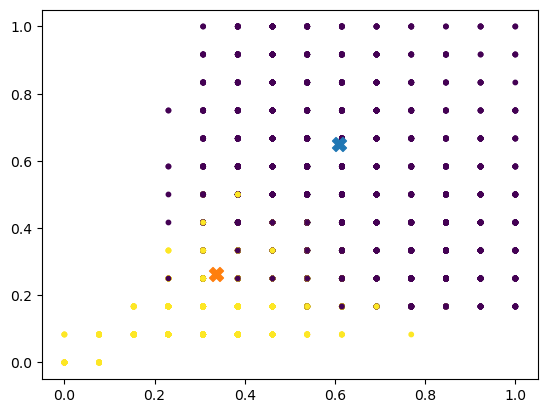

In [160]:
plt.scatter(sales_vc_k2.NumAppPurchases, sales_vc_k2.NumTakeAwayPurchases,
            c=sales_vc_k2.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)

plt.show()

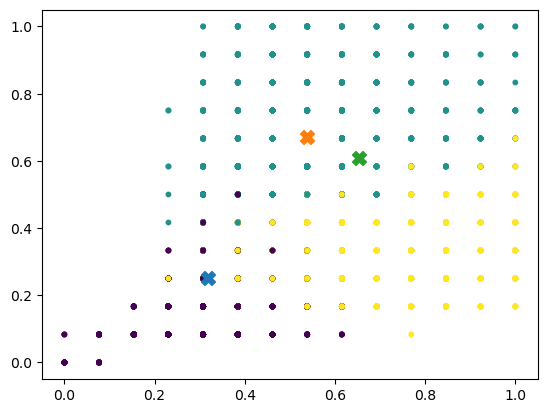

In [161]:
centroids = model_k3.cluster_centers_
centroids

centroid_0_APP = centroids[0,0]
centroid_1_APP = centroids[1,0]
centroid_2_APP = centroids[2,0]
centroid_0_STORE = centroids[0,1]
centroid_1_STORE = centroids[1,1]
centroid_2_STORE = centroids[2,1]
centroid_0_TKAWAY = centroids[0,2]
centroid_1_TKAWAY = centroids[1,2]
centroid_2_TKAWAY = centroids[2,2]



plt.scatter(sales_vc_k3.NumAppPurchases, sales_vc_k3.NumTakeAwayPurchases,
            c=sales_vc_k3.k_label, s=10)

plt.scatter(centroid_0_APP, centroid_0_TKAWAY, marker='X', s=100)
plt.scatter(centroid_1_APP, centroid_1_TKAWAY, marker='X', s=100)
plt.scatter(centroid_2_APP, centroid_2_TKAWAY, marker='X', s=100)

plt.show()

## 4.3. DBSCAN

Ran the code of this site: https://www.reneshbedre.com/blog/dbscan-python.html?utm_content=cmp-true

In [162]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 20).fit(sales_vc_minmax)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(sales_vc_minmax)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

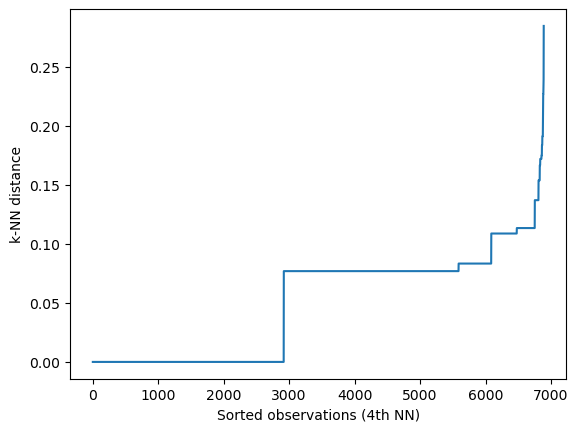

In [163]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 19]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()


- Identifying the exact knee point could be difficult visually. In the below plot, the knee point can occur at any point between 1 to 2 i.e. the points below knee point belong to a cluster, and points above the knee point are noise or outliers (noise points will have higher kNN distance). You should run DBSCAN based on different values of ε (between 1 and 2) to find the best ε that gives the best clustering.

- Additionally, to get an estimate of knee point, you can use the KneeLocator() function from the kneed package.

In [164]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [165]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

0.23950694477268478


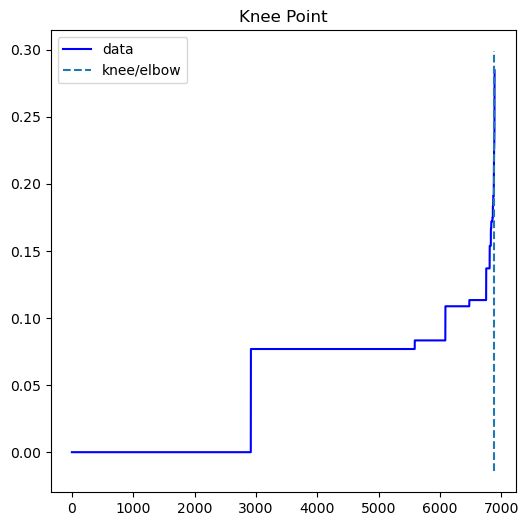

In [166]:
#distance plot
kneedle.plot_knee()
plt.show()

In [167]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 1.0714574598551223, min_samples = 2).fit(sales_vc_minmax)

In [168]:
# get cluster labels
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
# check unique clusters
set(clusters.labels_)

{0}

In [170]:
from collections import Counter
Counter(clusters.labels_)

Counter({0: 6890})

Visualization of DBSCAN clustering

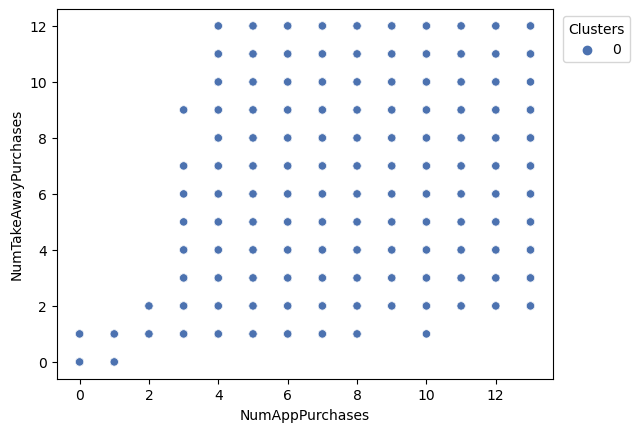

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = sales_vc, x = "NumAppPurchases", y = "NumTakeAwayPurchases", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

## 4.4. Fuzzy clustering/c-means (ineffective)

<div class="alert alert-block alert-info">
    
<a id='stats_num'></a>

### Fuzzy clustering/c-means
    
    #https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html
#(source) FPC method for finding whether a fuzzyness value, m, is optimal
    
</div>

In [172]:
!pip install scikit-fuzzy

In [173]:
#Find the level of fuzzinness m, for k=4, using Fuzzy Partition Coefficient, trying multiple values for error
#FPC is between 0 and 1, the closer it is to 0, the less the model is effective in partitioning our data

import numpy as np
import skfuzzy as fuzz

for error in np.arange(0.1, 3.1, 0.1):
    for m in np.arange(1, 5, 1):
        data=sales_vc_minmax.copy()
        # Perform fuzzy clustering with optimal number of clusters
        cntr, u, _, _, _, _, fpc = fuzz.cluster.cmeans(data.T, 4, m, error, maxiter=150, init=None)

        # Find the optimal fuzziness
        optimal_fuzziness = np.argmax(fpc)
        print("Optimal fuzziness:", optimal_fuzziness)

Optimal fuzziness: 0
Optimal fuzziness: 0


C:\Users\J Loureiro\anaconda3\lib\site-packages\skfuzzy\cluster\_cmeans.py:33: RuntimeWarning: divide by zero encountered in true_divide
  u = normalize_power_columns(d, - 2. / (m - 1))


Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzziness: 0
Optimal fuzzi

In [174]:
#from the values we got on the FPC, it's clear that fuzzy clustering is not at all appropriate to analyze our data set

In [175]:
import numpy as np
import skfuzzy as fuzz

fuzzy=sales_vc_minmax.copy()

# Set the number of clusters
k = 4

# Set the fuzziness parameter
m = 2

# Initialize the cluster centers
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(fuzzy.T, k, m, error=0.005, maxiter=1000, init=None)

# Get the cluster labels for each data point
labels = np.argmax(u, axis=0)

# Print the cluster centers and labels
print("Cluster centers:")
print(centers)
print("Cluster labels:")
print(labels)

Cluster centers:
[[0.60034297 0.43463565 0.81274909]
 [0.29239335 0.11998417 0.23453789]
 [0.54916233 0.66845177 0.57979258]
 [0.6100546  0.28241562 0.46462343]]
Cluster labels:
[0 2 3 ... 0 1 1]


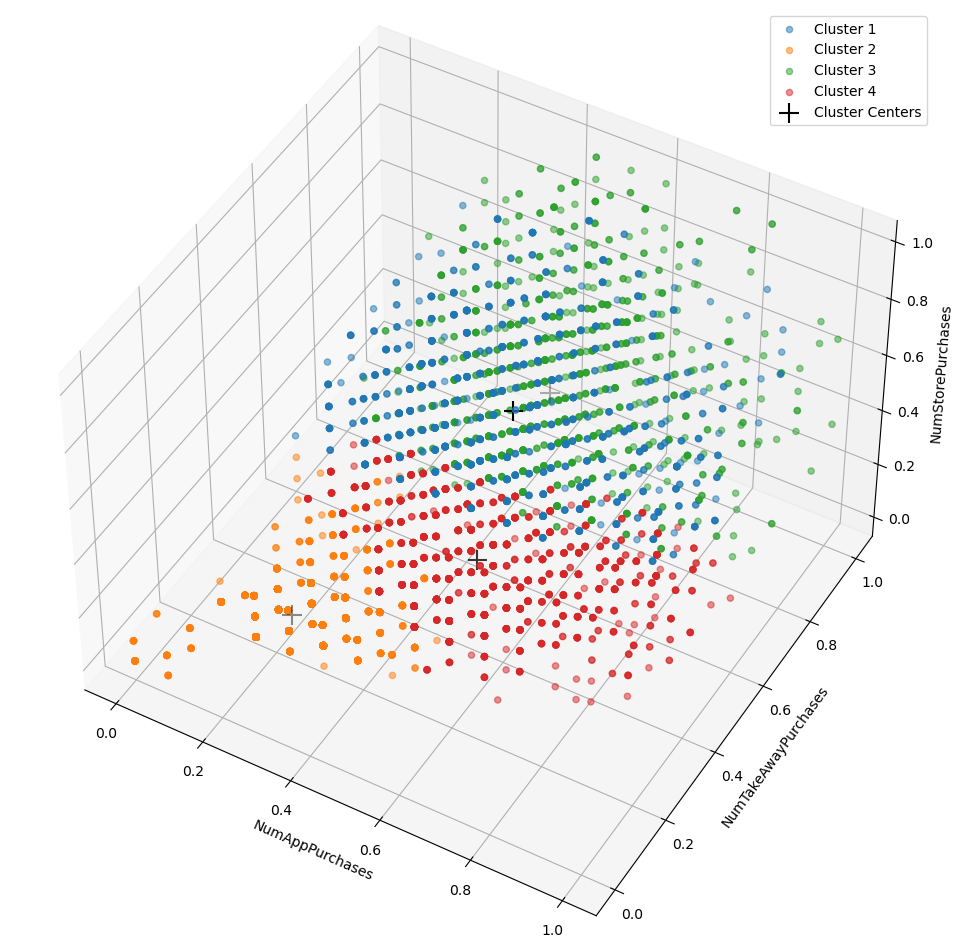

In [176]:
#Further testing---- vizualization of innefectiveness for m (fuzzynness)=2

# Create a 3D plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 1], sales_vc_minmax.iloc[labels==i, 2], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,1], centers[:,2], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumTakeAwayPurchases')
ax.set_zlabel('NumStorePurchases')
ax.legend()

# Set the viewing angle
ax.view_init(elev=45, azim=-60)

# Show the plot
plt.show()


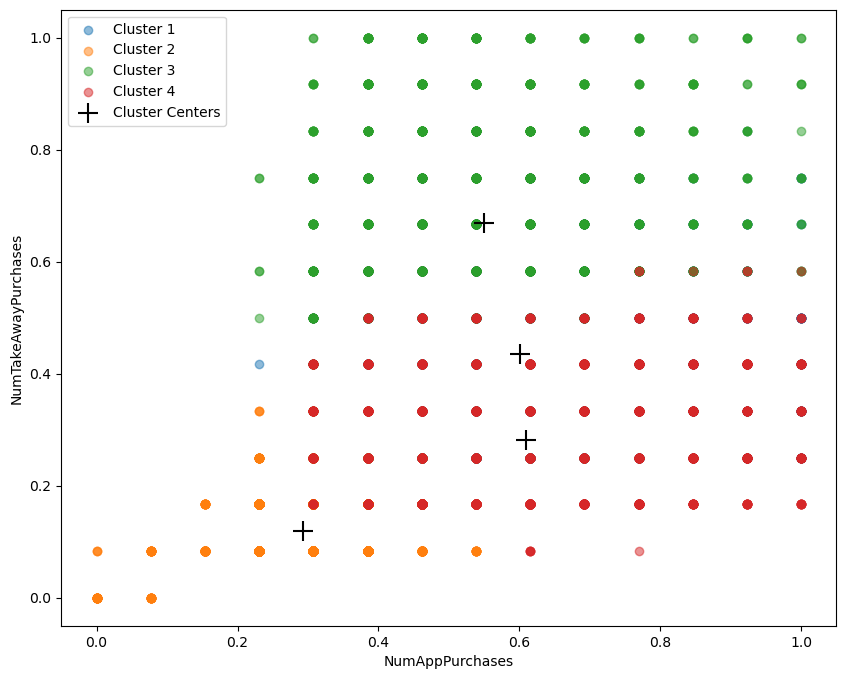

In [177]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 1], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,1], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumTakeAwayPurchases')
ax.legend()

# Show the plot
plt.show()


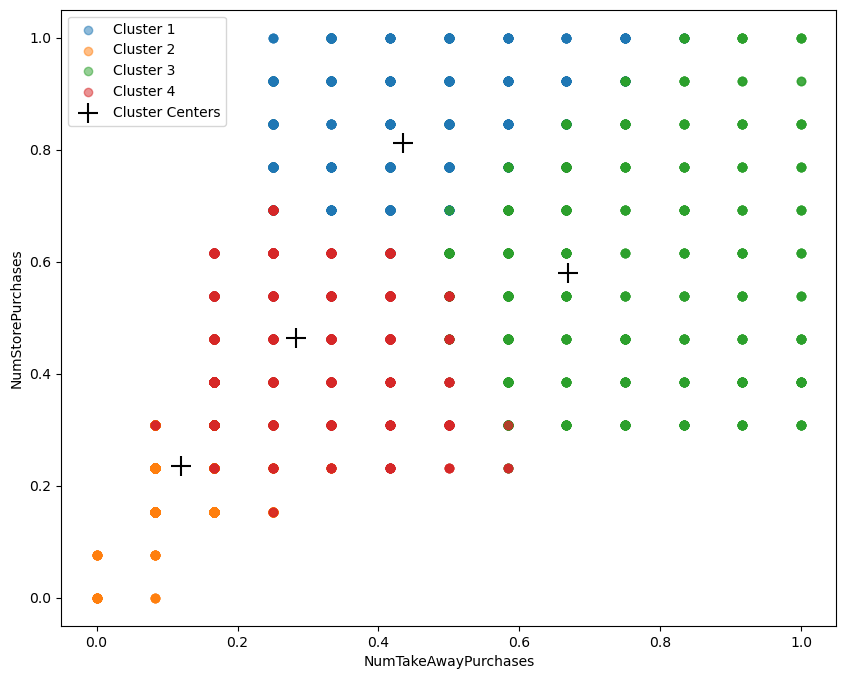

In [178]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 1], sales_vc_minmax.iloc[labels==i, 2], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,1], centers[:,2], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumTakeAwayPurchases')
ax.set_ylabel('NumStorePurchases')
ax.legend()

# Show the plot
plt.show()

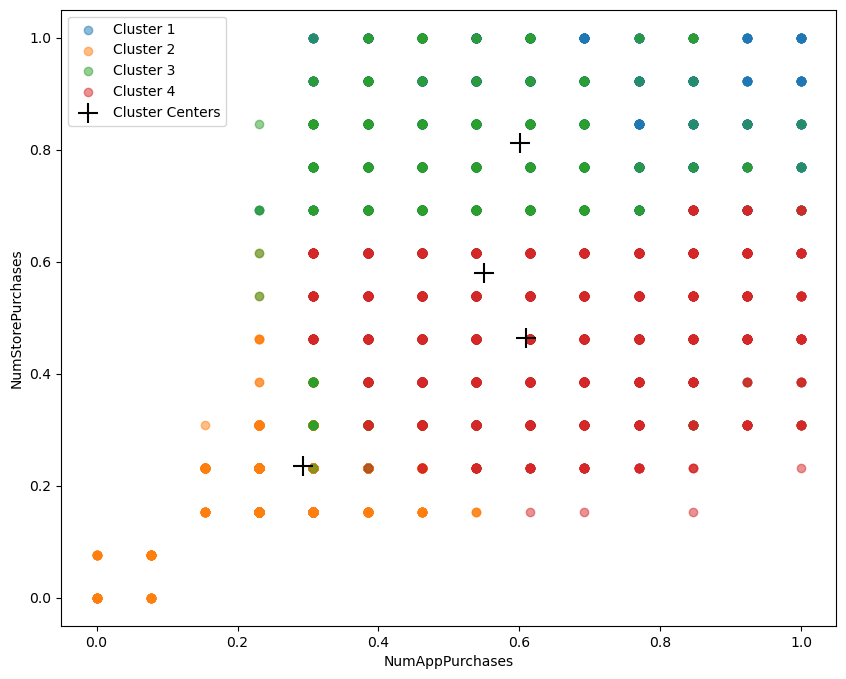

In [179]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 2], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,2], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumStorePurchases')
ax.legend()

# Show the plot
plt.show()

In [180]:
#and for m=4...

In [181]:
import numpy as np
import skfuzzy as fuzz

fuzzy=sales_vc_minmax.copy()

# Set the number of clusters
k = 4

# Set the fuzziness parameter
m = 4

# Initialize the cluster centers
centers, u, _, _, _, _, _ = fuzz.cluster.cmeans(fuzzy.T, k, m, error=0.005, maxiter=1000, init=None)

# Get the cluster labels for each data point
labels = np.argmax(u, axis=0)

# Print the cluster centers and labels
print("Cluster centers:")
print(centers)
print("Cluster labels:")
print(labels)

Cluster centers:
[[0.53440264 0.30038961 0.4494311 ]
 [0.58730309 0.44673771 0.62398734]
 [0.58200856 0.49931391 0.69079766]
 [0.28484161 0.10873584 0.23257054]]
Cluster labels:
[2 2 0 ... 2 3 3]


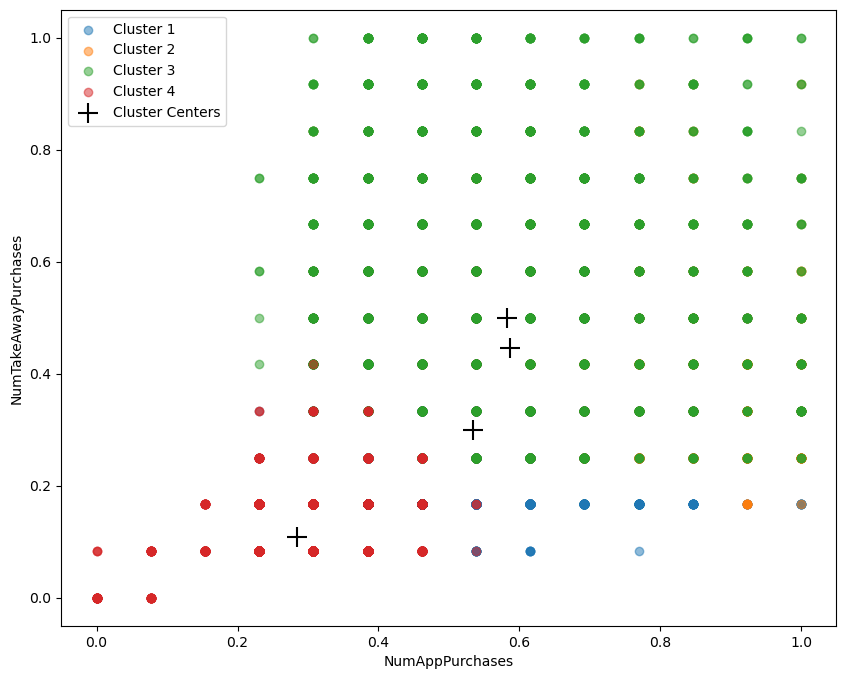

In [182]:
# Create a 2D plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points colored by cluster label
for i in range(k):
    ax.scatter(sales_vc_minmax.iloc[labels==i, 0], sales_vc_minmax.iloc[labels==i, 1], alpha=0.5, label="Cluster "+str(i+1))

# Plot the cluster centers
ax.scatter(centers[:,0], centers[:,1], color='black', marker='+', s=200, label="Cluster Centers")

# Add legend and axis labels
ax.set_xlabel('NumAppPurchases')
ax.set_ylabel('NumTakeAwayPurchases')
ax.legend()

# Show the plot
plt.show()

In [183]:
#fuzzy clustering doesn't seem appropriate...

Our most appropriate and effective solution was through k-means with a k=4. Hence, let's define our clusters:

In [184]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

In [192]:
sales_vc_k4.groupby(['k_label']).describe().transpose()

k_label                               0            1           2            3
NumAppPurchases      count  2925.000000  1749.000000  865.000000  1351.000000
                     mean      0.297988     0.622070    0.540062     0.598246
                     std       0.086582     0.169155    0.155256     0.183949
                     min       0.000000     0.230769    0.230769     0.230769
                     25%       0.230769     0.461538    0.461538     0.461538
                     50%       0.307692     0.615385    0.538462     0.538462
                     75%       0.384615     0.769231    0.615385     0.692308
                     max       0.538462     1.000000    1.000000     1.000000
NumTakeAwayPurchases count  2925.000000  1749.000000  865.000000  1351.000000
                     mean      0.124473     0.281351    0.723025     0.471194
                     std       0.061163     0.100344    0.154540     0.173495
                     min       0.000000     0.083333    0.500000     0.250000
                     25%       0.083333     0.166667    0.583333     0.333333
                     50%       0.083333     0.250000    0.666667     0.416667
                     75%       0.166667     0.333333    0.833333     0.583333
                     max       0.500000     0.583333    1.000000     1.000000
NumStorePurchases    count  2925.000000  1749.000000  865.000000  1351.000000
                     mean      0.236713     0.481374    0.496932     0.851506
                     std       0.072180     0.121608    0.154974     0.102681
                     min       0.000000     0.153846    0.230769     0.615385
                     25%       0.230769     0.384615    0.384615     0.769231
                     50%       0.230769     0.461538    0.461538     0.846154
                     75%       0.307692     0.615385    0.615385     0.923077
                     max       0.615385     0.692308    0.923077     1.000000

## 4.5. Cluster analysis & caracterization

In [185]:
cluster0 = sales_vc_k4[sales_vc_k4.k_label==0]
cluster1 = sales_vc_k4[sales_vc_k4.k_label==1]
cluster2 = sales_vc_k4[sales_vc_k4.k_label==2]
cluster3 = sales_vc_k4[sales_vc_k4.k_label==3]

In [205]:
cluster0.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label
count      2925.000000           2925.000000        2925.000000   2925.0
mean          0.297988              0.124473           0.236713      0.0
std           0.086582              0.061163           0.072180      0.0
min           0.000000              0.000000           0.000000      0.0
25%           0.230769              0.083333           0.230769      0.0
50%           0.307692              0.083333           0.230769      0.0
75%           0.384615              0.166667           0.307692      0.0
max           0.538462              0.500000           0.615385      0.0

In [206]:
cluster1.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label
count      1749.000000           1749.000000        1749.000000   1749.0
mean          0.622070              0.281351           0.481374      1.0
std           0.169155              0.100344           0.121608      0.0
min           0.230769              0.083333           0.153846      1.0
25%           0.461538              0.166667           0.384615      1.0
50%           0.615385              0.250000           0.461538      1.0
75%           0.769231              0.333333           0.615385      1.0
max           1.000000              0.583333           0.692308      1.0

In [207]:
cluster2.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label
count       865.000000            865.000000         865.000000    865.0
mean          0.540062              0.723025           0.496932      2.0
std           0.155256              0.154540           0.154974      0.0
min           0.230769              0.500000           0.230769      2.0
25%           0.461538              0.583333           0.384615      2.0
50%           0.538462              0.666667           0.461538      2.0
75%           0.615385              0.833333           0.615385      2.0
max           1.000000              1.000000           0.923077      2.0

In [208]:
cluster3.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label
count      1351.000000           1351.000000        1351.000000   1351.0
mean          0.598246              0.471194           0.851506      3.0
std           0.183949              0.173495           0.102681      0.0
min           0.230769              0.250000           0.615385      3.0
25%           0.461538              0.333333           0.769231      3.0
50%           0.538462              0.416667           0.846154      3.0
75%           0.692308              0.583333           0.923077      3.0
max           1.000000              1.000000           1.000000      3.0

-Cluster0: largest group; on average buys less from app, takeaway and store but especially less via takeaway

-Cluster1: less takeaway purchases, more restaurant purchases. App purchases are the highest among the categories and more than double than takeaway purchases

-Cluster2: smallest group; more takeaway purchases, slightly more app purchases than restaurant ones

-Cluster3: less takeaway purchases; around 10% more than takeway average app purchases; on average, the group that goes more to the restaurant 

## 4.6. Demographic & Marketing insights

<h2>4.6.1. Demographics<h2>

In [221]:
conclusions0 = pd.concat([cluster0.reset_index(drop=True), df.reset_index(drop=True)], axis=1, join='inner')
conclusions1 = pd.concat([cluster1.reset_index(drop=True), df.reset_index(drop=True)], axis=1, join='inner')
conclusions2 = pd.concat([cluster2.reset_index(drop=True), df.reset_index(drop=True)], axis=1, join='inner')
conclusions3 = pd.concat([cluster3.reset_index(drop=True), df.reset_index(drop=True)], axis=1, join='inner')

<h2> Demographics: Cluster 0<h2>

In [222]:
conclusions0.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count      2925.000000           2925.000000        2925.000000   2925.0   
mean          0.297988              0.124473           0.236713      0.0   
std           0.086582              0.061163           0.072180      0.0   
min           0.000000              0.000000           0.000000      0.0   
25%           0.230769              0.083333           0.230769      0.0   
50%           0.307692              0.083333           0.230769      0.0   
75%           0.384615              0.166667           0.307692      0.0   
max           0.538462              0.500000           0.615385      0.0   

           Recency  MntMeat&Fish   MntEntries  MntVegan&Vegetarian  \
count  2925.000000   2925.000000  2925.000000          2925.000000   
mean     50.100171   3140.297333   545.396239          2616.857265   
std      28.678567   3396.857663   802.328128          3368.907290   
min       0.000000      0.000000     0.000000             0.000000   
25%      26.000000    280.000000    40.000000           255.000000   
50%      50.000000   1870.000000   180.000000          1080.000000   
75%      75.000000   5110.000000   680.000000          3585.000000   
max      99.000000  14980.000000  3980.000000         14760.000000   

         MntDrinks  MntDesserts  ...         Income  Kid_Younger6  \
count  2925.000000  2925.000000  ...    2925.000000   2925.000000   
mean    565.508376   539.958291  ...   76621.429949      0.448547   
std     826.486967   797.434211  ...   30855.070484      0.539641   
min       0.000000     0.000000  ...    3005.400000      0.000000   
25%      40.000000    40.000000  ...   51718.000000      0.000000   
50%     180.000000   180.000000  ...   77195.000000      0.000000   
75%     700.000000   680.000000  ...  101164.000000      1.000000   
max    3980.000000  3980.000000  ...  153703.000000      2.000000   

       Children_6to18       Gender          Age  Response_Cmp1  Response_Cmp2  \
count     2925.000000  2925.000000  2925.000000    2925.000000    2925.000000   
mean         0.497778     0.260513    46.617094       0.081026       0.072821   
std          0.545230     0.438989    11.957734       0.272921       0.259886   
min          0.000000     0.000000    18.000000       0.000000       0.000000   
25%          0.000000     0.000000    38.000000       0.000000       0.000000   
50%          0.000000     0.000000    46.000000       0.000000       0.000000   
75%          1.000000     1.000000    56.000000       0.000000       0.000000   
max          2.000000     1.000000    75.000000       1.000000       1.000000   

       Response_Cmp3  Response_Cmp4  Response_Cmp5  
count    2925.000000    2925.000000    2925.000000  
mean        0.083077       0.068376       0.017436  
std         0.276046       0.252433       0.130911  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 27 columns]

In [230]:
conclusions0.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Education            
BASIC        2.632479
GRADUATION  49.846154
HIGHSCHOOL   9.128205
MASTER      16.307692
PHD         22.085470

In [231]:
conclusions0.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Marital_Status           
DIVORCED         8.649573
MARRIED         64.239316
SINGLE          22.905983
WIDOW            4.205128

In [232]:
conclusions0.groupby('Gender')['Gender'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Gender           
0       73.948718
1       26.051282

In [234]:
conclusions0.groupby('age_group')['age_group'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
age_group           
<15         0.000000
15-25       2.803419
25-35      16.068376
35-45      30.598291
45-65      44.547009
65+         5.982906

<h2>Demographics: Cluster 1<h2>

In [235]:
conclusions1.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count      1749.000000           1749.000000        1749.000000   1749.0   
mean          0.622070              0.281351           0.481374      1.0   
std           0.169155              0.100344           0.121608      0.0   
min           0.230769              0.083333           0.153846      1.0   
25%           0.461538              0.166667           0.384615      1.0   
50%           0.615385              0.250000           0.461538      1.0   
75%           0.769231              0.333333           0.615385      1.0   
max           1.000000              0.583333           0.692308      1.0   

           Recency  MntMeat&Fish   MntEntries  MntVegan&Vegetarian  \
count  1749.000000   1749.000000  1749.000000          1749.000000   
mean     49.861635   3170.406518   538.555746          2621.983133   
std      28.324316   3405.940521   805.719885          3408.263882   
min       0.000000      0.000000     0.000000             0.000000   
25%      26.000000    280.000000    40.000000           255.000000   
50%      50.000000   1900.000000   180.000000          1050.000000   
75%      74.000000   5230.000000   680.000000          3570.000000   
max      99.000000  14920.000000  3960.000000         14760.000000   

         MntDrinks  MntDesserts  ...         Income  Kid_Younger6  \
count  1749.000000  1749.000000  ...    1749.000000   1749.000000   
mean    569.890223   549.205260  ...   76847.362493      0.431675   
std     847.732124   816.535911  ...   31346.817381      0.536476   
min       0.000000     0.000000  ...    3005.400000      0.000000   
25%      40.000000    40.000000  ...   51626.000000      0.000000   
50%     180.000000   180.000000  ...   77858.000000      0.000000   
75%     700.000000   700.000000  ...  101752.000000      1.000000   
max    3980.000000  3940.000000  ...  151072.000000      2.000000   

       Children_6to18       Gender          Age  Response_Cmp1  Response_Cmp2  \
count     1749.000000  1749.000000  1749.000000    1749.000000    1749.000000   
mean         0.493997     0.260149    46.753573       0.078330       0.077187   
std          0.541835     0.438841    11.967270       0.268768       0.266964   
min          0.000000     0.000000    18.000000       0.000000       0.000000   
25%          0.000000     0.000000    38.000000       0.000000       0.000000   
50%          0.000000     0.000000    46.000000       0.000000       0.000000   
75%          1.000000     1.000000    57.000000       0.000000       0.000000   
max          2.000000     1.000000    74.000000       1.000000       1.000000   

       Response_Cmp3  Response_Cmp4  Response_Cmp5  
count    1749.000000    1749.000000    1749.000000  
mean        0.084048       0.070898       0.018296  
std         0.277539       0.256727       0.134059  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 27 columns]

In [237]:
conclusions1.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Education            
BASIC        2.515723
GRADUATION  48.713551
HIGHSCHOOL   9.662664
MASTER      16.466552
PHD         22.641509

In [239]:
conclusions1.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Marital_Status           
DIVORCED         9.033734
MARRIED         63.236135
SINGLE          22.927387
WIDOW            4.802744

In [240]:
conclusions1.groupby('Gender')['Gender'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Gender           
0       73.985134
1       26.014866

In [238]:
conclusions1.groupby('age_group')['age_group'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
age_group           
<15         0.000000
15-25       2.801601
25-35      16.237850
35-45      29.559748
45-65      45.626072
65+         5.774728

<h2>Demographics: Cluster 2<h2>

In [242]:
conclusions2.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count       865.000000            865.000000         865.000000    865.0   
mean          0.540062              0.723025           0.496932      2.0   
std           0.155256              0.154540           0.154974      0.0   
min           0.230769              0.500000           0.230769      2.0   
25%           0.461538              0.583333           0.384615      2.0   
50%           0.538462              0.666667           0.461538      2.0   
75%           0.615385              0.833333           0.615385      2.0   
max           1.000000              1.000000           0.923077      2.0   

          Recency  MntMeat&Fish   MntEntries  MntVegan&Vegetarian  \
count  865.000000    865.000000   865.000000           865.000000   
mean    49.010405   3015.825434   549.204624          2566.652023   
std     27.875610   3266.549754   848.051747          3414.014617   
min      0.000000      0.000000     0.000000             0.000000   
25%     26.000000    280.000000    40.000000           255.000000   
50%     48.000000   1810.000000   160.000000           990.000000   
75%     71.000000   4880.000000   680.000000          3450.000000   
max     99.000000  14920.000000  3960.000000         14745.000000   

         MntDrinks  MntDesserts  ...         Income  Kid_Younger6  \
count   865.000000   865.000000  ...     865.000000    865.000000   
mean    547.054335   535.130636  ...   76129.308324      0.449711   
std     830.169114   815.731183  ...   31376.265048      0.535826   
min       0.000000     0.000000  ...    3005.400000      0.000000   
25%      40.000000    40.000000  ...   51796.000000      0.000000   
50%     180.000000   180.000000  ...   76596.000000      0.000000   
75%     680.000000   648.000000  ...  100393.000000      1.000000   
max    3980.000000  3940.000000  ...  149137.000000      2.000000   

       Children_6to18      Gender         Age  Response_Cmp1  Response_Cmp2  \
count      865.000000  865.000000  865.000000     865.000000     865.000000   
mean         0.507514    0.235838   46.583815       0.077457       0.071676   
std          0.550884    0.424767   11.836960       0.267469       0.258100   
min          0.000000    0.000000   18.000000       0.000000       0.000000   
25%          0.000000    0.000000   38.000000       0.000000       0.000000   
50%          0.000000    0.000000   46.000000       0.000000       0.000000   
75%          1.000000    0.000000   56.000000       0.000000       0.000000   
max          2.000000    1.000000   74.000000       1.000000       1.000000   

       Response_Cmp3  Response_Cmp4  Response_Cmp5  
count     865.000000     865.000000     865.000000  
mean        0.073988       0.064740       0.018497  
std         0.261904       0.246209       0.134818  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 27 columns]

In [244]:
conclusions2.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Education            
BASIC        2.658960
GRADUATION  49.132948
HIGHSCHOOL   9.132948
MASTER      15.722543
PHD         23.352601

In [245]:
conclusions2.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Marital_Status           
DIVORCED         9.479769
MARRIED         63.583815
SINGLE          22.543353
WIDOW            4.393064

In [246]:
conclusions2.groupby('Gender')['Gender'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Gender           
0       76.416185
1       23.583815

In [247]:
conclusions2.groupby('age_group')['age_group'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
age_group           
<15         0.000000
15-25       3.005780
25-35      15.722543
35-45      29.132948
45-65      46.936416
65+         5.202312

<h2>Demographics: Cluster 3<h2>

In [248]:
conclusions3.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count      1351.000000           1351.000000        1351.000000   1351.0   
mean          0.598246              0.471194           0.851506      3.0   
std           0.183949              0.173495           0.102681      0.0   
min           0.230769              0.250000           0.615385      3.0   
25%           0.461538              0.333333           0.769231      3.0   
50%           0.538462              0.416667           0.846154      3.0   
75%           0.692308              0.583333           0.923077      3.0   
max           1.000000              1.000000           1.000000      3.0   

           Recency  MntMeat&Fish   MntEntries  MntVegan&Vegetarian  \
count  1351.000000   1351.000000  1351.000000          1351.000000   
mean     50.384160   3109.977054   536.793486          2639.758327   
std      28.173794   3350.464051   810.316118          3459.608484   
min       0.000000      0.000000     0.000000             0.000000   
25%      27.000000    275.000000    40.000000           247.500000   
50%      50.000000   1870.000000   180.000000          1005.000000   
75%      74.000000   5110.000000   680.000000          3555.000000   
max      99.000000  14920.000000  3960.000000         14745.000000   

         MntDrinks  MntDesserts  ...         Income  Kid_Younger6  \
count  1351.000000  1351.000000  ...    1351.000000   1351.000000   
mean    568.306440   559.138416  ...   76661.964249      0.432272   
std     857.429539   832.187143  ...   31483.298866      0.531631   
min       0.000000     0.000000  ...    3005.400000      0.000000   
25%      40.000000    40.000000  ...   51626.000000      0.000000   
50%     180.000000   180.000000  ...   77425.000000      0.000000   
75%     680.000000   700.000000  ...  101730.000000      1.000000   
max    3980.000000  3940.000000  ...  149555.000000      2.000000   

       Children_6to18       Gender          Age  Response_Cmp1  Response_Cmp2  \
count     1351.000000  1351.000000  1351.000000    1351.000000    1351.000000   
mean         0.493708     0.259067    46.690600       0.079201       0.073279   
std          0.545484     0.438285    11.942724       0.270152       0.260690   
min          0.000000     0.000000    18.000000       0.000000       0.000000   
25%          0.000000     0.000000    38.000000       0.000000       0.000000   
50%          0.000000     0.000000    46.000000       0.000000       0.000000   
75%          1.000000     1.000000    57.000000       0.000000       0.000000   
max          2.000000     1.000000    74.000000       1.000000       1.000000   

       Response_Cmp3  Response_Cmp4  Response_Cmp5  
count    1351.000000    1351.000000    1351.000000  
mean        0.080681       0.068838       0.017024  
std         0.272445       0.253272       0.129410  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000  

[8 rows x 27 columns]

In [249]:
conclusions3.groupby('Education')['Education'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Education            
BASIC        2.664693
GRADUATION  48.186528
HIGHSCHOOL   9.474463
MASTER      16.358253
PHD         23.316062

In [250]:
conclusions3.groupby('Marital_Status')['Marital_Status'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Marital_Status           
DIVORCED         9.400444
MARRIED         62.546262
SINGLE          23.464101
WIDOW            4.589193

In [254]:
conclusions3.groupby('Gender')['Gender'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
Gender           
0       74.093264
1       25.906736

In [255]:
conclusions3.groupby('age_group')['age_group'].agg(['count']).apply(lambda x: x/x.sum()*100, axis=0)

count
age_group           
<15         0.000000
15-25       2.812731
25-35      15.988157
35-45      29.977794
45-65      45.669874
65+         5.551443

-All groups have similar demographics

-The group with the least ammount of average takeaway purchases is the group where there's slightly more married people

<h2>4.6.2. Marketing<h2>

In [257]:
conc_mkt0 = pd.concat([cluster0.reset_index(drop=True), mkt.reset_index(drop=True)], axis=1, join='inner')
conc_mkt1 = pd.concat([cluster1.reset_index(drop=True), mkt.reset_index(drop=True)], axis=1, join='inner')
conc_mkt2 = pd.concat([cluster2.reset_index(drop=True), mkt.reset_index(drop=True)], axis=1, join='inner')
conc_mkt3 = pd.concat([cluster3.reset_index(drop=True), mkt.reset_index(drop=True)], axis=1, join='inner')

In [262]:
conc_mkt0.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count      2925.000000           2925.000000        2925.000000   2925.0   
mean          0.297988              0.124473           0.236713      0.0   
std           0.086582              0.061163           0.072180      0.0   
min           0.000000              0.000000           0.000000      0.0   
25%           0.230769              0.083333           0.230769      0.0   
50%           0.307692              0.083333           0.230769      0.0   
75%           0.384615              0.166667           0.307692      0.0   
max           0.538462              0.500000           0.615385      0.0   

         CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count   2925.000000    2925.000000    2925.000000    2925.000000   
mean   20104.344615       0.080684       0.075897       0.078291   
std     8831.645218       0.272395       0.264879       0.268674   
min     5078.000000       0.000000       0.000000       0.000000   
25%    12251.000000       0.000000       0.000000       0.000000   
50%    20288.000000       0.000000       0.000000       0.000000   
75%    27740.000000       0.000000       0.000000       0.000000   
max    35072.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count    2925.000000    2925.000000  
mean        0.063248       0.012991  
std         0.243450       0.113257  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [263]:
conc_mkt1.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count      1749.000000           1749.000000        1749.000000   1749.0   
mean          0.622070              0.281351           0.481374      1.0   
std           0.169155              0.100344           0.121608      0.0   
min           0.230769              0.083333           0.153846      1.0   
25%           0.461538              0.166667           0.384615      1.0   
50%           0.615385              0.250000           0.461538      1.0   
75%           0.769231              0.333333           0.615385      1.0   
max           1.000000              0.583333           0.692308      1.0   

         CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count   1749.000000    1749.000000    1749.000000    1749.000000   
mean   20104.986278       0.084048       0.073185       0.080046   
std     8896.981105       0.277539       0.260514       0.271442   
min     5078.000000       0.000000       0.000000       0.000000   
25%    12119.000000       0.000000       0.000000       0.000000   
50%    20600.000000       0.000000       0.000000       0.000000   
75%    27728.000000       0.000000       0.000000       0.000000   
max    35066.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count    1749.000000    1749.000000  
mean        0.067467       0.012007  
std         0.250901       0.108947  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [264]:
conc_mkt2.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count       865.000000            865.000000         865.000000    865.0   
mean          0.540062              0.723025           0.496932      2.0   
std           0.155256              0.154540           0.154974      0.0   
min           0.230769              0.500000           0.230769      2.0   
25%           0.461538              0.583333           0.384615      2.0   
50%           0.538462              0.666667           0.461538      2.0   
75%           0.615385              0.833333           0.615385      2.0   
max           1.000000              1.000000           0.923077      2.0   

         CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count    865.000000     865.000000     865.000000     865.000000   
mean   19972.406936       0.083237       0.067052       0.082081   
std     8900.269645       0.276400       0.250257       0.274647   
min     5117.000000       0.000000       0.000000       0.000000   
25%    12092.000000       0.000000       0.000000       0.000000   
50%    20651.000000       0.000000       0.000000       0.000000   
75%    27539.000000       0.000000       0.000000       0.000000   
max    35021.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count     865.000000     865.000000  
mean        0.068208       0.016185  
std         0.252249       0.126259  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [265]:
conc_mkt3.describe()

NumAppPurchases  NumTakeAwayPurchases  NumStorePurchases  k_label  \
count      1351.000000           1351.000000        1351.000000   1351.0   
mean          0.598246              0.471194           0.851506      3.0   
std           0.183949              0.173495           0.102681      0.0   
min           0.230769              0.250000           0.615385      3.0   
25%           0.461538              0.333333           0.769231      3.0   
50%           0.538462              0.416667           0.846154      3.0   
75%           0.692308              0.583333           0.923077      3.0   
max           1.000000              1.000000           1.000000      3.0   

         CustomerID  Response_Cmp1  Response_Cmp2  Response_Cmp3  \
count   1351.000000    1351.000000    1351.000000    1351.000000   
mean   20120.899334       0.084382       0.074759       0.078460   
std     8859.652748       0.278063       0.263100       0.268994   
min     5078.000000       0.000000       0.000000       0.000000   
25%    12165.500000       0.000000       0.000000       0.000000   
50%    20777.000000       0.000000       0.000000       0.000000   
75%    27560.000000       0.000000       0.000000       0.000000   
max    35039.000000       1.000000       1.000000       1.000000   

       Response_Cmp4  Response_Cmp5  
count    1351.000000    1351.000000  
mean        0.065137       0.013323  
std         0.246859       0.114698  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

-Campaign 1 was the most successful but least successful on cluster 0;

-Campaign 2 was least successful on cluster 2 and most successful on cluster 3;

-Campaign 3 was the most successful on cluster 2;

-Campaign 3 was least successful on cluster 0 but only by a 2% margin;

-Campaign 4 was least successful on cluster 0;

-Campaign 5 was the least successful of all campaigns. It was least successful on cluster 1 (by a minimal margin);

# 5. 3rd Perspective - Consumer value

EXPLICAÇÃO DA PERSPECTIVA:

- Objetivos;
- Interesse;
- variáveis foco;

## 5.1. Dataframe Preparation

### 5.1.1. Creating the Dataframe

In [40]:
cstm_value = df [[ 'Recency', 'MntMeat&Fish', 'MntEntries',
       'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases','Income',]].copy()

### 5.1.2 Creating the variables for total spent and purchases

In [41]:
#Total amount spent by costumer 
cstm_value = cstm_value.assign(t_Mnt = cstm_value['MntMeat&Fish'] + cstm_value['MntEntries'] + cstm_value['MntVegan&Vegetarian']
                              +cstm_value['MntDrinks']+cstm_value['MntDesserts']+cstm_value['MntAdditionalRequests'])

#Total of purchases by costumer 
cstm_value = cstm_value.assign(t_Num =  cstm_value['NumAppPurchases'] 
                              +cstm_value['NumTakeAwayPurchases']+cstm_value['NumStorePurchases'])

#drop of the columns 
cstm_value = cstm_value.drop(columns=['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian',                              
                                      'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumAppPurchases',                                    
                                      'NumTakeAwayPurchases', 'NumStorePurchases', 'NumOfferPurchases'])
cstm_value

Recency    Income    t_Mnt  t_Num
CustomerID                                   
11054            85  107153.0  14582.0     30
17117            96   96725.0   9743.0     25
31751             7   84836.0   9968.0     17
12947            54  100682.0   8503.0     23
11402            64   65350.0    577.0      8
...             ...       ...      ...    ...
23699            54   38970.0    534.0      9
23255            27   55552.0    958.0      9
5798             36   97461.0  12237.0     25
16577            49   39333.0    484.0      7
25310            74   53909.0   1213.0      9

[6890 rows x 4 columns]

### 5.1.3 Standardization

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# create a new DataFrame with the columns you want to standardize
cols_to_standardize = ['Recency', 'Income', 't_Mnt', 't_Num']
data_to_standardize = cstm_value[cols_to_standardize]

# standardize the data
scaler = MinMaxScaler()
standardized_data = scaler.fit_transform(data_to_standardize)

# create a new DataFrame with standardized data and column names
standardized_df = pd.DataFrame(data=standardized_data, columns=cols_to_standardize, index=cstm_value.index)

# merge back into the original DataFrame
cstm_v_std = pd.merge(cstm_value.drop(cols_to_standardize, axis=1), standardized_df, left_index=True, right_index=True)

In [44]:
cstm_v_std

Recency    Income     t_Mnt     t_Num
CustomerID                                        
11054       0.858586  0.691103  0.438193  0.833333
17117       0.969697  0.621905  0.292612  0.694444
31751       0.070707  0.543012  0.299381  0.472222
12947       0.545455  0.648163  0.255307  0.638889
11402       0.646465  0.413707  0.016854  0.222222
...              ...       ...       ...       ...
23699       0.545455  0.238654  0.015560  0.250000
23255       0.272727  0.348689  0.028316  0.250000
5798        0.363636  0.626789  0.367644  0.694444
16577       0.494949  0.241063  0.014056  0.194444
25310       0.747475  0.337786  0.035988  0.250000

[6890 rows x 4 columns]

## 5.2. K-means

In [45]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=100).fit(cstm_v_std)
    inertias.append(model.inertia_)

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anacon

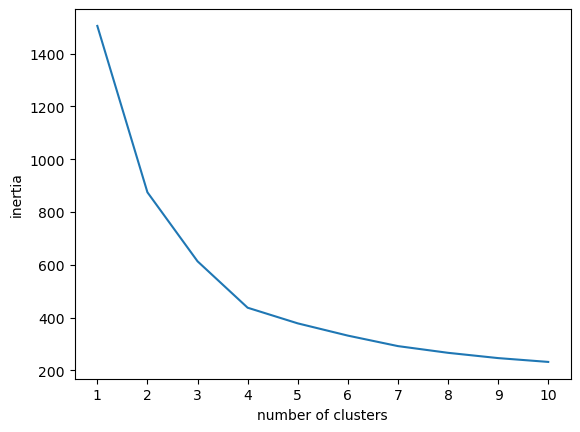

In [46]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot(). 
plt.plot(ks, inertias)

# define the label for the x axis as 'number of clusters' using matplotlib.pyplot.xlabel
plt.xlabel('number of clusters')
# define the label for the y axis as 'inertia' using matplotlib.pyplot.ylabel
plt.ylabel('inertia')
# define the ticks on the x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jp/opt/anacon

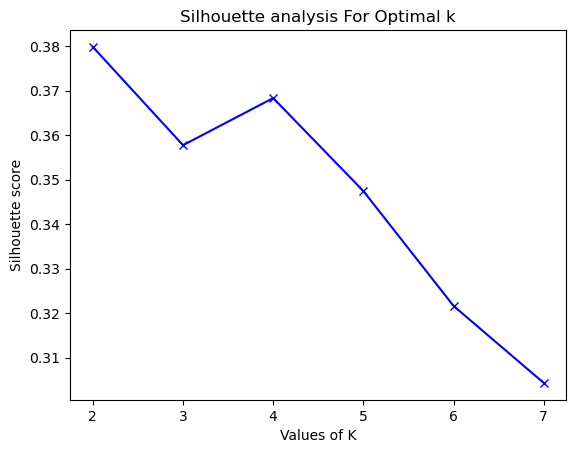

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

range_n_clusters = [2, 3, 4, 5, 6, 7]
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(cstm_v_std)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(cstm_v_std, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

- We can see an elbow in the number of 4 clusters
- We are going to do clustering for K = 3,4,5

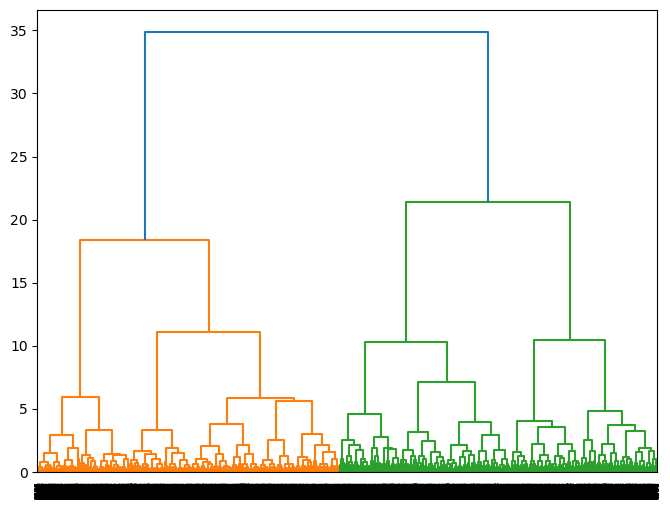

In [48]:
  from scipy.cluster import hierarchy
#from sklearn.cluster import AgglomerativeClustering - The option available in sklearn

# Get a random sample, as hierarchical clustering can take a lot of time to run.
sales_vc_sample = cstm_v_std.sample(n = 1000, random_state = 100)

# create clusters using the "ward method"
clusters = hierarchy.linkage(cstm_v_std , method="ward")

# create the dendrogram using the hierarchy.dendrogram() method.
plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)

### 4 Clusters (K=4)

In [49]:
cstm_v_k4 = cstm_v_std.copy()
model_k4 = KMeans(n_clusters=4, random_state = 100).fit(cstm_v_k4)

/Users/jp/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
cstm_v_k4['k_label'] = model_k4.labels_

## 5.3. Cluster analysis & caracterization

In [51]:
cstm_v_k4.groupby(['k_label']).mean().transpose()

k_label         0         1         2         3
Recency  0.254448  0.245853  0.754008  0.754815
Income   0.329357  0.662639  0.672616  0.338301
t_Mnt    0.048416  0.411439  0.440522  0.053540
t_Num    0.275463  0.613120  0.626066  0.284362

- Cluster 0 and 2 for recency, are the consumers who consumed the least time
- Income: cluster 1 and 2 are the ones that have a salary much higher than the average, almost twice as much as the other clusters
- t_Mnt: cluster 1 and 2 spend more 
- t_Num: cluster 1 and 2 buy more in number  
- Cluster 1 represents the most regular and the most valauble costumers, since it has a lower recency and these clients consume more than the cluster 0 and 3.
- Cluster 2 has a higher recency but is the one with higher consumption considering the other clusters (very close to cluster 1)


In [52]:
cstm_v_k4.groupby(['k_label']).describe().transpose()

k_label                  0            1            2            3
Recency count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.254448     0.245853     0.754008     0.754815
        std       0.149435     0.145890     0.147579     0.144159
        min       0.000000     0.000000     0.474747     0.505051
        25%       0.121212     0.121212     0.626263     0.636364
        50%       0.252525     0.247475     0.747475     0.757576
        75%       0.383838     0.373737     0.878788     0.878788
        max       0.505051     0.515152     1.000000     1.000000
Income  count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.329357     0.662639     0.672616     0.338301
        std       0.126281     0.111550     0.110840     0.129817
        min       0.000000     0.323805     0.315291     0.003136
        25%       0.238035     0.581145     0.589987     0.243452
        50%       0.330142     0.658475     0.674182     0.344648
        75%       0.424347     0.743748     0.754628     0.436720
        max       0.652954     0.982541     1.000000     0.693406
t_Mnt   count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.048416     0.411439     0.440522     0.053540
        std       0.049499     0.175024     0.180164     0.053929
        min       0.000000     0.103558     0.125099     0.000202
        25%       0.013507     0.272117     0.288942     0.014266
        50%       0.025819     0.386853     0.420774     0.029008
        75%       0.073541     0.528381     0.566777     0.080844
        max       0.294658     0.981979     1.000000     0.357084
t_Num   count  1944.000000  1576.000000  1577.000000  1793.000000
        mean      0.275463     0.613120     0.626066     0.284362
        std       0.099808     0.113268     0.110311     0.107327
        min       0.000000     0.333333     0.333333     0.000000
        25%       0.194444     0.527778     0.555556     0.194444
        50%       0.250000     0.611111     0.611111     0.250000
        75%       0.333333     0.694444     0.694444     0.361111
        max       0.583333     1.000000     1.000000     0.611111

#### Visualitation 

histgram

In [53]:
cluster0 = cstm_v_k4[cstm_v_k4.k_label==0]
cluster1 = cstm_v_k4[cstm_v_k4.k_label==1]
cluster2 = cstm_v_k4[cstm_v_k4.k_label==2]
cluster3 = cstm_v_k4[cstm_v_k4.k_label==3]

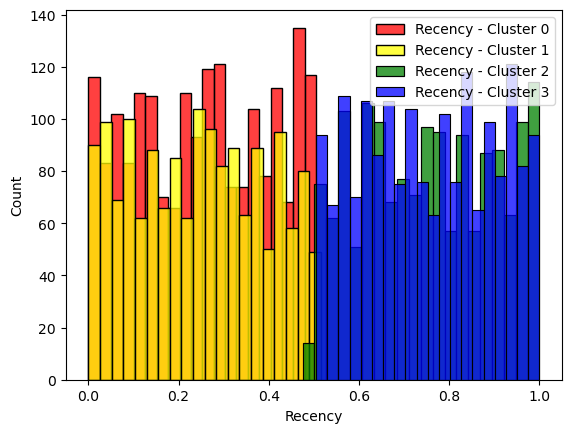

In [54]:
sns.histplot(cluster0['Recency'],color='red',label='Recency - Cluster 0', bins = 20)
sns.histplot(cluster1['Recency'],color='yellow',label='Recency - Cluster 1', bins = 20)
sns.histplot(cluster2['Recency'],color='green',label='Recency - Cluster 2', bins = 20)
sns.histplot(cluster3['Recency'],color='blue',label='Recency - Cluster 3', bins = 20)
plt.legend()

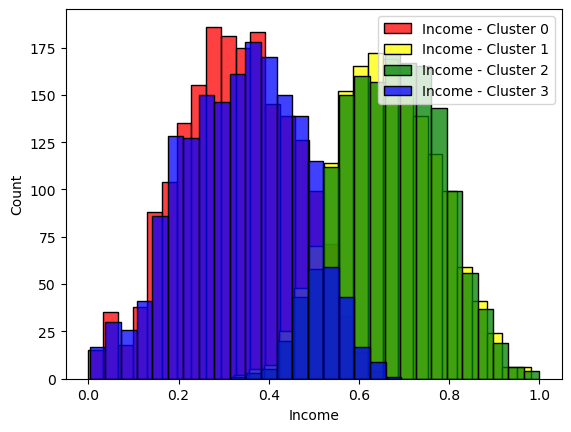

In [55]:
sns.histplot(cluster0['Income'],color='red',label='Income - Cluster 0', bins = 20)
sns.histplot(cluster1['Income'],color='yellow',label='Income - Cluster 1', bins = 20)
sns.histplot(cluster2['Income'],color='green',label='Income - Cluster 2', bins = 20)
sns.histplot(cluster3['Income'],color='blue',label='Income - Cluster 3', bins = 20)
plt.legend()

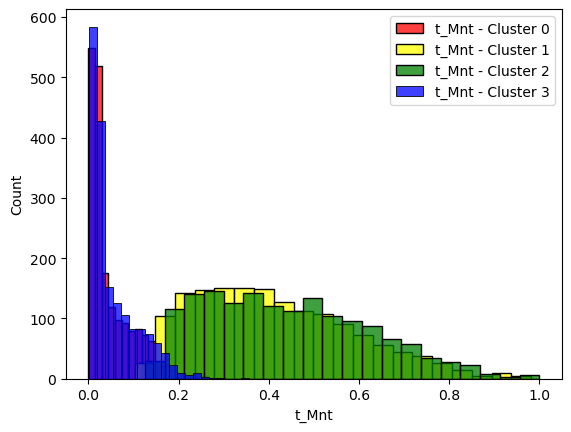

In [56]:
sns.histplot(cluster0['t_Mnt'],color='red',label='t_Mnt - Cluster 0', bins = 20)
sns.histplot(cluster1['t_Mnt'],color='yellow',label='t_Mnt - Cluster 1', bins = 20)
sns.histplot(cluster2['t_Mnt'],color='green',label='t_Mnt - Cluster 2', bins = 20)
sns.histplot(cluster3['t_Mnt'],color='blue',label='t_Mnt - Cluster 3', bins = 20)
plt.legend()

Scatterplot 

In [57]:
centroids = model_k4.cluster_centers_
centroids

array([[0.25457661, 0.32941287, 0.04839683, 0.27542131],
       [0.24569505, 0.66263129, 0.41142545, 0.61301587],
       [0.75367251, 0.67278052, 0.4408517 , 0.62632191],
       [0.75510399, 0.33847403, 0.05370173, 0.28465255]])

In [58]:
centroid_0_Rnc = centroids[0,0]
centroid_1_Rnc = centroids[1,0]
centroid_2_Rnc = centroids[2,0]
centroid_3_Rnc = centroids[3,0]
centroid_0_Inc = centroids[0,1]
centroid_1_Inc = centroids[1,1]
centroid_2_Inc = centroids[2,1]
centroid_3_Inc = centroids[3,1]
centroid_0_Mnt = centroids[0,2]
centroid_1_Mnt = centroids[1,2]
centroid_2_Mnt = centroids[2,2]
centroid_3_Mnt = centroids[3,2]
centroid_0_Num = centroids[0,3]
centroid_1_Num = centroids[1,3]
centroid_2_Num = centroids[2,3]
centroid_3_Num = centroids[3,3]

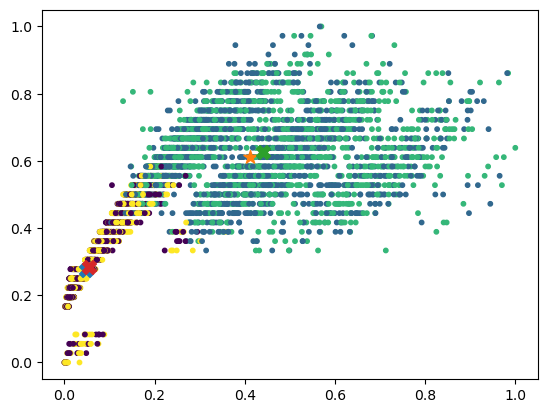

In [59]:
plt.scatter(cstm_v_k4.t_Mnt, cstm_v_k4.t_Num,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Mnt, centroid_0_Num, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Mnt, centroid_1_Num, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Mnt, centroid_2_Num, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Mnt, centroid_3_Num, marker='X', s=100)#VERMELHO ->

plt.show()

- roxo e amarelo são os cluster 0 e 3 pois são so que gastam menos e consomem menos vezes  -> são os que são menos valiosos e os que apresentam um padrão de consumo mais parecido entre eles (obs menos dispersão)
- azul e verde são os cluster 1 e 2 são os que gastam e consomem mais
- 

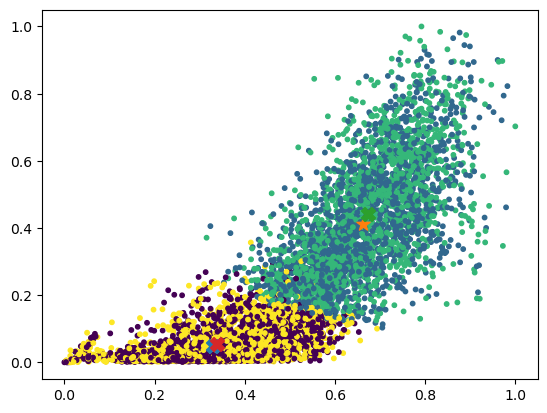

In [60]:
plt.scatter(cstm_v_k4.Income, cstm_v_k4.t_Mnt,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Inc, centroid_0_Mnt, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Inc, centroid_1_Mnt, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Inc, centroid_2_Mnt, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Inc, centroid_3_Mnt, marker='X', s=100)#VERMELHO ->

plt.show()

- roxo e amarelo representa o cluster 0 e 3, são os que gastam menos e rebem menos 
- azul e verde é o cluster 1 e 2, que tem um income superior e gastam mais 
- os centroids parecem todos centrados 

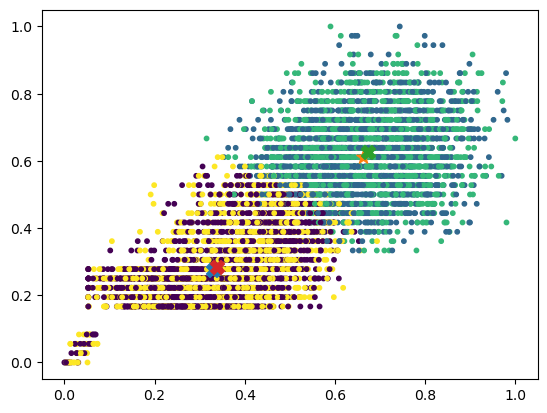

In [61]:
plt.scatter(cstm_v_k4.Income, cstm_v_k4.t_Num,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Inc, centroid_0_Num, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Inc, centroid_1_Num, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Inc, centroid_2_Num, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Inc, centroid_3_Num, marker='X', s=100)#VERMELHO ->

plt.show()

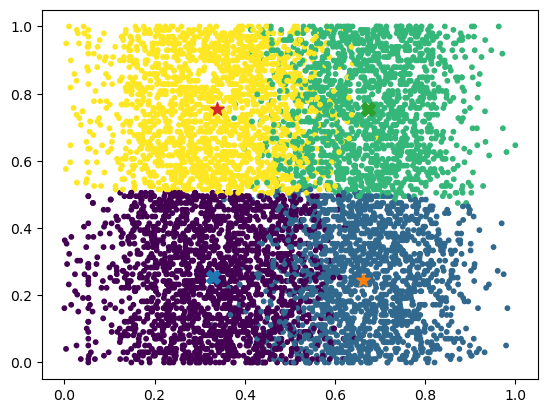

In [62]:
plt.scatter(cstm_v_k4.Income, cstm_v_k4.Recency,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Inc, centroid_0_Rnc, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Inc, centroid_1_Rnc, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Inc, centroid_2_Rnc, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Inc, centroid_3_Rnc, marker='*', s=100)#VERMELHO ->

plt.show()

- azul cluster 1
- verde cluster 2 
- amarelo cluster 3 
- roxo culter 0 

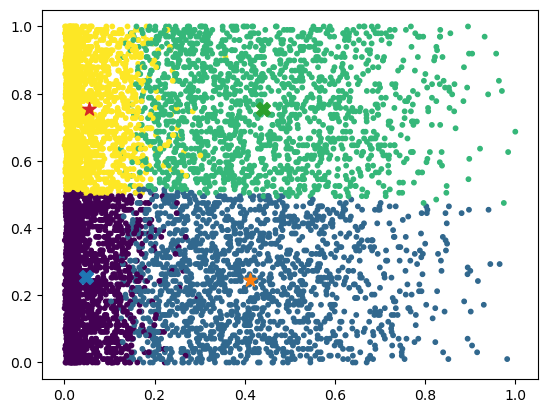

In [63]:
plt.scatter(cstm_v_k4.t_Mnt, cstm_v_k4.Recency,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Mnt, centroid_0_Rnc, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Mnt, centroid_1_Rnc, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Mnt, centroid_2_Rnc, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Mnt, centroid_3_Rnc, marker='*', s=100)#VERMELHO ->

plt.show()

- amarelo gasta menos mas tem um recency menor 
- azul tem um income maior e um recency menor, vai la mais vezes 

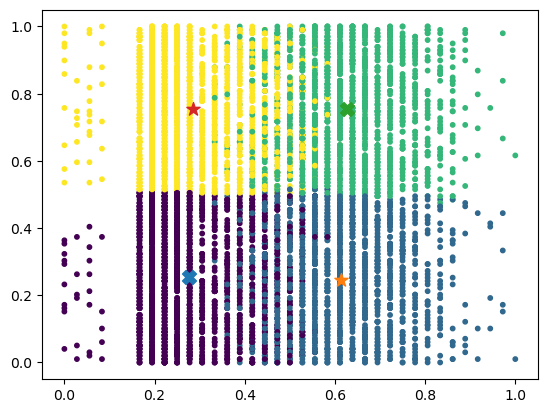

In [64]:
plt.scatter(cstm_v_k4.t_Num, cstm_v_k4.Recency,
            c=cstm_v_k4.k_label, s=10)

plt.scatter(centroid_0_Num, centroid_0_Rnc, marker='X', s=100)#AZUL -> 
plt.scatter(centroid_1_Num, centroid_1_Rnc, marker='*', s=100)#LARANJA -> 
plt.scatter(centroid_2_Num, centroid_2_Rnc, marker='X', s=100)#VERDE ->
plt.scatter(centroid_3_Num, centroid_3_Rnc, marker='*', s=100)#VERMELHO ->

plt.show()

In [65]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)
        
    sns.set()
    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)
        
        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        
        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=sns.color_palette(), ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1])

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(s=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=13, fontweight='heavy') 
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=13)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=13)
        

    plt.subplots_adjust(hspace=0.4, top=0.90)
    plt.suptitle("Cluster Simple Profilling", fontsize=23)
    plt.show()
    
    cluster_profiles(cstm_v_k4,["k_label"], figsize=(23, 7))

- Cluster 0 are the individuals that haven't bought anything in a while and they have a lower income, that could a reason why they dont't spent that much. We can see them as the less valuable costumers. 
- Cluster 1 are the costumers that have bought in less days and have a higher income, that is why they spent more and consume more in terms of number. We say they are the more valuables costumers.
----------------------------------------------------------------------------------------------------------------------
- We should focus on keeping the clients from cluster 1 and 2. 
- Cluster 0 and 3 are the ones with more individuals, so we should find ways to attract this consumers.

## 5.4. Business & Marketing insights

### 5.4.1 Creating the dataframe

In [66]:
df_copy = df.copy()
cols_to_drop = ['Recency','Income', 'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts', 'MntAdditionalRequests', 'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases', 'Name']
df_copy = df.drop(columns=cols_to_drop).copy()

In [67]:
bus_mkt = pd.merge(cstm_v_k4, df_copy, on='CustomerID')

In [68]:
bus_mkt ['total_adhered'] = bus_mkt['Response_Cmp1'] + bus_mkt['Response_Cmp2'] + bus_mkt['Response_Cmp3'] + bus_mkt['Response_Cmp4']+ bus_mkt['Response_Cmp5']

In [69]:
mkt_greater_than_1 = bus_mkt.loc[bus_mkt['total_adhered']>1]
mkt_greater_than_1

Recency    Income     t_Mnt     t_Num  k_label  \
CustomerID                                                    
31751       0.070707  0.543012  0.299381  0.472222        1   
20714       0.777778  0.436540  0.199740  0.611111        2   
22814       0.393939  0.774986  0.650413  0.527778        1   
22559       0.141414  0.856348  0.738953  0.583333        1   
23627       0.616162  0.941910  0.466052  0.694444        2   
...              ...       ...       ...       ...      ...   
25142       0.282828  0.908492  0.699602  0.666667        1   
31928       0.434343  0.635960  0.617199  0.722222        1   
6827        1.000000  0.963204  0.895094  0.555556        2   
30707       0.313131  0.696704  0.481125  0.611111        1   
12011       0.707071  0.036485  0.032299  0.027778        3   

                 Date_Adherence  NumOfferPurchases  NumAppVisitsMonth  \
CustomerID                                                              
31751       2021-11-01 00:00:00                  3                  9   
20714       2021-09-07 00:00:00                  6                  8   
22814       2021-07-01 00:00:00                  0                  2   
22559       2022-05-20 00:00:00                  1                  1   
23627       2020-12-12 00:00:00                  1                  3   
...                         ...                ...                ...   
25142       2022-02-12 00:00:00                  1                  2   
31928       2021-04-29 00:00:00                  1                  2   
6827        2021-09-21 00:00:00                  1                  1   
30707       2021-09-30 00:00:00                  1                  2   
12011       2022-03-04 00:00:00                 15                 20   

            Complain   Education  ... Children_6to18  Gender  Age  age_group  \
CustomerID                        ...                                          
31751              0  GRADUATION  ...              1       0   61      45-65   
20714              0         PHD  ...              1       0   53      45-65   
22814              0  GRADUATION  ...              0       0   64      45-65   
22559              0  GRADUATION  ...              0       0   41      35-45   
23627              0  GRADUATION  ...              0       1   59      45-65   
...              ...         ...  ...            ...     ...  ...        ...   
25142              0  GRADUATION  ...              0       0   50      45-65   
31928              0  GRADUATION  ...              0       0   46      45-65   
6827               0      MASTER  ...              0       0   30      25-35   
30707              0  GRADUATION  ...              0       1   51      45-65   
12011              0  GRADUATION  ...              0       0   56      45-65   

            Response_Cmp1 Response_Cmp2  Response_Cmp3  Response_Cmp4  \
CustomerID                                                              
31751                   1             0              1              0   
20714                   0             1              0              1   
22814                   0             0              1              1   
22559                   0             1              1              1   
23627                   1             0              1              1   
...                   ...           ...            ...            ...   
25142                   0             1              1              1   
31928                   0             1              0              1   
6827                    0             0              1              1   
30707                   1             0              0              1   
12011                   0             1              1              0   

            Response_Cmp5  total_adhered  
CustomerID                                
31751                   0              2  
20714                   1              3  
22814                   0              2  
22559                   0            

In [70]:
#total number of adherences to the campains 
bus_mkt['total_adhered'].sum()

2176

In [71]:
bus_mkt['sucess'] = (bus_mkt['total_adhered'])/2220

In [80]:
bus_mkt=bus_mkt.drop(columns ={"Response_Cmp1", "Response_Cmp2", 
                     "Response_Cmp3", "Response_Cmp4", 
                    "Response_Cmp5"})

### 5.4.2 Clustering analysis - camapin sucess 

In [82]:
bus_mkt_0 = bus_mkt[bus_mkt['k_label'] == 0]
bus_mkt_0.describe()


Recency       Income        t_Mnt        t_Num  k_label  \
count  1944.000000  1944.000000  1944.000000  1944.000000   1944.0   
mean      0.254448     0.329357     0.048416     0.275463      0.0   
std       0.149435     0.126281     0.049499     0.099808      0.0   
min       0.000000     0.000000     0.000000     0.000000      0.0   
25%       0.121212     0.238035     0.013507     0.194444      0.0   
50%       0.252525     0.330142     0.025819     0.250000      0.0   
75%       0.383838     0.424347     0.073541     0.333333      0.0   
max       0.505051     0.652954     0.294658     0.583333      0.0   

       NumOfferPurchases  NumAppVisitsMonth     Complain  Kid_Younger6  \
count        1944.000000        1944.000000  1944.000000   1944.000000   
mean            2.416667           6.577160     0.010288      0.720165   
std             1.856191           2.346516     0.100933      0.535786   
min             0.000000           0.000000     0.000000      0.000000   
25%             1.000000           5.000000     0.000000      0.000000   
50%             2.000000           7.000000     0.000000      1.000000   
75%             3.000000           8.000000     0.000000      1.000000   
max            16.000000          20.000000     1.000000      2.000000   

       Children_6to18       Gender          Age  total_adhered       sucess  
count     1944.000000  1944.000000  1944.000000    1944.000000  1944.000000  
mean         0.507202     0.270062    44.669753       0.109053     0.000049  
std          0.542529     0.444106    11.084803       0.326305     0.000147  
min          0.000000     0.000000    18.000000       0.000000     0.000000  
25%          0.000000     0.000000    36.000000       0.000000     0.000000  
50%          0.000000     0.000000    43.500000       0.000000     0.000000  
75%          1.000000     1.000000    53.000000       0.000000     0.000000  
max          2.000000     1.000000    73.000000       3.000000     0.001351

In [84]:
bus_mkt_1 = bus_mkt[bus_mkt['k_label'] == 1]
bus_mkt_1.describe()

Recency       Income        t_Mnt        t_Num  k_label  \
count  1576.000000  1576.000000  1576.000000  1576.000000   1576.0   
mean      0.245853     0.662639     0.411439     0.613120      1.0   
std       0.145890     0.111550     0.175024     0.113268      0.0   
min       0.000000     0.323805     0.103558     0.333333      1.0   
25%       0.121212     0.581145     0.272117     0.527778      1.0   
50%       0.247475     0.658475     0.386853     0.611111      1.0   
75%       0.373737     0.743748     0.528381     0.694444      1.0   
max       0.515152     0.982541     0.981979     1.000000      1.0   

       NumOfferPurchases  NumAppVisitsMonth     Complain  Kid_Younger6  \
count        1576.000000        1576.000000  1576.000000   1576.000000   
mean            2.263959           3.939721     0.007614      0.122462   
std             2.043370           2.266565     0.086954      0.350387   
min             0.000000           0.000000     0.000000      0.000000   
25%             1.000000           2.000000     0.000000      0.000000   
50%             1.000000           4.000000     0.000000      0.000000   
75%             3.000000           6.000000     0.000000      0.000000   
max            13.000000           9.000000     1.000000      2.000000   

       Children_6to18       Gender          Age  total_adhered       sucess  
count     1576.000000  1576.000000  1576.000000    1576.000000  1576.000000  
mean         0.477792     0.258249    48.651015       0.531726     0.000240  
std          0.550453     0.437810    12.540020       0.860570     0.000388  
min          0.000000     0.000000    20.000000       0.000000     0.000000  
25%          0.000000     0.000000    39.000000       0.000000     0.000000  
50%          0.000000     0.000000    49.000000       0.000000     0.000000  
75%          1.000000     1.000000    59.000000       1.000000     0.000450  
max          2.000000     1.000000    75.000000       4.000000     0.001802

In [85]:
bus_mkt_2 = bus_mkt[bus_mkt['k_label'] == 2]
bus_mkt_2.describe()

Recency       Income        t_Mnt        t_Num  k_label  \
count  1577.000000  1577.000000  1577.000000  1577.000000   1577.0   
mean      0.754008     0.672616     0.440522     0.626066      2.0   
std       0.147579     0.110840     0.180164     0.110311      0.0   
min       0.474747     0.315291     0.125099     0.333333      2.0   
25%       0.626263     0.589987     0.288942     0.555556      2.0   
50%       0.747475     0.674182     0.420774     0.611111      2.0   
75%       0.878788     0.754628     0.566777     0.694444      2.0   
max       1.000000     1.000000     1.000000     1.000000      2.0   

       NumOfferPurchases  NumAppVisitsMonth     Complain  Kid_Younger6  \
count        1577.000000        1577.000000  1577.000000   1577.000000   
mean            2.139505           3.860495     0.012682      0.110970   
std             1.997986           2.211717     0.111935      0.335675   
min             0.000000           0.000000     0.000000      0.000000   
25%             1.000000           2.000000     0.000000      0.000000   
50%             1.000000           4.000000     0.000000      0.000000   
75%             3.000000           6.000000     0.000000      0.000000   
max            14.000000           9.000000     1.000000      2.000000   

       Children_6to18       Gender          Age  total_adhered       sucess  
count     1577.000000  1577.000000  1577.000000    1577.000000  1577.000000  
mean         0.422955     0.273304    48.437540       0.571338     0.000257  
std          0.519230     0.445797    12.701525       0.896349     0.000404  
min          0.000000     0.000000    20.000000       0.000000     0.000000  
25%          0.000000     0.000000    39.000000       0.000000     0.000000  
50%          0.000000     0.000000    48.000000       0.000000     0.000000  
75%          1.000000     1.000000    59.000000       1.000000     0.000450  
max          2.000000     1.000000    74.000000       4.000000     0.001802

In [86]:
bus_mkt_3 = bus_mkt[bus_mkt['k_label'] == 3]
bus_mkt_3.describe()

Recency       Income        t_Mnt        t_Num  k_label  \
count  1793.000000  1793.000000  1793.000000  1793.000000   1793.0   
mean      0.754815     0.338301     0.053540     0.284362      3.0   
std       0.144159     0.129817     0.053929     0.107327      0.0   
min       0.505051     0.003136     0.000202     0.000000      3.0   
25%       0.636364     0.243452     0.014266     0.194444      3.0   
50%       0.757576     0.344648     0.029008     0.250000      3.0   
75%       0.878788     0.436720     0.080844     0.361111      3.0   
max       1.000000     0.693406     0.357084     0.611111      3.0   

       NumOfferPurchases  NumAppVisitsMonth     Complain  Kid_Younger6  \
count        1793.000000        1793.000000  1793.000000   1793.000000   
mean            2.603458           6.586168     0.009481      0.706079   
std             2.158230           2.534025     0.096936      0.525098   
min             0.000000           1.000000     0.000000      0.000000   
25%             1.000000           5.000000     0.000000      0.000000   
50%             2.000000           7.000000     0.000000      1.000000   
75%             3.000000           8.000000     0.000000      1.000000   
max            15.000000          20.000000     1.000000      2.000000   

       Children_6to18       Gender          Age  total_adhered       sucess  
count     1793.000000  1793.000000  1793.000000    1793.000000  1793.000000  
mean         0.540993     0.264919    44.980480       0.125488     0.000057  
std          0.548556     0.441413    11.238146       0.361949     0.000163  
min          0.000000     0.000000    18.000000       0.000000     0.000000  
25%          0.000000     0.000000    37.000000       0.000000     0.000000  
50%          1.000000     0.000000    43.000000       0.000000     0.000000  
75%          1.000000     1.000000    54.000000       0.000000     0.000000  
max          2.000000     1.000000    75.000000       3.000000     0.001351